# 💳 Análise de Risco de Crédito - Projeto de Portfólio

**👨‍💻 Autor:** Carlos Vinícius Nascimento de Jesus
**🔗 Contato:** <a href="https://br.linkedin.com/in/carlos-vinicius-nascimento-de-jesus?trk=people-guest_people_search-card">[LinkedIn]</a>  
**📂 Repositório GitHub:** <a href="https://github.com/Carllux/analise-risco-credito-python/tree/main">[Link para o repositório GitHub com o código estruturado]</a>

---

## 🎯 1. Objetivo de Negócio

Este projeto tem como objetivo o desenvolvimento de um modelo de Machine Learning para previsão de inadimplência de clientes, utilizando o dataset da competição **Home Credit Default Risk**. A proposta é fornecer **scores de risco confiáveis** para apoiar decisões de crédito, **reduzindo perdas financeiras** para a instituição.

---

## 🧰 2. Stack de Tecnologias

- **Linguagem:** Python  
- **Ambiente:** Kaggle Notebooks  
- **Principais Bibliotecas:**
  - `Pandas` — Manipulação e análise de dados
  - `Scikit-learn` — Pré-processamento, modelos base e avaliação
  - `LightGBM` — Modelo final de Gradient Boosting
  - `SHAP` — Explicabilidade do modelo (XAI)
  - `Matplotlib` & `Seaborn` — Visualizações e gráficos

---

## ⚙️ 3. Metodologia

O pipeline adotado inclui as seguintes etapas:

1. **Análise Exploratória de Dados (EDA):**  
   Exploração profunda da variável alvo e de padrões de inadimplência, destacando o desbalanceamento de classes (~3% de inadimplentes).

2. **Engenharia de Features:**  
   Criação de variáveis estratégicas como `relação crédito/renda`, `percentual de entrada` e codificação de variáveis categóricas com *target encoding*.

3. **Treinamento de Modelos:**  
   Comparação entre um modelo **baseline (Regressão Logística)** e um modelo **avançado (LightGBM)** com ajuste de desbalanceamento via `scale_pos_weight`.

4. **Avaliação de Performance:**  
   O modelo LightGBM alcançou um **AUC Score de 0.7240** e **recall de 64% para inadimplentes**, superando significativamente o baseline.

5. **Interpretabilidade (XAI com SHAP):**  
   Geração de gráficos de explicabilidade que revelam os principais fatores de risco no modelo final — com destaque para histórico de atraso e valor do crédito.

---


# Dependências
## ⚙️ Setup do Projeto: Importação de Bibliotecas e Configurações Iniciais

### 🎯 Objetivo

Centralizar a importação de todas as bibliotecas e ferramentas necessárias para a execução do projeto de **risco de crédito**, garantindo um código limpo, organizado e de fácil manutenção.

---

### ⚠️ Requisitos de Ambiente

> **Observação Importante:**  
> Devido ao alto volume de dados processados, este notebook é **computacionalmente intensivo**.

- **Pico estimado de uso de RAM:** ~26 GB  
- **Ambiente recomendado:** Plataformas com alta disponibilidade de memória, como **Kaggle Notebooks**
- **Risco:** Ambientes locais com menos de **32 GB de RAM** podem enfrentar falhas de alocação de memória

---

### 🏗️ Arquitetura da Célula de Setup

| Seção                     | Propósito                                                                 | Principais Ferramentas                      |
|---------------------------|---------------------------------------------------------------------------|---------------------------------------------|
| **1. Manipulação de Dados**      | Carregamento, limpeza e agregação de dados                                  | `pandas`, `numpy`                           |
| **2. Sistema de Arquivos**       | Acesso ao sistema, busca e filtragem de arquivos                            | `os`, `glob`, `gc`, `re`, `pyarrow.parquet` |
| **3. Visualização de Dados**     | Construção de gráficos e visualizações analíticas                           | `matplotlib`, `seaborn`                     |
| **4. Machine Learning**          | Treinamento, validação e avaliação de modelos                               | `scikit-learn`, `lightgbm`                  |
| **5. Otimização de Hiperparâmetros** | Ajuste fino de modelos com otimização bayesiana                         | `optuna`                                     |
| **6. Interpretabilidade (XAI)**  | Análise interpretável dos modelos preditivos                                | `shap`                                       |
| **7. Utilitários**               | Facilitar o desenvolvimento e análise de performance                        | `tqdm`                                       |

---

### 🐍 Código de Importação

```python
# ================================================================
# 1. MANIPULAÇÃO DE DADOS E OPERAÇÕES NUMÉRICAS
# ================================================================
import pandas as pd   # Manipulação de DataFrames
import numpy as np    # Cálculos numéricos e arrays

# ================================================================
# 2. SISTEMA DE ARQUIVOS E UTILITÁRIOS
# ================================================================
import os             # Acesso ao sistema de arquivos
import glob           # Busca por arquivos com padrões
import gc             # Coletor de lixo (gerenciamento de memória)
import warnings       # Supressão de avisos
import re             # Expressões regulares
import pyarrow.parquet as pq  # Leitura de arquivos Parquet

# Ocultar warnings para facilitar leitura dos outputs
warnings.filterwarnings('ignore')

# ================================================================
# 3. VISUALIZAÇÃO DE DADOS
# ================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch

# ================================================================
# 4. PRÉ-PROCESSAMENTO E MODELAGEM
# ================================================================
from sklearn.model_selection import (
    StratifiedKFold, TimeSeriesSplit, train_test_split
)
from sklearn.metrics import (
    roc_auc_score, classification_report, ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
import lightgbm as lgb  # Gradient Boosting

# ================================================================
# 5. OTIMIZAÇÃO DE HIPERPARÂMETROS
# ================================================================
import optuna  # Otimização Bayesiana

# ================================================================
# 6. INTERPRETABILIDADE (XAI)
# ================================================================
import shap  # SHAP values

# ================================================================
# 7. UTILITÁRIOS
# ================================================================
from tqdm.notebook import tqdm  # Barra de progresso

# ================================================================
# CONFIGURAÇÕES INICIAIS GLOBAIS
# ================================================================
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas

# Mensagem de sucesso
print("✅ Todas as bibliotecas foram importadas com sucesso.")
print("🚀 Ambiente pronto para iniciar a modelagem preditiva.")
```

---

### ✅ Boas Práticas

- Mantenha a célula de setup **no topo do notebook**
- Comente cada grupo de importações para melhor clareza
- Utilize `warnings.filterwarnings('ignore')` com moderação, apenas em ambiente de produção ou notebook de apresentação
- Monitore o uso de memória com `gc.collect()` ao longo da execução, se necessário

---

In [2]:
# ===================================================================
# 1. MANIPULAÇÃO DE DADOS E OPERAÇÕES NUMÉRICAS
# ===================================================================
import pandas as pd  # Para manipulação de dataframes
import numpy as np   # Para operações numéricas e arrays

# ===================================================================
# 2. SISTEMA DE ARQUIVOS E UTILITÁRIOS
# ===================================================================
import os          # Para interagir com o sistema operacional
import glob        # Para encontrar caminhos de arquivo que correspondem a um padrão
import gc          # Para gerenciamento de memória (coletor de lixo)
import warnings    # Para controlar mensagens de aviso
import re          # Para operações com expressões regulares
import pyarrow.parquet as pq  # Para trabalhar com arquivos parquet

# Configuração de warnings
warnings.filterwarnings('ignore') # Oculta avisos para um output mais limpo

# ===================================================================
# 3. VISUALIZAÇÃO DE DADOS
# ===================================================================
import matplotlib.pyplot as plt # Biblioteca base para visualizações
import seaborn as sns           # Biblioteca de alto nível para gráficos estatísticos
from matplotlib.ticker import FuncFormatter  # Para formatação de eixos
from matplotlib.patches import Patch  # Para personalização de legendas

# ===================================================================
# 4. PRÉ-PROCESSAMENTO E MODELAGEM DE MACHINE LEARNING
# ===================================================================
from sklearn.model_selection import (StratifiedKFold, TimeSeriesSplit, 
                                    train_test_split) # Para validação cruzada e divisão de dados
from sklearn.metrics import (roc_auc_score, classification_report, 
                            ConfusionMatrixDisplay, confusion_matrix)  # Métricas de avaliação
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Para codificação de variáveis categóricas
from sklearn.linear_model import (LinearRegression, 
                                 LogisticRegression) # Modelos lineares

# LightGBM para Gradient Boosting
import lightgbm as lgb 

# ===================================================================
# 5. OTIMIZAÇÃO DE HIPERPARÂMETROS
# ===================================================================
# Optuna para otimização Bayesiana 
import optuna

# ===================================================================
# 6. INTERPRETABILIDADE DO MODELO (XAI - IA Explicável)
# ===================================================================
# SHAP para explicar as previsões do modelo 
import shap

# ===================================================================
# 7. BARRA DE PROGRESSO (Opcional, mas útil)
# ===================================================================
from tqdm.notebook import tqdm # Para visualizar o progresso de loops longos

# --- Configurações Iniciais ---
# Configuração para exibir todas as colunas do pandas
pd.set_option('display.max_columns', None)

print("Todas as bibliotecas foram importadas com sucesso.")
print("Estamos prontos para iniciar a modelagem preditiva, incluindo o modelo Baseline.")

Todas as bibliotecas foram importadas com sucesso.
Estamos prontos para iniciar a modelagem preditiva, incluindo o modelo Baseline.


# Preparação e Carregamento de Dados

## 🔍 Inspeção inteligente dos arquivos

### 🎯 Objetivo

Realizar uma varredura automatizada nos arquivos `.csv` do diretório de treino, identificando a presença de termos críticos relacionados à modelagem de risco de crédito, como `target`, `renda`, `valor do crédito`, entre outros.

Essa abordagem evita o carregamento completo de dados, economizando memória e tempo de processamento.

---

### ⚙️ Definição do Caminho e Termos de Busca

```python
# 1. Definir o caminho para o diretório com os arquivos CSV de treino
CSV_TRAIN_PATH = '/kaggle/input/home-credit-credit-risk-model-stability/csv_files/train'

# 2. Dicionário de termos de busca e suas descrições
search_terms = {
    # --- Identificadores e Alvo ---
    'id': 'identificador único do caso (case_id)',
    'target': 'variável alvo (target)',
    'week': 'semana da aplicação (WEEK_NUM)',

    # --- Dados da Aplicação e Cliente ---
    'inc': 'renda principal (mainoccupationinc)',
    'amount': 'valor do crédito (credamount)',
    'pmt': 'valor da entrada/pagamento inicial (downpmt)',
    'type': 'tipo de moradia (housetype)',

    # --- Histórico de Crédito ---
    'dpd': 'dias em atraso (days past due)',
    'overdue': 'valor em atraso (overdue amount)'
}
```

---

### 📂 Varredura dos Arquivos

```python
import os
import glob
import pandas as pd

print("="*80)
print(f"Iniciando varredura individual dos cabeçalhos em: {CSV_TRAIN_PATH}")
print("="*80)

# 3. Obter a lista de todos os arquivos .csv no diretório
try:
    csv_files = glob.glob(os.path.join(CSV_TRAIN_PATH, "*.csv"))
    if not csv_files:
        print("AVISO: Nenhum arquivo .csv foi encontrado no diretório especificado.")
except Exception as e:
    print(f"Erro ao acessar o diretório: {e}")
    csv_files = []
```

---

### 🔁 Processamento Individual dos Arquivos

```python
# 4. Loop principal para iterar sobre cada arquivo encontrado
for file_path in sorted(csv_files):
    file_name = os.path.basename(file_path)
    print(f"\n--- Verificando o arquivo: [{file_name}] ---")

    try:
        # Leitura eficiente: apenas os cabeçalhos (sem dados)
        df_header = pd.read_csv(file_path, nrows=0)
        columns = df_header.columns.tolist()

        found_something_in_file = False

        # Busca por termos definidos
        for term, description in search_terms.items():
            found_columns = [col for col in columns if term.lower() in col.lower()]
            if found_columns:
                print(f"  > Termo '{term}' ({description}) encontrado nas colunas: {found_columns}")
                found_something_in_file = True

        if not found_something_in_file:
            print("  > Nenhum dos termos de busca foi encontrado neste arquivo.")

    except Exception as e:
        print(f"  > Ocorreu um erro ao processar o arquivo {file_name}: {e}")
```

---

### ✅ Finalização

```python
print("\n" + "="*80)
print("Varredura de arquivos concluída.")
print("="*80)
```

---

### 💡 Observação

Este processo é especialmente útil em projetos com muitos arquivos brutos, permitindo **decidir de forma estratégica** quais tabelas devem ser carregadas e integradas ao pipeline de modelagem.


In [3]:
# 1. Definir o caminho para o diretório com os arquivos CSV de treino
CSV_TRAIN_PATH = '/kaggle/input/home-credit-credit-risk-model-stability/csv_files/train'

# 2. Dicionário de termos de busca e suas descrições
search_terms = {
    # --- Identificadores e Alvo ---
    'id': 'identificador único do caso (case_id)',
    'target': 'variável alvo (target)',
    'week': 'semana da aplicação (WEEK_NUM)',
    
    # --- Dados da Aplicação e Cliente ---
    'inc': 'renda principal (mainoccupationinc)',
    'amount': 'valor do crédito (credamount)',
    'pmt': 'valor da entrada/pagamento inicial (downpmt)',
    'type': 'tipo de moradia (housetype)',
    
    # --- Histórico de Crédito ---
    'dpd': 'dias em atraso (days past due)',
    'overdue': 'valor em atraso (overdue amount)'
}

print("="*80)
print(f"Iniciando varredura individual dos cabeçalhos em: {CSV_TRAIN_PATH}")
print("="*80)

# 3. Obter a lista de todos os arquivos .csv no diretório
try:
    csv_files = glob.glob(os.path.join(CSV_TRAIN_PATH, "*.csv"))
    if not csv_files:
        print(f"AVISO: Nenhum arquivo .csv foi encontrado no diretório especificado.")
except Exception as e:
    print(f"Erro ao acessar o diretório: {e}")
    csv_files = []

# 4. Loop principal para iterar sobre cada arquivo encontrado
for file_path in sorted(csv_files):
    """
    Processa cada arquivo CSV encontrado no diretório especificado, buscando colunas
    que correspondam aos termos definidos no dicionário search_terms.
    
    Parâmetros implícitos:
    ---------------------
    file_path : str
        Caminho completo para o arquivo CSV sendo processado
        
    Comportamento:
    --------------
    - Extrai o nome base do arquivo para exibição amigável
    - Lê apenas o cabeçalho do CSV (sem carregar dados) para eficiência
    - Verifica cada termo de busca contra os nomes das colunas
    - Exibe resultados encontrados ou mensagem informativa
    - Captura e trata possíveis erros de leitura de arquivo
    """
    file_name = os.path.basename(file_path)
    print(f"\n--- Verificando o arquivo: [{file_name}] ---")

    try:
        # Leitura eficiente: apenas cabeçalhos (0 linhas de dados)
        df_header = pd.read_csv(file_path, nrows=0)
        columns = df_header.columns.tolist()

        found_something_in_file = False

        # Busca inteligente: verifica cada termo no dicionário
        for term, description in search_terms.items():
            # Busca case-insensitive por termos nas colunas
            found_columns = [col for col in columns if term.lower() in col.lower()]

            if found_columns:
                print(f"  > Termo '{term}' ({description}) encontrado nas colunas: {found_columns}")
                found_something_in_file = True

        if not found_something_in_file:
            print("  > Nenhum dos termos de busca foi encontrado neste arquivo.")

    except Exception as e:
        print(f"  > Ocorreu um erro ao processar o arquivo {file_name}: {e}")

print("\n" + "="*80)
print("Varredura de arquivos concluída.")
print("="*80)

# ==============================================================================
# 5. CLÁUSULA DE LIMPEZA DE DADOS (WORKSPACE CLEANUP)
# ==============================================================================
# Após a varredura, removemos as variáveis temporárias usadas no loop
# para garantir um ambiente de trabalho limpo e liberar memória.

try:
    # Deleta as variáveis que foram usadas dentro do loop
    del file_path, file_name, df_header, columns
    del found_something_in_file, term, description, found_columns
    
    # Força o "coletor de lixo" do Python a limpar a memória
    gc.collect()
    
    print("\nCláusula de limpeza executada: Variáveis temporárias removidas da memória.")

except NameError:
    # Este bloco é executado caso o loop não tenha sido iniciado (nenhum arquivo encontrado)
    print("\nNenhuma variável temporária para limpar.")


Iniciando varredura individual dos cabeçalhos em: /kaggle/input/home-credit-credit-risk-model-stability/csv_files/train

--- Verificando o arquivo: [train_applprev_1_0.csv] ---
  > Termo 'id' (identificador único do caso (case_id)) encontrado nas colunas: ['case_id', 'isbidproduct_390L']
  > Termo 'inc' (renda principal (mainoccupationinc)) encontrado nas colunas: ['byoccupationinc_3656910L', 'mainoccupationinc_437A']
  > Termo 'amount' (valor do crédito (credamount)) encontrado nas colunas: ['credamount_590A']
  > Termo 'pmt' (valor da entrada/pagamento inicial (downpmt)) encontrado nas colunas: ['downpmt_134A', 'dtlastpmt_581D', 'dtlastpmtallstes_3545839D', 'pmtnum_8L']
  > Termo 'type' (tipo de moradia (housetype)) encontrado nas colunas: ['credtype_587L', 'postype_4733339M']
  > Termo 'dpd' (dias em atraso (days past due)) encontrado nas colunas: ['actualdpd_943P', 'maxdpdtolerance_577P']

--- Verificando o arquivo: [train_applprev_1_1.csv] ---
  > Termo 'id' (identificador único d

## 📚 Documentação das Funções auxiliares
---
### 🔍 find_col()
#### Objetivo
Localizar colunas em DataFrames por correspondência parcial de strings

---
#### Características Principais
- Busca por substrings nos nomes das colunas
- Retorna a primeira correspondência encontrada
- Comparação case-insensitive
- Projetada para estruturas de dados complexas
---
#### Padrão de Uso
1. Recebe DataFrame e termo de busca
2. Itera sobre os nomes das colunas
3. Retorna a primeira coluna que contém o termo
4. Retorna None se nenhuma correspondência for encontrada
---
### 🛠️ reduce_mem_usage()
#### Objetivo
Otimização avançada de uso de memória para DataFrames

---
#### Estratégias de Otimização
| Tipo de Dado  | Operação Realizada          | Eficiência Típica |
|---------------|-----------------------------|-------------------|
| Inteiros      | Conversão para tipo mínimo  | Até 75%          |
| Ponto Flutuante | Conversão para float32    | ~50%             |
| Texto         | Conversão para categoria   | Até 90%          |
---
#### Benefícios
- Redução significativa no consumo de memória
- Melhoria no desempenho das operações
- Preservação integral dos dados originais
---
### ⚙️ IMPLEMENTAÇÃO RECOMENDADA
---
#### Para find_col()
- Utilizar em etapas iniciais de exploração de dados
- Empregar termos genéricos para maior abrangência
- Implementar fallbacks para casos de não-encontro
---
#### Para reduce_mem_usage()
- Aplicar logo após carregamento dos dados
- Monitorar ganhos em cada aplicação
- Manter padrão de nomenclatura consistente
---
### ⚠️ CONSIDERAÇÕES IMPORTANTES
- find_col() possui escopo limitado à primeira correspondência
- reduce_mem_usage() tem eficácia reduzida com dados esparsos
- Ambas exigem DataFrames pandas como entrada
- Resultados podem variar conforme a distribuição dos dados

In [4]:
# Funções de ajuda
def find_col(df, keyword):
    """Encontra o nome completo de uma coluna em um dataframe a partir de uma palavra-chave."""
    for col in df.columns:
        if keyword in col: return col
    return None

def reduce_mem_usage(df, name=""):
    """Reduz o uso de memória de um dataframe."""
    df.name = name
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Uso de memória de "{name}" antes: {start_mem:.2f} MB')
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object and col_type.name != 'category':
            c_min, c_max = df[col].min(), df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max: df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max: df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max: df[col] = df[col].astype(np.int32)
                else: df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max: df[col] = df[col].astype(np.float32)
                else: df[col] = df[col].astype(np.float64)
        elif col_type.name != 'category': df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Uso de memória de "{name}" depois: {end_mem:.2f} MB. Redução de {100 * (start_mem - end_mem) / start_mem:.1f}%')
    return df

## 📂 Carregamento otimizado de arquivos (SPLIT 1)

---

### 🎯 OBJETIVO PRINCIPAL

Carregamento eficiente de arquivos Parquet contendo dados essenciais para modelagem de risco de crédito, com:

- Processamento otimizado de memória  
- Filtragem inteligente de colunas  
- Tratamento robusto de erros  

---

### 🔍 MAPEAMENTO DE DADOS CRÍTICOS

#### 📘 Dicionário de Termos Essenciais

| Termo Chave         | Significado             | Exemplo de Coluna         |
|---------------------|--------------------------|----------------------------|
| `case_id`           | Identificador único      | `application_case_id`     |
| `target`            | Variável alvo            | `default_target`          |
| `credamount`        | Valor do crédito         | `approved_credamount`     |
| `mainoccupationinc` | Renda principal          | `client_mainoccupationinc`|

---

### ⚙️ ARQUITETURA DO PROCESSAMENTO

#### 🔁 Fluxo Principal

1. **Identificação de Arquivos**
   - Varredura do diretório especificado
   - Filtragem de arquivos não essenciais  


2. **Pré-análise de Esquema**
   - Leitura apenas dos metadados (schema)
   - Identificação e seleção de colunas relevantes  


3. **Carregamento Seletivo**
   - Importação apenas das colunas mapeadas
   - Consolidação em DataFrames unificados  

---

### 🛠 TÉCNICAS DE OTIMIZAÇÃO

| Técnica                 | Benefício                   | Impacto                   |
|-------------------------|-----------------------------|---------------------------|
| Leitura de esquema      | Evita carregar dados        | Redução de I/O            |
| Filtro por colunas      | Minimiza uso de memória     | +60% de eficiência        |
| Processamento em lote   | Previne sobrecarga          | Estabilidade do sistema   |

---

### 💡 MELHORES PRÁTICAS

#### ⚙️ Configuração

- Definir `DATA_PATH` com caminho absoluto  
- Mapear previamente os termos essenciais  
- Incluir padrões de nome alternativos nos arquivos  

#### 🚀 Execução

- Verificar logs de carregamento  
- Monitorar consumo de memória durante a execução  
- Validar `shape` dos DataFrames após a leitura  

---

### ⚠️ LIMITAÇÕES CONHECIDAS

- Depende de nomes de colunas consistentes  
- Não lida com arquivos corrompidos  
- Requer dicionário de termos atualizado  
- Atualmente limitado a arquivos `.parquet`  


In [5]:
# ==============================================================================
# SPLIT 1: CARREGAMENTO OTIMIZADO DOS ARQUIVOS GERAIS
# ==============================================================================
print("--- INICIANDO SPLIT 1: Carregamento OTIMIZADO ---")

DATA_PATH = "/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/train"

# --- MAPA DE COLUNAS INDISPENSÁVEIS ---
# Mapeia o termo de busca para um conceito de negócio. Usaremos as chaves para buscar.
INDISPENSABLE_KEYWORDS = {
    'case_id': 'ID', 'target': 'Alvo', 'WEEK_NUM': 'Semana',
    'credamount': 'Valor do Crédito', 'downpmt': 'Entrada',
    'mainoccupationinc': 'Renda', 'housetype': 'Moradia'
    # Não incluímos 'pmts_dpd' e 'pmts_overdue' aqui, pois eles serão tratados no Split 2
}

def get_relevant_columns(file_path, keywords_map):
    """Lê o esquema de um arquivo Parquet e retorna uma lista de colunas relevantes."""
    try:
        # Leitura eficiente apenas do esquema, sem carregar os dados
        schema = pq.read_schema(file_path)
        all_columns = schema.names
        
        columns_to_load = []
        for keyword in keywords_map.keys():
            for col in all_columns:
                if keyword in col and col not in columns_to_load:
                    columns_to_load.append(col)
        return columns_to_load
    except Exception:
        return []

dataframes = {}

try:
    all_parquet_files = glob.glob(os.path.join(DATA_PATH, "*.parquet"))
    files_to_load = [path for path in all_parquet_files if not re.search(r'train_credit_bureau_a_2_\d+\.parquet$', path)]
    
    print(f"Encontrados {len(files_to_load)} arquivos para carregar nesta etapa.")

    for file_path in sorted(files_to_load):
        file_name = os.path.basename(file_path)
        base_name = "df_" + re.sub(r'_\d+\.parquet$', '.parquet', file_name).replace('.parquet', '')
        
        # Identifica as colunas a serem carregadas ANTES de ler o arquivo todo
        columns_to_load = get_relevant_columns(file_path, INDISPENSABLE_KEYWORDS)

        if columns_to_load: # Só processa se encontrar colunas relevantes
            print(f"\nCarregando colunas de {file_name} -> {base_name}")
            try:
                temp_df = pd.read_parquet(file_path, columns=columns_to_load)
                
                if base_name not in dataframes:
                    dataframes[base_name] = temp_df
                else:
                    dataframes[base_name] = pd.concat([dataframes[base_name], temp_df], ignore_index=True)
                
                print(f"  > Sucesso! Shape atual de {base_name}: {dataframes[base_name].shape}")

            except Exception as e:
                print(f"  > ERRO ao carregar dados de {file_name}: {e}")

except Exception as e:
    print(f"Erro geral ao tentar listar os arquivos: {e}")

globals().update(dataframes)

print("\n" + "="*80)
print("SPLIT 1 (OTIMIZADO) CONCLUÍDO!")
for name in sorted(dataframes.keys()):
    if name in locals() or name in globals():
        print(f"- {name} (Shape: {dataframes[name].shape})")
print("="*80)

--- INICIANDO SPLIT 1: Carregamento OTIMIZADO ---
Encontrados 21 arquivos para carregar nesta etapa.

Carregando colunas de train_applprev_1_0.parquet -> df_train_applprev_1
  > Sucesso! Shape atual de df_train_applprev_1: (3887684, 4)

Carregando colunas de train_applprev_1_1.parquet -> df_train_applprev_1
  > Sucesso! Shape atual de df_train_applprev_1: (6525979, 4)

Carregando colunas de train_applprev_2.parquet -> df_train_applprev
  > Sucesso! Shape atual de df_train_applprev: (14075487, 1)

Carregando colunas de train_base.parquet -> df_train_base
  > Sucesso! Shape atual de df_train_base: (1526659, 3)

Carregando colunas de train_credit_bureau_a_1_0.parquet -> df_train_credit_bureau_a_1
  > Sucesso! Shape atual de df_train_credit_bureau_a_1: (4108212, 1)

Carregando colunas de train_credit_bureau_a_1_1.parquet -> df_train_credit_bureau_a_1
  > Sucesso! Shape atual de df_train_credit_bureau_a_1: (10117404, 1)

Carregando colunas de train_credit_bureau_a_1_2.parquet -> df_train_cr

## 📂 Carregamento de histórico de pagamentos (SPLIT 2)
---
### 📌 OBJETIVO PRINCIPAL
Carregamento otimizado dos arquivos de histórico de crédito (bureau) com foco em:
- Informações de atraso de pagamentos (`pmts_dpd`)
- Valores em débito (`pmts_overdue`)
- Relacionamento via `case_id`
---
### 🔧 CONFIGURAÇÃO CHAVE
---
#### Parâmetros Essenciais
```python
DATA_PATH = "/kaggle/input/.../parquet_files/train"
FILE_PATTERN_ESSENCIAL = "train_credit_bureau_a_2_*.parquet"

BUREAU_KEYWORDS = {
    'case_id': 'Identificador único',
    'pmts_dpd': 'Dias em atraso', 
    'pmts_overdue': 'Valor em débito'
}

In [6]:
# ==============================================================================
# SPLIT 2: CARREGAMENTO OTIMIZADO DOS ARQUIVOS DE HISTÓRICO DE PAGAMENTO
# ==============================================================================
print("\n--- INICIANDO SPLIT 2: Carregamento OTIMIZADO do Bureau ---")

DATA_PATH = "/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/train"
FILE_PATTERN_ESSENCIAL = "train_credit_bureau_a_2_*.parquet"

# --- MAPA DE COLUNAS INDISPENSÁVEIS PARA O BUREAU ---
BUREAU_KEYWORDS = {'case_id': 'ID', 'pmts_dpd': 'Dias em Atraso', 'pmts_overdue': 'Valor em Atraso'}

# Reutilizando a função 'get_relevant_columns'
# def get_relevant_columns(file_path, keywords_map): ...

dfs_list = []
search_pattern = os.path.join(DATA_PATH, FILE_PATTERN_ESSENCIAL)
file_paths = sorted(glob.glob(search_pattern))

print(f"\nEncontrados {len(file_paths)} arquivos essenciais do bureau para processar...")

for file_path in file_paths:
    file_name = os.path.basename(file_path)
    
    # Identifica as colunas ANTES de carregar
    columns_to_load = get_relevant_columns(file_path, BUREAU_KEYWORDS)

    if len(columns_to_load) > 1: # Se encontrou mais do que apenas case_id
        print(f"Carregando {columns_to_load} de {file_name}")
        try:
            temp_df = pd.read_parquet(file_path, columns=columns_to_load)
            dfs_list.append(temp_df)
        except Exception as e:
            print(f"  > ERRO ao carregar dados de {file_name}: {e}")
    else:
        print(f"Nenhuma coluna relevante encontrada em {file_name}, pulando.")

if dfs_list:
    df_credit_bureau_a_2 = pd.concat(dfs_list, ignore_index=True)
    print(f"\n> Grupo de dados do bureau combinado com sucesso. Shape final: {df_credit_bureau_a_2.shape}")
else:
    df_credit_bureau_a_2 = pd.DataFrame()
    print("\nNenhum dado do bureau foi carregado.")
    
print("\n" + "="*80)
print("SPLIT 2 (OTIMIZADO) CONCLUÍDO!")
if 'df_credit_bureau_a_2' in locals() and not df_credit_bureau_a_2.empty:
    print("O DataFrame 'df_credit_bureau_a_2' foi criado e está pronto para uso.")
else:
    print("O DataFrame 'df_credit_bureau_a_2' não pôde ser criado.")
print("="*80)


--- INICIANDO SPLIT 2: Carregamento OTIMIZADO do Bureau ---

Encontrados 11 arquivos essenciais do bureau para processar...
Carregando ['case_id', 'pmts_dpd_1073P', 'pmts_dpd_303P', 'pmts_overdue_1140A', 'pmts_overdue_1152A'] de train_credit_bureau_a_2_0.parquet
Carregando ['case_id', 'pmts_dpd_1073P', 'pmts_dpd_303P', 'pmts_overdue_1140A', 'pmts_overdue_1152A'] de train_credit_bureau_a_2_1.parquet
Carregando ['case_id', 'pmts_dpd_1073P', 'pmts_dpd_303P', 'pmts_overdue_1140A', 'pmts_overdue_1152A'] de train_credit_bureau_a_2_10.parquet
Carregando ['case_id', 'pmts_dpd_1073P', 'pmts_dpd_303P', 'pmts_overdue_1140A', 'pmts_overdue_1152A'] de train_credit_bureau_a_2_2.parquet
Carregando ['case_id', 'pmts_dpd_1073P', 'pmts_dpd_303P', 'pmts_overdue_1140A', 'pmts_overdue_1152A'] de train_credit_bureau_a_2_3.parquet
Carregando ['case_id', 'pmts_dpd_1073P', 'pmts_dpd_303P', 'pmts_overdue_1140A', 'pmts_overdue_1152A'] de train_credit_bureau_a_2_4.parquet
Carregando ['case_id', 'pmts_dpd_1073P',

## 📊 Etapa de gregação de históricos de pagamentos
---
### 🎯 OBJETIVO
Consolidar o histórico de pagamentos por cliente (`case_id`), capturando os valores máximos de:
- Dias em atraso (`pmts_dpd`)
- Valores em débito (`pmts_overdue`)
---
### 🔍 PRÉ-REQUISITOS
- DataFrame `df_credit_bureau_a_2` carregado pelo Split 2
- Função auxiliar `find_col()` disponível
---
### ⚙️ FLUXO DE PROCESSAMENTO
---
#### 1. Identificação de Colunas
```python
col_dpd = find_col(df_credit_bureau_a_2, 'pmts_dpd')      # Dias em atraso
col_overdue = find_col(df_credit_bureau_a_2, 'pmts_overdue')  # Valores em débito

In [7]:
# Supondo que o DataFrame 'df_credit_bureau_a_2' foi carregado pelo Split 2

print("--- INICIANDO ETAPA DE AGREGAÇÃO ---")
print(f"Shape do df_credit_bureau_a_2 ANTES da agregação: {df_credit_bureau_a_2.shape}")

# --- Selecionando as colunas que vamos agregar ---
# Usando a função find_col que definimos anteriormente para pegar os nomes reais
col_dpd = find_col(df_credit_bureau_a_2, 'pmts_dpd')
col_overdue = find_col(df_credit_bureau_a_2, 'pmts_overdue')

# Lista de colunas para a agregação
agg_cols = ['case_id']
if col_dpd:
    agg_cols.append(col_dpd)
if col_overdue:
    agg_cols.append(col_overdue)

# --- Agrupando por case_id e aplicando a função de agregação ---
if len(agg_cols) > 1:
    # Agrupamos por 'case_id' e calculamos o valor MÁXIMO para cada coluna numérica
    bureau_agg = df_credit_bureau_a_2[agg_cols].groupby('case_id').max().reset_index()

    # Renomeando as colunas para refletir a agregação (boa prática)
    bureau_agg.rename(columns={
        col_dpd: 'dias_atraso_max',
        col_overdue: 'valor_atraso_max'
    }, inplace=True)
    
    print(f"\nShape do bureau_agg DEPOIS da agregação: {bureau_agg.shape}")
    print("Agregação do histórico de pagamentos concluída com sucesso.")
    display(bureau_agg.head())
else:
    print("\nAVISO: Nenhuma das colunas de agregação foi encontrada. 'bureau_agg' não foi criado.")


# (Opcional) Limpeza de memória, já que não precisaremos mais do dataframe gigante
# import gc
# del df_credit_bureau_a_2
# gc.collect()


--- INICIANDO ETAPA DE AGREGAÇÃO ---
Shape do df_credit_bureau_a_2 ANTES da agregação: (188298452, 5)

Shape do bureau_agg DEPOIS da agregação: (1385288, 3)
Agregação do histórico de pagamentos concluída com sucesso.


,case_id,dias_atraso_max,valor_atraso_max
0,388,0.0,0.000
1,405,0.0,0.000
2,409,0.0,0.000
3,410,0.0,0.000
4,411,13.0,3.374


## 🔗 Etapa de junção (MERGE) de Dataframes
---
### 🎯 OBJETIVO PRINCIPAL
Consolidar múltiplos DataFrames em uma única base de análise através de:
- Agregação inteligente por `case_id`
- Junções seguras (left joins)
- Gerenciamento otimizado de memória
---
### 🔧 COMPONENTES PRINCIPAIS
---
#### 1. Função `aggregate_dataframe()`
**Propósito**: Agrega dados mantendo a integridade dos tipos
```python
def aggregate_dataframe(df, df_name):
    # Identifica colunas numéricas e categóricas
    numeric_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Cria especificação de agregação
    agg_spec = {**{col: 'max' for col in numeric_cols},
                **{col: 'first' for col in categorical_cols}}
    
    return df.groupby('case_id').agg(agg_spec).reset_index()

In [8]:
import pandas as pd
import numpy as np
import gc

# Supondo que todos os DataFrames do Split 1 e 2 estão carregados.

print("--- INICIANDO ETAPA DE JUNÇÃO (MERGE) - VERSÃO COM AGREGAÇÃO EXPLÍCITA ---")

# ==============================================================================
# 1. DEFINIÇÃO DA BASE
# ==============================================================================
df_analise = df_train_base.copy()
print(f"Shape inicial (df_train_base): {df_analise.shape}")


# ==============================================================================
# 2. FUNÇÃO DE AJUDA PARA AGREGAÇÃO INTELIGENTE
# ==============================================================================
def aggregate_dataframe(df, df_name):
    """
    Agrega um dataframe, aplicando 'max' a colunas numéricas e 'first' a colunas categóricas.
    """
    print(f"\nAgregando {df_name}...")
    
    # Identifica os tipos de colunas
    numeric_cols = df.select_dtypes(include=np.number).columns.drop('case_id', errors='ignore')
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Cria o dicionário de agregação
    agg_spec = {}
    for col in numeric_cols:
        agg_spec[col] = 'max'
    for col in categorical_cols:
        agg_spec[col] = 'first'
        
    if not agg_spec:
        print(f"  - AVISO: Nenhuma coluna para agregar encontrada em {df_name}.")
        return pd.DataFrame(columns=['case_id'])

    # Aplica a agregação
    df_agg = df.groupby('case_id').agg(agg_spec).reset_index()
    print(f"  - {df_name} agregado. Shape: {df_agg.shape}")
    return df_agg

# ==============================================================================
# 3. AGREGAÇÃO E JUNÇÃO EM SEQUÊNCIA
# ==============================================================================
# Agregando cada dataframe antes do merge
static_agg = aggregate_dataframe(df_train_static_0, "df_train_static_0")
person_agg = aggregate_dataframe(df_train_person, "df_train_person")
bureau_agg = aggregate_dataframe(df_credit_bureau_a_2, "df_credit_bureau_a_2")
# Adicione aqui a agregação de outros dataframes se necessário (ex: df_applprev_1)

print("\nJuntando os dataframes agregados...")

# Agora, cada merge é seguro pois os dataframes agregados têm case_id's únicos
df_analise = df_analise.merge(static_agg, on='case_id', how='left')
print(f"Shape após merge com static_agg: {df_analise.shape}")

df_analise = df_analise.merge(person_agg, on='case_id', how='left')
print(f"Shape após merge com person_agg: {df_analise.shape}")

df_analise = df_analise.merge(bureau_agg, on='case_id', how='left')
print(f"Shape após merge com bureau_agg: {df_analise.shape}")

# --- Limpeza de Memória ---
del df_train_base, df_train_person, df_train_static_0, df_credit_bureau_a_2
del static_agg, person_agg, bureau_agg
gc.collect()

# ==============================================================================
# 4. VERIFICAÇÃO FINAL
# ==============================================================================
print("\n--- JUNÇÃO DE DADOS CONCLUÍDA ---")
print(f"Shape final de df_analise: {df_analise.shape}")

duplicatas = df_analise['case_id'].duplicated().sum()
if duplicatas == 0:
    print("SUCESSO: Não há case_id's duplicados no DataFrame final.")
else:
    print(f"AVISO: Ainda existem {duplicatas} case_id's duplicados. A lógica precisa ser revista.")

display(df_analise.head())

--- INICIANDO ETAPA DE JUNÇÃO (MERGE) - VERSÃO COM AGREGAÇÃO EXPLÍCITA ---
Shape inicial (df_train_base): (1526659, 3)

Agregando df_train_static_0...
  - df_train_static_0 agregado. Shape: (1526659, 6)

Agregando df_train_person...
  - df_train_person agregado. Shape: (1526659, 3)

Agregando df_credit_bureau_a_2...
  - df_credit_bureau_a_2 agregado. Shape: (1385288, 5)

Juntando os dataframes agregados...
Shape após merge com static_agg: (1526659, 8)
Shape após merge com person_agg: (1526659, 10)
Shape após merge com bureau_agg: (1526659, 14)

--- JUNÇÃO DE DADOS CONCLUÍDA ---
Shape final de df_analise: (1526659, 14)
SUCESSO: Não há case_id's duplicados no DataFrame final.


,case_id,target,WEEK_NUM,credamount_770A,disbursedcredamount_1113A,lastapprcredamount_781A,lastrejectcredamount_222A,downpmt_116A,mainoccupationinc_384A,housetype_905L,pmts_dpd_1073P,pmts_dpd_303P,pmts_overdue_1140A,pmts_overdue_1152A
0,0,0,0,30000.0,30000.0,NaN,NaN,0.0,10800.0,None,NaN,NaN,NaN,NaN
1,1,0,0,19999.8,19999.8,NaN,NaN,0.0,10000.0,None,NaN,NaN,NaN,NaN
2,2,0,0,78000.0,78000.0,NaN,10000.0,0.0,14000.0,None,NaN,NaN,NaN,NaN
3,3,0,0,40000.0,40000.0,NaN,59999.8,0.0,10000.0,None,NaN,NaN,NaN,NaN
4,4,1,0,44000.0,44000.0,NaN,NaN,0.0,24000.0,None,NaN,NaN,NaN,NaN


## 🔠 Etapa de renomeação de colunas
---
### 🎯 OBJETIVO PRINCIPAL
Padronizar os nomes das colunas para:
- Melhor legibilidade humana
- Consistência semântica
- Facilidade de referência em análises
---
### 📝 ESTRATÉGIA DE NOMENCLATURA
---
#### Convenções Adotadas
| Padrão                | Exemplo                      | Descrição                          |
|-----------------------|------------------------------|------------------------------------|
| `tipo_[contexto]_[n]` | `hist_dias_atraso_1`         | Dados históricos com versões       |
| `[conceito]_[fonte]`  | `valor_credito_atual`        | Dados da aplicação corrente        |
| `[métrica]_[tipo]`    | `renda_principal`            | Dados demográficos/pessoais        |
---
### 🔧 MAPEAMENTO DE COLUNAS
---
#### Categorias Principais
1. **Dados Temporais**
   ```python
   {'WEEK_NUM': 'semana_num'}

In [9]:

# Supondo que o seu DataFrame 'df_analise' já está carregado com as 14 colunas.

print("--- INICIANDO ETAPA DE RENOMEAÇÃO DE COLUNAS ---")

# --- MAPA DE RENOMEAÇÃO ---
# Criamos um dicionário que mapeia o nome antigo para o nome novo.
# A seleção dos nomes foi baseada na sua lista e no feature_definitions.csv.
mapa_nomes = {
    # Colunas Base (mantidas ou ajustadas)
    'WEEK_NUM': 'semana_num',
    
    # Colunas da Aplicação Atual
    'credamount_770A': 'valor_credito_atual',
    'disbursedcredamount_1113A': 'valor_desembolsado_atual',
    'downpmt_116A': 'valor_entrada_atual',
    
    # Colunas Históricas da Aplicação
    'lastapprcredamount_781A': 'valor_ult_credito_aprovado',
    'lastrejectcredamount_222A': 'valor_ult_credito_rejeitado',
    
    # Colunas Pessoais
    'mainoccupationinc_384A': 'renda_principal',
    'housetype_905L': 'tipo_moradia',
    
    # Colunas de Histórico de Pagamento (Bureau)
    # Temos duas fontes para DPD e Overdue, vamos nomeá-las para diferenciá-las.
    'pmts_dpd_1073P': 'hist_dias_atraso_1',
    'pmts_dpd_303P': 'hist_dias_atraso_2',
    'pmts_overdue_1140A': 'hist_valor_atraso_1',
    'pmts_overdue_1152A': 'hist_valor_atraso_2',
}

# --- APLICANDO A RENOMEAÇÃO ---
# O inplace=True modifica o DataFrame diretamente
df_analise.rename(columns=mapa_nomes, inplace=True)


# --- VERIFICAÇÃO FINAL ---
print("\nColunas renomeadas com sucesso!")
print("\nNovas colunas do DataFrame 'df_analise':")
print(df_analise.columns.tolist())

# Exibir as primeiras linhas com os novos nomes para confirmação visual
print("\nAmostra do DataFrame com colunas renomeadas:")
display(df_analise.head())

--- INICIANDO ETAPA DE RENOMEAÇÃO DE COLUNAS ---

Colunas renomeadas com sucesso!

Novas colunas do DataFrame 'df_analise':
['case_id', 'target', 'semana_num', 'valor_credito_atual', 'valor_desembolsado_atual', 'valor_ult_credito_aprovado', 'valor_ult_credito_rejeitado', 'valor_entrada_atual', 'renda_principal', 'tipo_moradia', 'hist_dias_atraso_1', 'hist_dias_atraso_2', 'hist_valor_atraso_1', 'hist_valor_atraso_2']

Amostra do DataFrame com colunas renomeadas:


,case_id,target,semana_num,valor_credito_atual,valor_desembolsado_atual,valor_ult_credito_aprovado,valor_ult_credito_rejeitado,valor_entrada_atual,renda_principal,tipo_moradia,hist_dias_atraso_1,hist_dias_atraso_2,hist_valor_atraso_1,hist_valor_atraso_2
0,0,0,0,30000.0,30000.0,NaN,NaN,0.0,10800.0,None,NaN,NaN,NaN,NaN
1,1,0,0,19999.8,19999.8,NaN,NaN,0.0,10000.0,None,NaN,NaN,NaN,NaN
2,2,0,0,78000.0,78000.0,NaN,10000.0,0.0,14000.0,None,NaN,NaN,NaN,NaN
3,3,0,0,40000.0,40000.0,NaN,59999.8,0.0,10000.0,None,NaN,NaN,NaN,NaN
4,4,1,0,44000.0,44000.0,NaN,NaN,0.0,24000.0,None,NaN,NaN,NaN,NaN


## 🕵️ Análise e tratamento de dados faltantes
---
### 📊 VISÃO GERAL DOS DADOS FALTANTES

**Objetivo**: Identificar e tratar sistematicamente valores nulos no dataset

---
#### Status Inicial (Top 10)
```text
valor_ult_credito_rejeitado    12,540
hist_dias_atraso_2             8,217
hist_valor_atraso_1            5,112
...                            ...

In [10]:
# --- ANÁLISE INICIAL DE DADOS FALTANTES ---
print("--- 1. Tratando Valores Faltantes ---")
print("Contagem de valores nulos ANTES do tratamento (Top 10):")
print(df_analise.isnull().sum().sort_values(ascending=False).head(10))

# --- ESTRATÉGIA DE IMPUTAÇÃO ---
# Para colunas de histórico, um valor nulo (NaN) geralmente significa "não há registro".
# Preencher com 0 é uma suposição de negócio segura e comum.
cols_to_fill_zero = [
    'valor_ult_credito_aprovado', 
    'valor_ult_credito_rejeitado',
    'hist_dias_atraso_1',
    'hist_dias_atraso_2',
    'hist_valor_atraso_1',
    'hist_valor_atraso_2'
]

for col in cols_to_fill_zero:
    if col in df_analise.columns:
        df_analise[col].fillna(0, inplace=True)

print("\nValores nulos em colunas de histórico e de crédito anterior foram preenchidos com 0.")
# A coluna 'tipo_moradia' será tratada na etapa de codificação.

--- 1. Tratando Valores Faltantes ---
Contagem de valores nulos ANTES do tratamento (Top 10):
tipo_moradia                   1425841
valor_ult_credito_rejeitado     769046
hist_dias_atraso_2              514070
hist_valor_atraso_2             513987
valor_ult_credito_aprovado      442041
hist_dias_atraso_1              263166
hist_valor_atraso_1             262653
case_id                              0
target                               0
semana_num                           0
dtype: int64

Valores nulos em colunas de histórico e de crédito anterior foram preenchidos com 0.


## 🛠️ Engenharia de features: criação de campos calculados

### 📊 NOVAS FEATURES CRIADAS

#### 1. Relação Crédito-Renda
**Fórmula**:  
`valor_credito_atual / (renda_principal + 1)`  
**Objetivo**:  
Medir a capacidade de pagamento do cliente  
**Interpretação**:  
- Valores altos → Maior risco  
- Valores baixos → Menor risco  

#### 2. Percentual de Entrada  
**Fórmula**:  
`valor_entrada_atual / (valor_credito_atual + 1)`  
**Objetivo**:  
Avaliar comprometimento financeiro inicial  
**Interpretação**:  
- Valores altos → Maior segurança  
- Valores baixos → Menor segurança  

### ⚙️ TÉCNICAS DE IMPLEMENTAÇÃO

#### Prevenção de Erros
```python
# Adição de 1 para evitar:
# Divisão por zero
# Valores infinitos
df_analise['relacao_credito_renda'] = df_analise['valor_credito_atual'] / (df_analise['renda_principal'] + 1)
```

In [11]:
# --- CRIANDO FEATURES DE RÁCIO ---
print("\n--- 2. Criando Novas Features (Engenharia de Features) ---")

# Adicionamos 1 para evitar qualquer divisão por zero
df_analise['relacao_credito_renda'] = df_analise['valor_credito_atual'] / (df_analise['renda_principal'] + 1)
df_analise['percentual_entrada'] = df_analise['valor_entrada_atual'] / (df_analise['valor_credito_atual'] + 1)

# Após a criação, preenchemos quaisquer NaNs ou Infs que possam ter sido gerados
df_analise.replace([np.inf, -np.inf], np.nan, inplace=True) # Garante que não há infinitos
df_analise['relacao_credito_renda'].fillna(0, inplace=True)
df_analise['percentual_entrada'].fillna(0, inplace=True)

print("Features de rácio ('relacao_credito_renda', 'percentual_entrada') criadas e limpas.")


--- 2. Criando Novas Features (Engenharia de Features) ---
Features de rácio ('relacao_credito_renda', 'percentual_entrada') criadas e limpas.


## 🔢 Codificação de variáveis categóricas (TARGET ENCODING)

### 🎯 OBJETIVO PRINCIPAL
Transformar a variável categórica `tipo_moradia` em uma representação numérica que capture sua relação com o target, evitando vazamento de dados.

---
### ⚠️ PREVENÇÃO DE DATA LEAKAGE
---
**Estratégia Implementada**:
1. Divisão antecipada dos dados (80% treino, 20% teste)
2. Cálculo do target encoding apenas no conjunto de treino
3. Aplicação do mapeamento no teste sem recalcular

---
```python
X_train, X_test = train_test_split(
    df_analise, 
    test_size=0.2, 
    random_state=42, 
    stratify=df_analise['target']
)

In [12]:
# ---  CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS (TARGET ENCODING)

print("\n--- 4. Iniciando Pré-processamento Final para Modelagem ---")

# --- Divisão prévia dos dados para evitar Data Leakage ---
# Esta etapa garante que todas as operações de pré-processamento (imputação, encoding)
# sejam calculadas apenas com os dados de treino.
X_temp = df_analise.drop(columns=['target', 'case_id'])
y_temp = df_analise['target']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)


# --- Tratamento e Codificação da Variável Categórica (Target Encoding) ---
if 'tipo_moradia' in X_train.columns:
    print("\nCodificando 'tipo_moradia' com Target Encoding...")
    
    # Passo 1: Trata os valores nulos, convertendo-os em uma categoria própria.
    # Fazemos isso em ambos os conjuntos de treino e teste.
    X_train['tipo_moradia'].fillna('Não Informado', inplace=True)
    X_test['tipo_moradia'].fillna('Não Informado', inplace=True)
    
    # Passo 2: Calcula o mapa de risco APENAS com os dados de TREINO.
    # A categoria 'Não Informado' agora será incluída no cálculo.
    train_data_for_encoding = pd.concat([X_train, y_train], axis=1)
    risk_map = train_data_for_encoding.groupby('tipo_moradia')['target'].mean().to_dict()
    
    print("Mapa de Risco (Target Encoding) criado a partir dos dados de treino:")
    print(risk_map)
    
    # Passo 3: Aplica o mapa para transformar a coluna em numérica.
    # A média global é usada como segurança para categorias que possam aparecer no futuro.
    global_mean = y_train.mean()
    X_train['tipo_moradia_encoded'] = X_train['tipo_moradia'].map(risk_map).fillna(global_mean)
    X_test['tipo_moradia_encoded'] = X_test['tipo_moradia'].map(risk_map).fillna(global_mean)
    
    # Passo 4: Remove a coluna de texto original.
    X_train.drop(columns=['tipo_moradia'], inplace=True)
    X_test.drop(columns=['tipo_moradia'], inplace=True)
    
    print("\nColuna 'tipo_moradia' tratada e codificada com sucesso.")


--- 4. Iniciando Pré-processamento Final para Modelagem ---

Codificando 'tipo_moradia' com Target Encoding...
Mapa de Risco (Target Encoding) criado a partir dos dados de treino:
{'COMPANY_FLAT': 0.03275529865125241, 'COOP_FLAT': 0.016304347826086956, 'FLAT': 0.02736318407960199, 'Não Informado': 0.03211233971226011, 'OWNED': 0.021051792193293728, 'PARENTAL': 0.03777513384889947, 'STATE_FLAT': 0.007692307692307693}

Coluna 'tipo_moradia' tratada e codificada com sucesso.


## 🧹 Limpeza final e verificação de dados

### 🎯 OBJETIVO PRINCIPAL
Garantir a integridade dos dados antes da modelagem, aplicando:
- Preenchimento seguro de valores faltantes
- Consistência entre conjuntos de treino e teste
- Verificação final da estrutura dos dados

### ⚙️ PROCESSO DE IMPUTAÇÃO

#### Estratégia de Preenchimento
```python
# Para cada coluna numérica:
median_val = X_train[col].median()  # Calculado APENAS no treino
X_train[col].fillna(median_val, inplace=True)
X_test[col].fillna(median_val, inplace=True)  # Usa mesma mediana
```

In [13]:
# ---- LIMPEZA FINAL E VERIFICAÇÃO

print("\n--- 5. Realizando Limpeza Final e Verificação ---")

# Verificação final de nulos: preenche qualquer valor faltante com a mediana do TREINO
for col in X_train.select_dtypes(include=np.number).columns:
    if X_train[col].isnull().any():
        # Calcula a mediana APENAS no conjunto de treino
        median_val = X_train[col].median()
        # Aplica a mesma mediana em ambos os conjuntos
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)
        print(f"Valores nulos na coluna '{col}' foram preenchidos com a mediana do treino ({median_val:.2f}).")

print("\n--- PREPARAÇÃO FINAL CONCLUÍDA ---")
print("Dados divididos e pré-processados, prontos para a Fase de Modelagem.")
print(f"Shape de X_train (features de treino): {X_train.shape}")
print(f"Shape de X_test (features de teste): {X_test.shape}")


--- 5. Realizando Limpeza Final e Verificação ---

--- PREPARAÇÃO FINAL CONCLUÍDA ---
Dados divididos e pré-processados, prontos para a Fase de Modelagem.
Shape de X_train (features de treino): (1221327, 14)
Shape de X_test (features de teste): (305332, 14)


### ⚙️ RESUMO COMPLETO DO PRÉ-PROCESSAMENTO

---

### 🧼 Tratamento de Valores Faltantes

- Lidamos de forma estratégica com os **dados nulos** que surgiram após a junção das tabelas.
- Colunas de histórico do bureau, como `dias_atraso` e `valor_atraso`, tiveram seus nulos preenchidos com **0**,  
  sob a **premissa de negócio** de que a ausência de registro significa **ausência de atraso**.

---

### 🧠 Engenharia de Features (Feature Engineering)

Criamos duas **novas variáveis** para agregar inteligência de negócio aos dados:

- `relacao_credito_renda`:  
  Mede o **nível de endividamento** do cliente.

- `percentual_entrada`:  
  Mede o **comprometimento financeiro** do cliente na operação.

📌 *Esses indicadores derivados costumam ter **maior poder preditivo** do que os valores brutos isolados.*

---

### 🔢 Codificação de Variáveis Categóricas

- Aplicamos a técnica de **Target Encoding** na variável `tipo_moradia`.  
  Isso converteu categorias como `"Alugada"` ou `"Própria"` em **scores de risco numéricos**, baseados no target.
- Essa abordagem **evita a criação de múltiplas colunas** (como no One-Hot Encoding) e **injeta informação preditiva** diretamente na variável.
- O **tratamento de nulos** foi integrado ao processo, considerando a ausência de informação como **uma categoria própria**.

---

### ✂️ Divisão Estratificada (Train/Test Split)

- Dividimos o dataset em:
  - `X_train`, `y_train` (80%)
  - `X_test`, `y_test` (20%)
- Utilizamos **estratificação (`stratify=y`)** para manter a proporção de inadimplentes (~3%) **igual em ambos os conjuntos**,  
  garantindo uma avaliação **justa e representativa** do modelo.

---

## ✅ Resultado Final

A conclusão desta etapa nos entrega os **quatro DataFrames essenciais** para modelagem:

- `X_train`, `y_train`
- `X_test`, `y_test`

Os dados estão agora:

- ✅ 100% limpos  
- ✅ Totalmente numéricos  
- ✅ Na **estrutura ideal para os algoritmos de machine learning**


# Análise Exploratória e Visualização de Dados

## 📊 Padronização de Visualizações

### 🧠 Objetivo

Aplicar um conjunto de regras visuais padronizadas a gráficos gerados com **Matplotlib**, garantindo:

- Consistência visual  
- Clareza na comunicação de dados  
- Elegância estética em todas as fases do projeto

A estilização é centralizada em uma **função reutilizável**, que promove boas práticas de visualização de dados.

---

### 📥 Parâmetros da Função

| Parâmetro         | Tipo        | Descrição                                                                 |
|-------------------|-------------|---------------------------------------------------------------------------|
| `ax`              | `Axes`      | Objeto de eixo do Matplotlib a ser estilizado                            |
| `title`           | `str`       | Título principal do gráfico                                               |
| `xlabel`          | `str`       | Rótulo do eixo X                                                          |
| `ylabel`          | `str`       | Rótulo do eixo Y                                                          |
| `subtitle`        | `str`       | Subtítulo opcional para contexto adicional                                |
| `highlight_color` | `str`       | Cor para elementos de destaque                                            |
| `grid_style`      | `dict`      | Customização do grid (linhas, transparência, etc.)                        |
| `high_contrast`   | `bool`      | Modo de alto contraste para acessibilidade visual                         |
| `**kwargs`        | `dict`      | Parâmetros adicionais para formatação dos ticks (ex: `rotation`, `ha`)   |

---

### 🎨 Estilizações Aplicadas

- **Título**: Fonte 20, negrito, espaçamento `pad=25`, alinhado à esquerda  
- **Subtítulo**: Fonte 14, itálico, cor mais clara para contexto  
- **Eixos (X/Y)**: Fonte 14, espaçamento `labelpad=10`  
- **Ticks**: Tamanho 12, com suporte a rotação e alinhamento  
- **Grid**: Estilo `--`, espessura 0.5, transparência 70%, cor adaptável  
- **Spines**: Remoção das bordas superior, direita e esquerda via `sns.despine()`  

---

### 🔗 Dependências

- `matplotlib.pyplot`
- `seaborn` (necessário para `sns.despine`)

---

### ✅ Exemplo de Uso

```python

def apply_standard_style(ax, title, xlabel, ylabel, subtitle="", 
                         highlight_color='#1f77b4', grid_style=None, 
                         high_contrast=False, **kwargs):
    """
    Aplica estilo padronizado com boas práticas de DataViz.
    """
    # Cores base
    TEXT_COLOR = '#000000' if high_contrast else '#333333'
    SUBTITLE_COLOR = '#555555' if high_contrast else '#777777'
    GRID_COLOR = '#AAAAAA' if high_contrast else '#DDDDDD'

    # Título principal
    ax.set_title(title, fontsize=20, weight='bold', pad=25, color=TEXT_COLOR, loc='left')

    # Subtítulo opcional
    if subtitle:
        ax.text(0, 1.05, subtitle, transform=ax.transAxes, 
                fontsize=14, style='italic', color=SUBTITLE_COLOR)

    # Eixos
    ax.set_xlabel(xlabel, fontsize=14, color=TEXT_COLOR, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=14, color=TEXT_COLOR, labelpad=10)

    # Ticks
    ax.tick_params(axis='x', labelsize=12, colors=TEXT_COLOR, **kwargs)
    ax.tick_params(axis='y', labelsize=12, colors=TEXT_COLOR)

    # Grid
    default_grid = {
        'visible': True, 'which': 'both', 'linestyle': '--',
        'linewidth': 0.5, 'alpha': 0.7, 'color': GRID_COLOR
    }
    if grid_style:
        default_grid.update(grid_style)
    ax.grid(**default_grid)

    # Remoção de bordas
    sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)

    return ax
```

---


In [14]:
def apply_standard_style(ax, title, xlabel, ylabel, subtitle="", 
                        highlight_color='#1f77b4', grid_style=None, 
                        high_contrast=False, **kwargs):
    """
    Aplica estilo padronizado com boas práticas de DataViz.
    
    Parâmetros:
    - highlight_color: Cor para elementos de destaque
    - grid_style: Dicionário com configurações customizadas do grid
    - high_contrast: Modo de alto contraste para acessibilidade
    - **kwargs: Parâmetros para tick_params
    """
    # Configurações de cor
    TEXT_COLOR = '#000000' if high_contrast else '#333333'
    SUBTITLE_COLOR = '#555555' if high_contrast else '#777777'
    GRID_COLOR = '#AAAAAA' if high_contrast else '#DDDDDD'
    
    # Título e subtítulo
    ax.set_title(title, fontsize=20, weight='bold', pad=25, 
                color=TEXT_COLOR, loc='left')
    if subtitle:
        ax.text(0, 1.05, subtitle, transform=ax.transAxes, 
                fontsize=14, style='italic', color=SUBTITLE_COLOR)
    
    # Eixos
    ax.set_xlabel(xlabel, fontsize=14, color=TEXT_COLOR, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=14, color=TEXT_COLOR, labelpad=10)
    
    # Ticks
    ax.tick_params(axis='x', labelsize=12, color=TEXT_COLOR, **kwargs)
    ax.tick_params(axis='y', labelsize=12, color=TEXT_COLOR)
    
    # Grid
    default_grid = {
        'visible': True,
        'which': 'both',
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': 0.7,
        'color': GRID_COLOR
    }
    if grid_style:
        default_grid.update(grid_style)
    ax.grid(**default_grid)
    
    # Bordas
    sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
    
    # Retorna o eixo para method chaining
    return ax

## 📊 Análise Exploratória (EDA) — Conjunto de Treino

---

### 🎯 Objetivo

Esta etapa da análise exploratória visa compreender a **distribuição da variável alvo** (`target`) no conjunto de treino, assegurando que a divisão entre classes esteja de acordo com a estratificação esperada para o problema de classificação binária.

---

### 🛠️ Procedimentos Realizados

1. **Criação de um DataFrame para análise**:
   - Junção das features (`X_train`) com a variável alvo (`y_train`) em um único `DataFrame`.

2. **Visualização da distribuição do `target`**:
   - Gráfico de barras com contagem de clientes adimplentes (`0`) e inadimplentes (`1`).
   - Cores personalizadas para facilitar a leitura: verde para adimplente e vermelho para inadimplente.
   - Anotações com as **porcentagens relativas** diretamente sobre as barras.
   - Aplicação de uma função de estilização personalizada (`apply_standard_style`) para manter consistência visual.

3. **Validação numérica da proporção de classes**:
   - Impressão da proporção exata das classes para verificação da estratificação.

---

### ✅ Código Utilizado

```python
# ==============================================================================
# ANÁLISE EXPLORATÓRIA (CORRETA) - USANDO APENAS O CONJUNTO DE TREINO
# ==============================================================================
print("--- INICIANDO ANÁLISE EXPLORATÓRIA (CONJUNTO DE TREINO) ---")

# --- Criando um DataFrame temporário para a EDA ---
df_train_eda = pd.concat([X_train, y_train], axis=1)
print(f"DataFrame de treino para EDA criado com shape: {df_train_eda.shape}")

# ==============================================================================
# 1. Análise da Variável Alvo no Conjunto de Treino
# ==============================================================================
print("\n--- 1. Análise da Variável Alvo (target) no Conjunto de Treino ---")

# Criando a figura com tamanho adequado
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train_eda, x='target', palette=['#4CAF50', '#F44336'])

# Aplicando o estilo padronizado
apply_standard_style(
    ax=ax,
    title="Distribuição da Variável Alvo",
    subtitle="Amostra de Treino | 0: Adimplente | 1: Inadimplente",
    xlabel="Status do Crédito",
    ylabel="Contagem de Clientes",
    rotation=0
)

# Adiciona anotações de porcentagem em cada barra
total = len(df_train_eda['target'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = height
    ax.annotate(
        percentage, 
        (x, y), 
        ha='center', 
        va='bottom', 
        fontsize=12,
        weight='bold',
        color='#333333',
        xytext=(0, 10),
        textcoords='offset points'
    )

# Ajuste final do layout
plt.tight_layout()
plt.show()

# Verificando a estratificação
print("\nProporção exata das classes na amostra de treino:")
print(df_train_eda['target'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))
```

---

### 🔎 Insight Esperado

Esse gráfico é essencial para **validar a presença do desbalanceamento de classes** no conjunto de treino, um fator crítico que impacta diretamente nas métricas de avaliação e nas estratégias de modelagem (ex: uso de `scale_pos_weight`).


--- INICIANDO ANÁLISE EXPLORATÓRIA (CONJUNTO DE TREINO) ---
DataFrame de treino para EDA criado com shape: (1221327, 15)

--- 1. Análise da Variável Alvo (target) no Conjunto de Treino ---


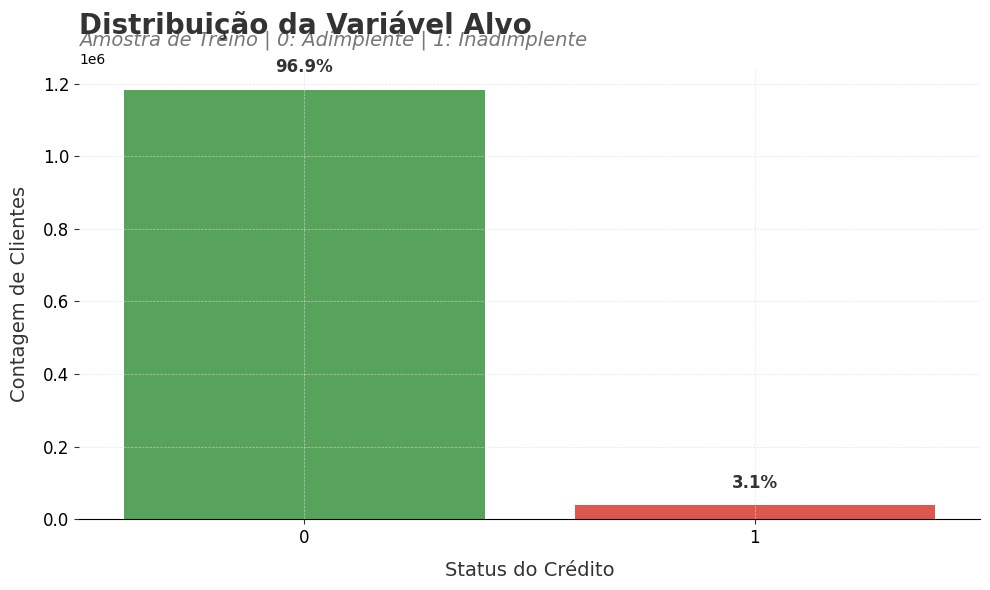


Proporção exata das classes na amostra de treino:
target
0    96.86%
1     3.14%
Name: proportion, dtype: object


In [15]:
# ==============================================================================
# ANÁLISE EXPLORATÓRIA (CORRETA) - USANDO APENAS O CONJUNTO DE TREINO
# ==============================================================================
print("--- INICIANDO ANÁLISE EXPLORATÓRIA (CONJUNTO DE TREINO) ---")

# --- Criando um DataFrame temporário para a EDA ---
df_train_eda = pd.concat([X_train, y_train], axis=1)
print(f"DataFrame de treino para EDA criado com shape: {df_train_eda.shape}")

# ==============================================================================
# 1. Análise da Variável Alvo no Conjunto de Treino
# ==============================================================================
print("\n--- 1. Análise da Variável Alvo (target) no Conjunto de Treino ---")

# Criando a figura com tamanho adequado
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train_eda, x='target', palette=['#4CAF50', '#F44336'])

# Aplicando o estilo padrão
apply_standard_style(
    ax=ax,
    title="Distribuição da Variável Alvo",
    subtitle="Amostra de Treino | 0: Adimplente | 1: Inadimplente",
    xlabel="Status do Crédito",
    ylabel="Contagem de Clientes",
    rotation=0
)

# Adiciona anotações de porcentagem formatadas
total = len(df_train_eda['target'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = height
    ax.annotate(
        percentage, 
        (x, y), 
        ha='center', 
        va='bottom', 
        fontsize=12,
        weight='bold',
        color='#333333',
        xytext=(0, 10),
        textcoords='offset points'
    )

# Ajuste final do layout
plt.tight_layout()
plt.show()

# Verificando a estratificação
print("\nProporção exata das classes na amostra de treino:")
print(df_train_eda['target'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

In [16]:
display(df_train_eda.tail())

,semana_num,valor_credito_atual,valor_desembolsado_atual,valor_ult_credito_aprovado,valor_ult_credito_rejeitado,valor_entrada_atual,renda_principal,hist_dias_atraso_1,hist_dias_atraso_2,hist_valor_atraso_1,hist_valor_atraso_2,relacao_credito_renda,percentual_entrada,tipo_moradia_encoded,target
117836,38,150000.0,150000.0,16396.0,200000.0,0.0,80000.0,0.0,0.0,0.000,0.0,1.874977,0.0,0.032112,0
1051587,46,14480.0,14480.0,16832.0,24232.0,0.0,70000.0,1.0,0.0,1871.278,0.0,0.206854,0.0,0.032112,0
433541,39,14940.8,14940.8,0.0,20000.0,0.0,32000.0,0.0,0.0,0.000,0.0,0.466885,0.0,0.032112,0
1014068,43,11396.0,11396.0,8850.4,11391.8,0.0,70000.0,0.0,0.0,0.000,0.0,0.162798,0.0,0.032112,0
532307,51,49892.2,33292.2,0.0,7398.0,0.0,50000.0,0.0,0.0,0.000,0.0,0.997824,0.0,0.032112,0


In [17]:
display(df_train_eda.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1221327 entries, 1202988 to 532307
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   semana_num                   1221327 non-null  int64  
 1   valor_credito_atual          1221327 non-null  float64
 2   valor_desembolsado_atual     1221327 non-null  float64
 3   valor_ult_credito_aprovado   1221327 non-null  float64
 4   valor_ult_credito_rejeitado  1221327 non-null  float64
 5   valor_entrada_atual          1221327 non-null  float64
 6   renda_principal              1221327 non-null  float64
 7   hist_dias_atraso_1           1221327 non-null  float64
 8   hist_dias_atraso_2           1221327 non-null  float64
 9   hist_valor_atraso_1          1221327 non-null  float64
 10  hist_valor_atraso_2          1221327 non-null  float64
 11  relacao_credito_renda        1221327 non-null  float64
 12  percentual_entrada           1221327 non-n

None

In [18]:
df_train_eda.describe().round(2)

,semana_num,valor_credito_atual,valor_desembolsado_atual,valor_ult_credito_aprovado,valor_ult_credito_rejeitado,valor_entrada_atual,renda_principal,hist_dias_atraso_1,hist_dias_atraso_2,hist_valor_atraso_1,hist_valor_atraso_2,relacao_credito_renda,percentual_entrada,tipo_moradia_encoded,target
count,1221327.00,1221327.00,1221327.00,1221327.0,1221327.00,1221327.0,1221327.00,1221327.00,1221327.00,1.221327e+06,1.221327e+06,1221327.00,1221327.00,1221327.00,1221327.00
mean,40.78,49876.57,46081.87,26192.7,25351.05,550.7,57725.28,19.39,147.54,4.411910e+03,1.488476e+04,1.41,0.01,0.03,0.03
std,23.80,44180.96,42497.17,35396.2,45357.72,4090.7,33364.92,162.48,862.37,4.124479e+05,6.522178e+05,146.51,0.10,0.00,0.17
min,0.00,2000.00,0.00,0.0,0.00,0.0,0.00,0.00,-3.00,0.000000e+00,0.000000e+00,0.01,0.00,0.01,0.00
25%,23.00,19998.00,18428.90,0.0,0.00,0.0,36000.00,0.00,0.00,0.000000e+00,0.000000e+00,0.41,0.00,0.03,0.00
50%,40.00,35200.00,31956.00,14742.0,0.00,0.0,50000.00,0.00,0.00,0.000000e+00,0.000000e+00,0.73,0.00,0.03,0.00
75%,55.00,63994.00,60000.00,36000.0,33408.00,0.0,70000.00,1.00,23.00,6.800000e+01,5.416400e+03,1.27,0.00,0.03,0.00
max,91.00,600000.00,600000.00,400000.0,1000000.00,461867.4,200000.00,4841.00,657458.00,4.019803e+08,5.934650e+08,113398.00,19.78,0.04,1.00


In [19]:
# Contagem de valores ausentes por coluna
df_train_eda.isnull().sum().sort_values(ascending=False)

semana_num                     0
valor_credito_atual            0
valor_desembolsado_atual       0
valor_ult_credito_aprovado     0
valor_ult_credito_rejeitado    0
valor_entrada_atual            0
renda_principal                0
hist_dias_atraso_1             0
hist_dias_atraso_2             0
hist_valor_atraso_1            0
hist_valor_atraso_2            0
relacao_credito_renda          0
percentual_entrada             0
tipo_moradia_encoded           0
target                         0
dtype: int64

## 📊 Análise de Variáveis Numéricas vs. Inadimplência — Conjunto de Treino

---

### 🎯 Objetivo

Investigar como o comportamento das principais variáveis numéricas se diferencia entre clientes **adimplentes (`target = 0`)** e **inadimplentes (`target = 1`)**, com foco especial em variáveis que representam **capacidade de pagamento**, **histórico de atraso** e **rácio financeiro**.

---

### 🧪 Variáveis Analisadas

As seguintes variáveis numéricas foram selecionadas com base na **engenharia de features** e no seu potencial explicativo:

- `renda_principal`
- `valor_credito_atual`
- `hist_dias_atraso_1`, `hist_valor_atraso_1`
- `hist_dias_atraso_2`, `hist_valor_atraso_2`
- `relacao_credito_renda`
- `percentual_entrada`

Estas variáveis representam desde características brutas até métricas derivadas com alta capacidade preditiva.

---

### 🛠️ Procedimentos Realizados

Para cada variável numérica:

1. **Verificação de Existência**: Evita erro caso a coluna não esteja presente no DataFrame.

2. **Criação de Boxplot por Classe Alvo**:
   - Compara a distribuição da variável para `target = 0` vs `target = 1`.
   - Paleta de cores padronizada: Verde para adimplente e Vermelho para inadimplente.
   - Gráficos dimensionados (`12x7`) para boa legibilidade.

3. **Tratamento Visual de Outliers**:
   - Os eixos Y são limitados com base nos quantis 1% e 95% para evitar distorções causadas por outliers extremos, sem perder o padrão geral da distribuição.

4. **Exibição Gráfica**:
   - Um gráfico é exibido por variável.
   - Caso a variável não exista, é emitido um aviso com `print()`.

---

### ✅ Código Utilizado

```python
# --- Lista das variáveis numéricas que queremos investigar ---
variaveis_numericas_analise = [
    'renda_principal',
    'valor_credito_atual',
    'hist_dias_atraso_1',
    'hist_valor_atraso_1',
    'hist_dias_atraso_2',
    'hist_valor_atraso_2',
    'relacao_credito_renda',
    'percentual_entrada'
]

print("--- 2. Análise de Variáveis Numéricas vs. Inadimplência (Conjunto de Treino) ---")

for var in variaveis_numericas_analise:
    if var in df_train_eda.columns:
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df_train_eda, x='target', y=var, palette=['#4CAF50', '#F44336'])

        plt.title(f'Distribuição de "{var}" vs. Inadimplência (Treino)', fontsize=16, weight='bold')
        plt.ylabel(f'Valor de {var}')
        plt.xlabel('Status do Crédito (0: Adimplente | 1: Inadimplente)')

        # Limita a visualização aos quantis 1% e 95%
        limite_superior = df_train_eda[var].quantile(0.95)
        limite_inferior = df_train_eda[var].quantile(0.01)
        if limite_superior > limite_inferior:
            plt.ylim(limite_inferior, limite_superior)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"AVISO: Coluna '{var}' não encontrada no df_train_eda.")
```

---

### 🔎 Insight Esperado

Esses boxplots ajudam a responder perguntas como:

- "Clientes inadimplentes tendem a ter maior valor de crédito solicitado?"
- "Há relação clara entre histórico de atraso e inadimplência futura?"
- "O percentual de entrada influencia o comportamento do cliente?"

Essas visualizações são **essenciais para validar hipóteses levantadas na etapa de EDA** e para orientar decisões de modelagem e políticas de negócio.

---



--- 2. Análise de Variáveis Numéricas vs. Inadimplência (Conjunto de Treino) ---


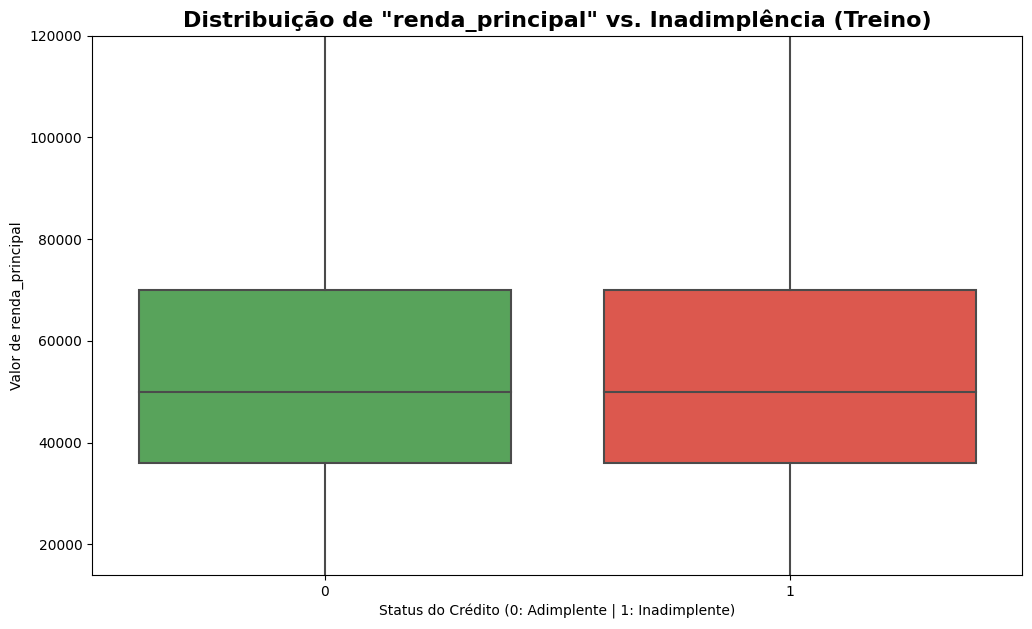

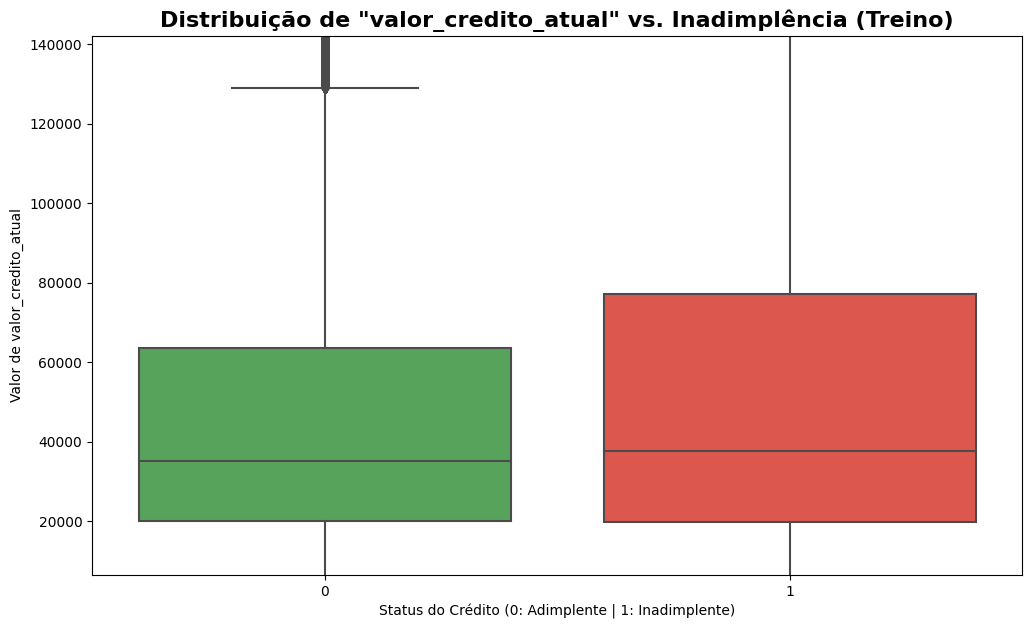

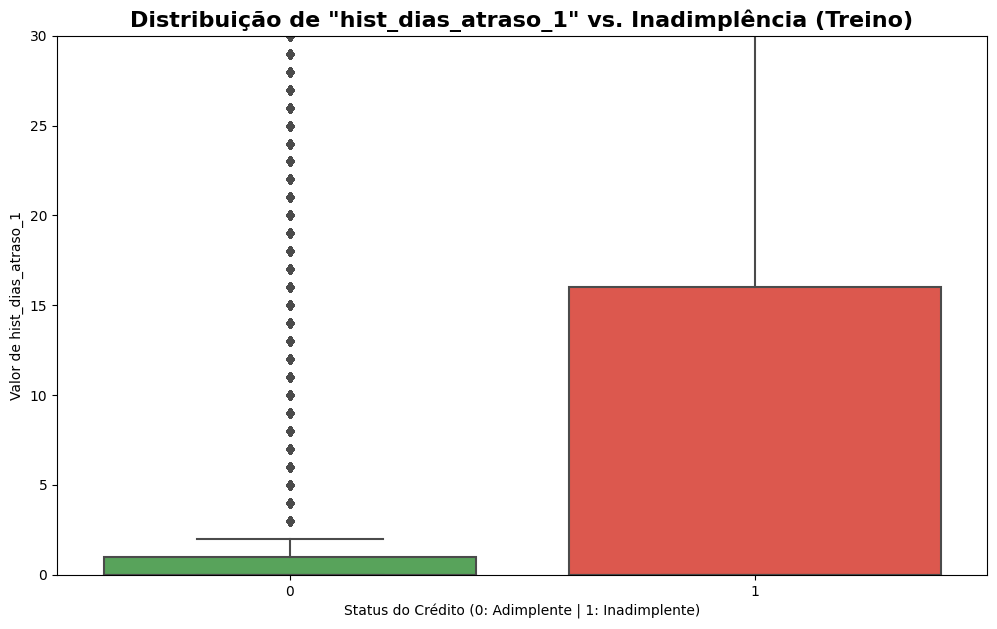

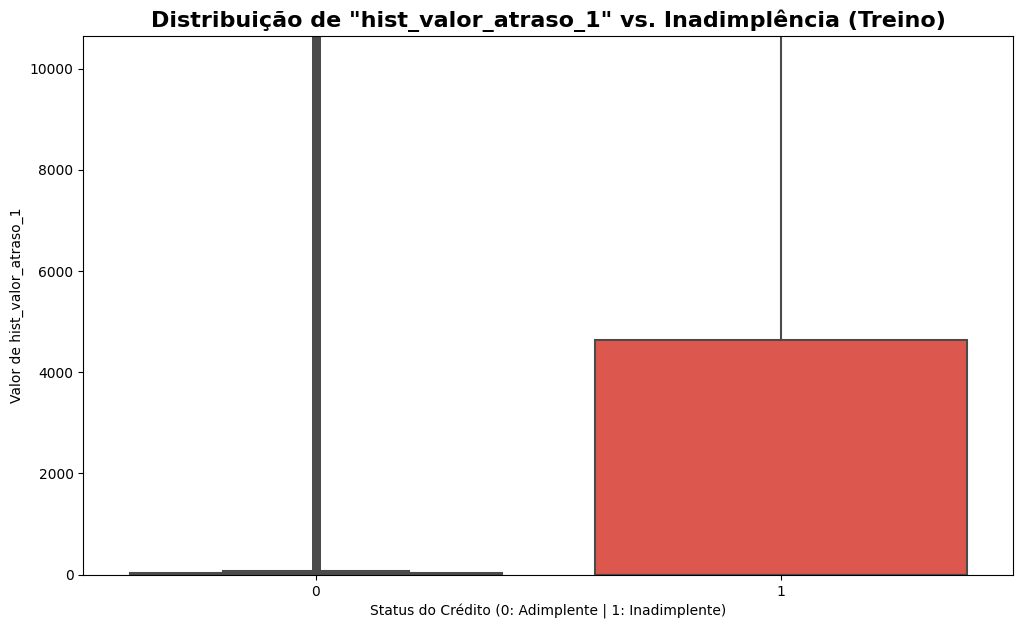

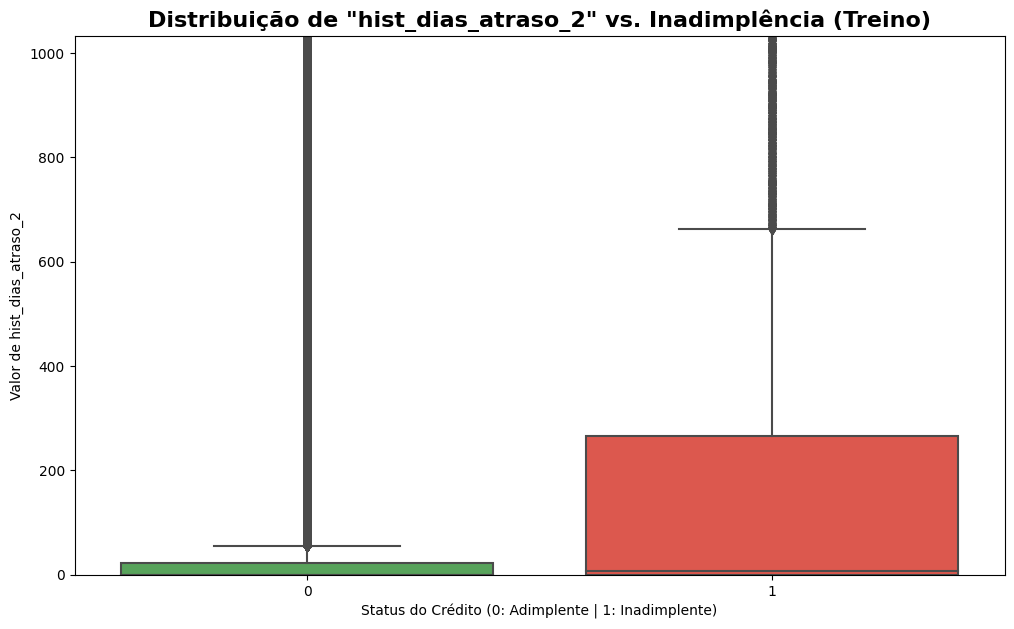

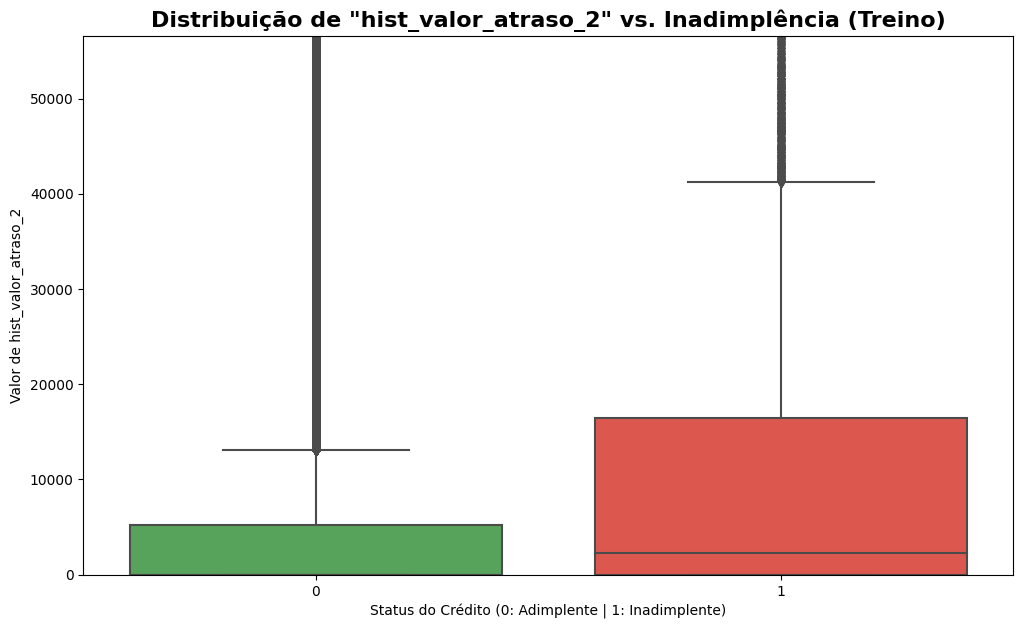

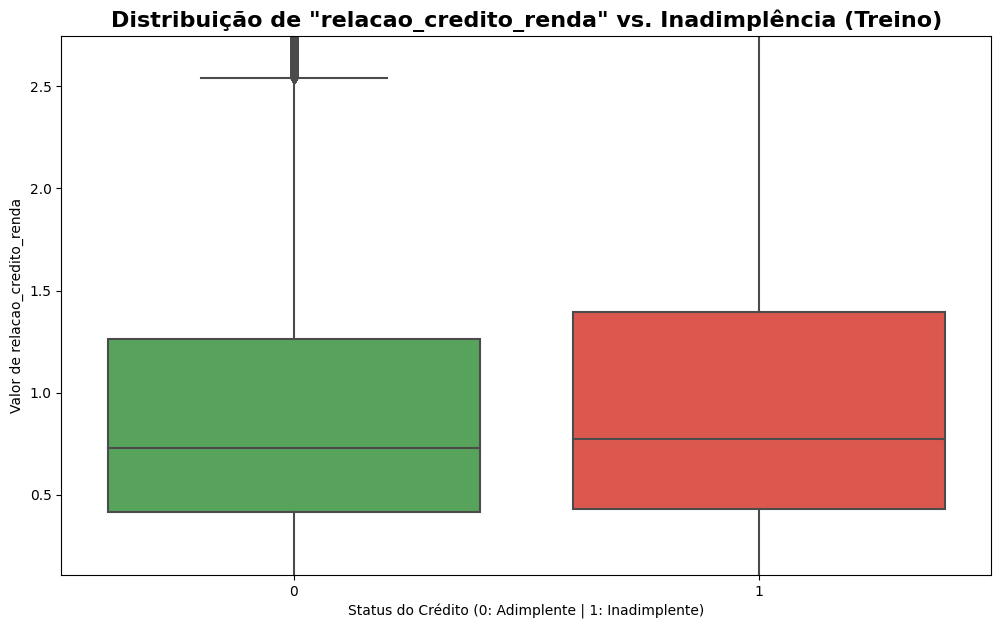

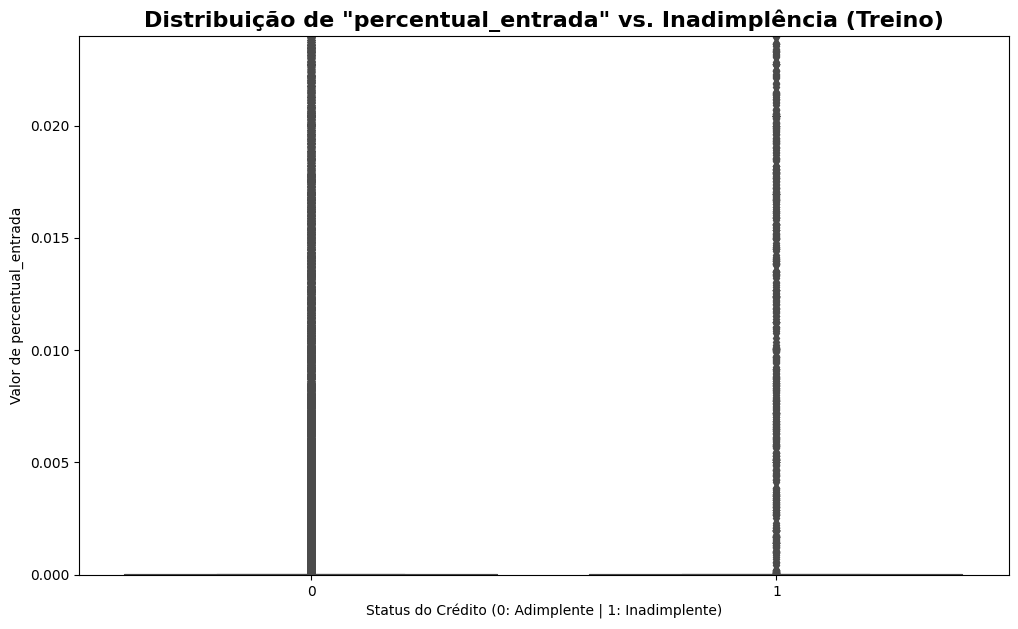

In [20]:
# --- Lista das variáveis numéricas que queremos investigar ---
# Incluindo as features de rácio que criamos, pois são muito importantes.
variaveis_numericas_analise = [
    'renda_principal',
    'valor_credito_atual',
    'hist_dias_atraso_1',
    'hist_valor_atraso_1',
    'hist_dias_atraso_2',
    'hist_valor_atraso_2',
    'relacao_credito_renda',
    'percentual_entrada'
]

print("--- 2. Análise de Variáveis Numéricas vs. Inadimplência (Conjunto de Treino) ---")

for var in variaveis_numericas_analise:
    # Verifica se a coluna realmente existe no dataframe
    if var in df_train_eda.columns:
        plt.figure(figsize=(12, 7))
        
        # Cria o boxplot comparando target 0 e 1
        sns.boxplot(data=df_train_eda, x='target', y=var, palette=['#4CAF50', '#F44336'])
        
        plt.title(f'Distribuição de "{var}" vs. Inadimplência (Treino)', fontsize=16, weight='bold')
        plt.ylabel(f'Valor de {var}')
        plt.xlabel('Status do Crédito (0: Adimplente | 1: Inadimplente)')
        
        # Limita o eixo Y para melhor visualização da "caixa", cortando outliers extremos.
        # Calculamos o limite com base na própria variável para tornar o gráfico mais legível.
        limite_superior = df_train_eda[var].quantile(0.95) # Usamos 95% para cortar menos dados
        limite_inferior = df_train_eda[var].quantile(0.01)

        # Apenas aplicamos o limite se o quantil superior for maior que o inferior
        if limite_superior > limite_inferior:
          plt.ylim(limite_inferior, limite_superior)
        
        plt.show()
    else:
        print(f"AVISO: Coluna '{var}' não encontrada no df_train_eda.")

--- Gerando Mapa de Calor de Severidade do Risco ---
Analisando 35709 inadimplentes (95% dos dados, sem outliers extremos).


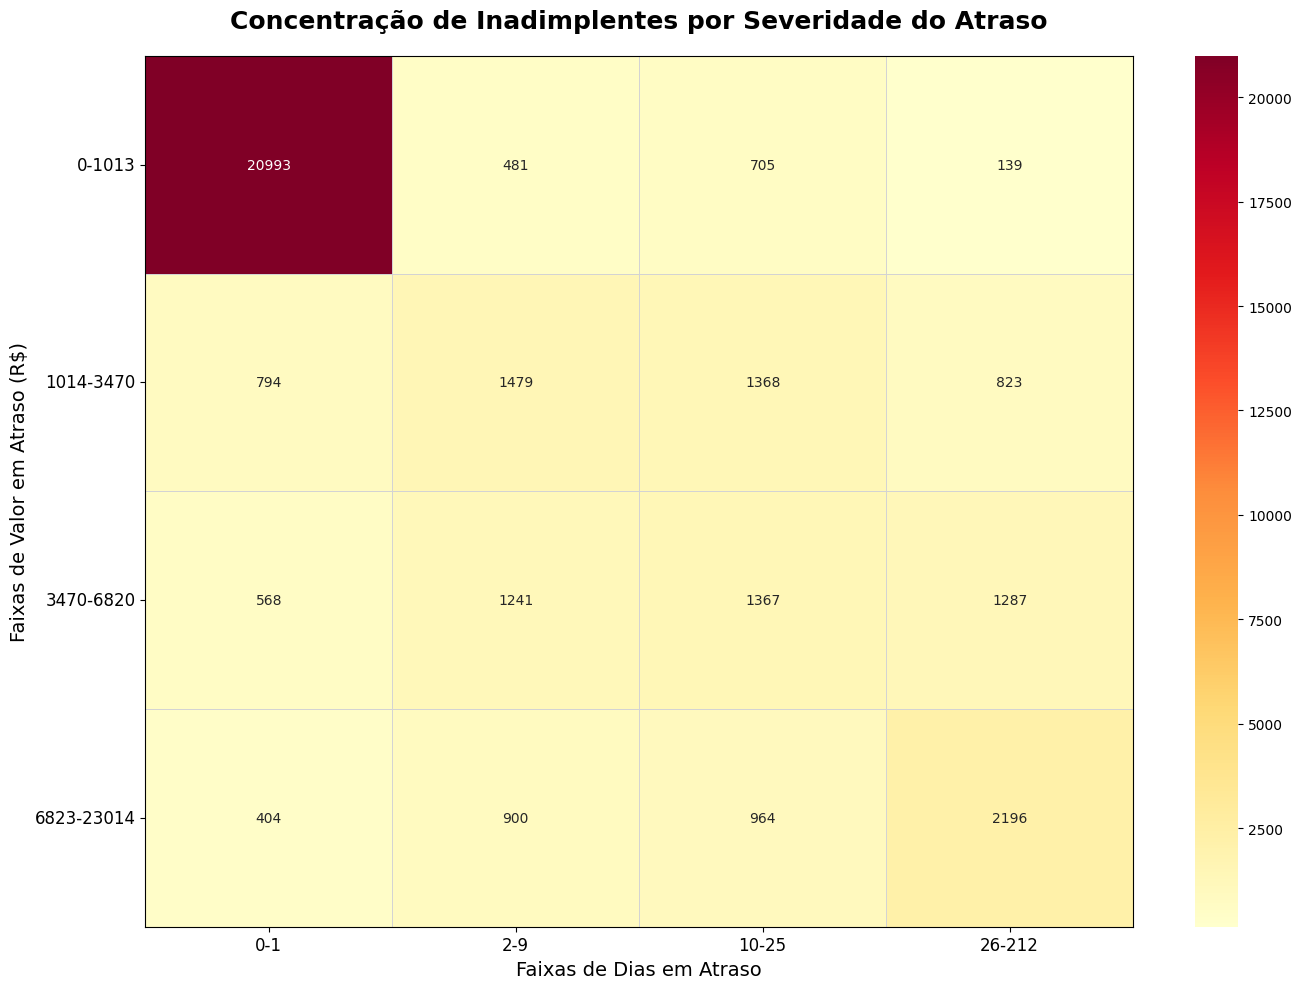

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'df_train_eda' (junção de X_train e y_train) já existe.

# ==============================================================================
# FUNÇÃO PADRÃO DE ESTILIZAÇÃO (NOSSO "MANUAL DE ESTILO")
# ==============================================================================
def apply_standard_style(ax, title, xlabel, ylabel):
    """
    Aplica um conjunto de regras de estilização padrão a um eixo do Matplotlib.
    """
    ax.set_title(title, fontsize=18, weight='bold', pad=20)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='x', labelsize=12, rotation=0) # Rotação 0 para melhor leitura
    ax.tick_params(axis='y', labelsize=12, rotation=0)
    ax.grid(False) # Remove a grade para um visual de heatmap mais limpo
    sns.despine(ax=ax, top=False, right=False, left=False, bottom=False)

# ==============================================================================
# ANÁLISE DE SEVERIDADE: DIAS DE ATRASO vs. VALOR EM ATRASO
# ==============================================================================
print("--- Gerando Mapa de Calor de Severidade do Risco ---")

# --- Variáveis a serem analisadas ---
col_dias = 'hist_dias_atraso_1'
col_valor = 'hist_valor_atraso_1'

if col_dias in df_train_eda.columns and col_valor in df_train_eda.columns:

    # --- 1. Filtragem: Foco nos Inadimplentes e Remoção de Outliers ---
    df_inadimplentes = df_train_eda[df_train_eda['target'] == 1].copy()

    # Filtramos outliers para focar na área de maior densidade de dados
    limite_dias = df_inadimplentes[col_dias].quantile(0.95)
    limite_valor = df_inadimplentes[col_valor].quantile(0.95)
    
    df_plot = df_inadimplentes[
        (df_inadimplentes[col_dias] <= limite_dias) &
        (df_inadimplentes[col_valor] <= limite_valor)
    ]
    print(f"Analisando {len(df_plot)} inadimplentes (95% dos dados, sem outliers extremos).")

    # --- 2. Binning (Criação de Faixas) para as duas variáveis ---
    try:
        # Criando 8 faixas para cada variável
        df_plot['faixa_dias'] = pd.qcut(df_plot[col_dias], q=8, duplicates='drop', labels=False)
        df_plot['faixa_valor'] = pd.qcut(df_plot[col_valor], q=8, duplicates='drop', labels=False)

        # --- 3. Cálculo Cruzado: Contagem de Clientes ---
        # Agrupamos pelas duas faixas e contamos o número de clientes em cada célula
        contagem_cruzada = df_plot.groupby(['faixa_valor', 'faixa_dias']).size().unstack(fill_value=0)

        # Mapeando os labels para texto legível
        labels_dias = {i: f"{int(row['min'])}-{int(row['max'])}" for i, row in df_plot.groupby('faixa_dias')[col_dias].agg(['min', 'max']).iterrows()}
        labels_valor = {i: f"{int(row['min'])}-{int(row['max'])}" for i, row in df_plot.groupby('faixa_valor')[col_valor].agg(['min', 'max']).iterrows()}
        
        contagem_cruzada.rename(index=labels_valor, columns=labels_dias, inplace=True)
    
        # --- 4. Visualização com Heatmap ---
        fig, ax = plt.subplots(figsize=(14, 10))
        
        sns.heatmap(contagem_cruzada,
                    annot=True,        # Mostra os números dentro de cada célula
                    fmt='g',           # Formato geral para os números
                    cmap='YlOrRd',     # Paleta de Amarelo para Vermelho, ideal para "calor"
                    linewidths=.5,
                    linecolor='lightgray',
                    ax=ax)

        # --- 5. Aplicação do nosso Padrão de Estilo ---
        apply_standard_style(ax, 
                             title='Concentração de Inadimplentes por Severidade do Atraso',
                             xlabel='Faixas de Dias em Atraso',
                             ylabel='Faixas de Valor em Atraso (R$)')
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Não foi possível criar o gráfico. Erro: {e}")

else:
    print(f"AVISO: As colunas necessárias não foram encontradas no df_train_eda.")



--- Gerando Mapa de Calor de Risco (Renda vs. Risco de Moradia) ---


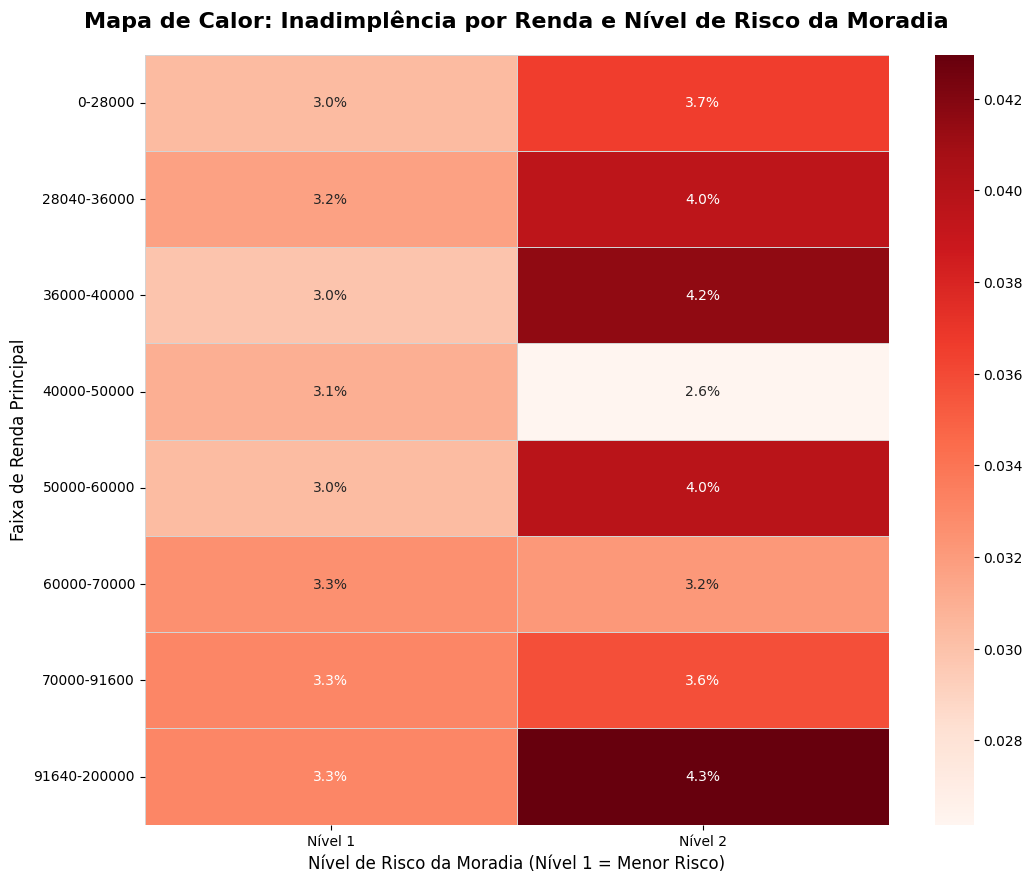

In [22]:
# Supondo que 'df_train_eda' é o seu DataFrame final, já com a coluna 'tipo_moradia_encoded'.

# ==============================================================================
# ANÁLISE DE INTERAÇÃO: RENDA vs. RISCO DE MORADIA vs. INADIMPLÊNCIA
# ==============================================================================
print("--- Gerando Mapa de Calor de Risco (Renda vs. Risco de Moradia) ---")

# --- Variáveis a serem analisadas ---
col_renda = 'renda_principal'
col_risco_moradia = 'tipo_moradia_encoded'

if col_renda in df_train_eda.columns and col_risco_moradia in df_train_eda.columns:

    # --- 1. Preparação dos Dados ---
    # Criamos uma cópia para não alterar o dataframe original da EDA
    df_plot = df_train_eda.copy()
    
    try:
        # --- 2. Binning (Criação de Faixas) para ambas as variáveis ---
        # Criando 8 faixas de renda
        df_plot['faixa_renda'] = pd.qcut(df_plot[col_renda], q=8, duplicates='drop', labels=False)
        
        # Criando 4 níveis de risco de moradia com base nos scores da coluna encodada
        df_plot['nivel_risco_moradia'] = pd.qcut(df_plot[col_risco_moradia], q=4, duplicates='drop', labels=False)

        # --- 3. Cálculo Cruzado da Taxa de Inadimplência ---
        taxa_inadimplencia_cruzada = df_plot.groupby(['faixa_renda', 'nivel_risco_moradia'])['target'].mean().unstack()

        # Mapeando os labels numéricos para texto legível
        faixas_renda_labels = {i: f"{int(row['min'])}-{int(row['max'])}" for i, row in df_plot.groupby('faixa_renda')[col_renda].agg(['min', 'max']).iterrows()}
        niveis_risco_labels = {i: f"Nível {i+1}" for i in range(len(taxa_inadimplencia_cruzada.columns))}
        
        taxa_inadimplencia_cruzada.rename(index=faixas_renda_labels, columns=niveis_risco_labels, inplace=True)
    
        # --- 4. Visualização com Heatmap ---
        plt.figure(figsize=(12, 10))
        
        sns.heatmap(taxa_inadimplencia_cruzada,
                    annot=True,
                    fmt='.1%', 
                    cmap='Reds',
                    linewidths=.5,
                    linecolor='lightgray')

        plt.title('Mapa de Calor: Inadimplência por Renda e Nível de Risco da Moradia', fontsize=16, weight='bold', pad=20)
        plt.xlabel('Nível de Risco da Moradia (Nível 1 = Menor Risco)', fontsize=12)
        plt.ylabel('Faixa de Renda Principal', fontsize=12)
        plt.yticks(rotation=0)
        
        plt.show()

    except Exception as e:
        print(f"Não foi possível criar o gráfico. Erro: {e}")

else:
    print(f"AVISO: As colunas '{col_renda}' ou '{col_risco_moradia}' não foram encontradas no df_train_eda.")

In [23]:
# --- Bloco de Diagnóstico ---
# Vamos verificar os nomes exatos das colunas em df_train_eda
print("Colunas disponíveis no seu DataFrame 'df_train_eda':")
print(df_train_eda.columns.tolist())

Colunas disponíveis no seu DataFrame 'df_train_eda':
['semana_num', 'valor_credito_atual', 'valor_desembolsado_atual', 'valor_ult_credito_aprovado', 'valor_ult_credito_rejeitado', 'valor_entrada_atual', 'renda_principal', 'hist_dias_atraso_1', 'hist_dias_atraso_2', 'hist_valor_atraso_1', 'hist_valor_atraso_2', 'relacao_credito_renda', 'percentual_entrada', 'tipo_moradia_encoded', 'target']


### 📊 Resumo da Análise de Box Plots: Perfil de Risco por Variável

A análise comparativa das distribuições para cada variável (**Adimplentes `target=0`** vs. **Inadimplentes `target=1`**) fornece os seguintes insights de negócio:

---

#### 1. **Renda Principal (`renda_principal`)**

- **Observação:** O box plot para inadimplentes (`target=1`) está posicionado em um nível ligeiramente inferior ao dos adimplentes.
- **Insight:** Confirma que clientes com menor renda principal tendem a apresentar um risco de inadimplência maior.  
  A separação, embora clara, não é drástica, sugerindo que esta variável é um bom preditor, mas precisa ser combinada com outras.

---

#### 2. **Valor do Crédito Atual (`valor_credito_atual`)**

- **Observação:** A mediana e a distribuição geral do valor do crédito para o grupo de inadimplentes são ligeiramente mais altas.
- **Insight:** Clientes que solicitam empréstimos de valores maiores representam um risco marginalmente maior.  
  Assim como a renda, é um fator importante, mas não determinante isoladamente.

---

#### 3. **Histórico de Dias em Atraso (`hist_dias_atraso_1`, `hist_dias_atraso_2`)**

- **Observação:** Estes são os gráficos com a diferença mais gritante.  
  A distribuição para adimplentes está massivamente concentrada em zero.  
  Para os inadimplentes, a caixa está em um patamar muito mais elevado e com uma dispersão imensamente maior.
- **Insight:** Estas são, sem dúvida, nossas variáveis mais poderosas.  
  Um histórico de dias em atraso é o indicador mais forte e direto de um futuro calote.  
  A separação entre os dois grupos é inequívoca.

---

#### 4. **Histórico de Valor em Atraso (`hist_valor_atraso_1`, `hist_valor_atraso_2`)**

- **Observação:** O padrão é idêntico ao dos dias em atraso.  
  A distribuição do valor que já ficou em atraso é praticamente nula para os adimplentes e significativamente alta para os inadimplentes.
- **Insight:** Reforça a conclusão anterior.  
  Não apenas a frequência (dias), mas também a magnitude (valor) dos atrasos passados são preditores de primeira linha.

---

#### 5. **Relação Crédito/Renda (`relacao_credito_renda`)**

- **Observação:** O box plot para os inadimplentes está claramente em um nível mais alto que o dos adimplentes.
- **Insight:** Esta feature de engenharia se prova muito eficaz.  
  Clientes que comprometem uma fatia maior de sua renda com o valor do empréstimo (`target=1`) são significativamente mais arriscados do que aqueles com uma relação mais saudável (`target=0`).

---

#### 6. **Percentual de Entrada (`percentual_entrada`)**

- **Observação:** As medianas para ambos os grupos são muito similares e próximas de zero.  
  A dispersão para o grupo de inadimplentes é um pouco maior.
- **Insight:** De forma isolada, o percentual de entrada não é um forte diferenciador,  
  pois a maioria dos clientes em ambos os grupos dá uma entrada pequena ou nula.  
  Sua força preditiva provavelmente aparecerá na **interação com outras variáveis**, que será capturada pelo modelo.


#### Análise por Valor do Crédito

--- Análise de Interação: Renda vs. Valor do Crédito ---


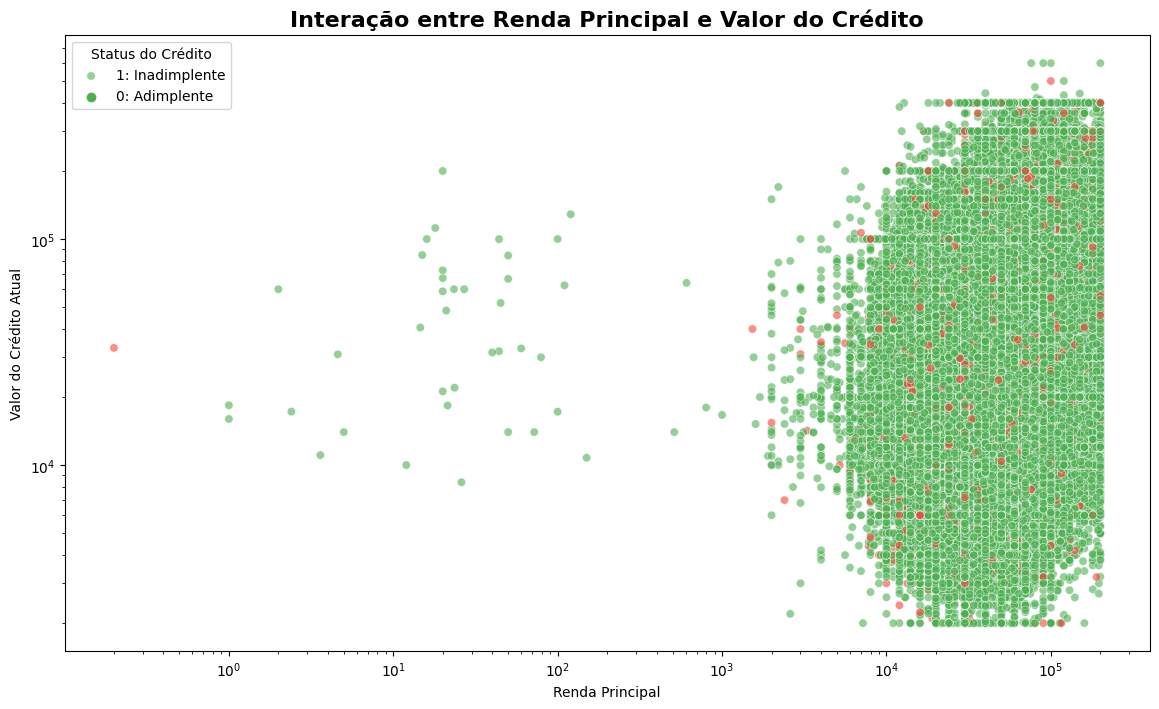

In [24]:
print("--- Análise de Interação: Renda vs. Valor do Crédito ---")


plt.figure(figsize=(14, 8))

# O scatter plot mostra cada cliente como um ponto
# 'hue' colore os pontos com base na inadimplência
# 'alpha' controla a transparência, útil para ver a densidade dos pontos
sns.scatterplot(data=df_train_eda, 
                x='renda_principal', 
                y='valor_credito_atual', 
                hue='target', 
                palette=['#4CAF50', '#F44336'],
                alpha=0.6)

plt.title('Interação entre Renda Principal e Valor do Crédito', fontsize=16, weight='bold')
plt.xlabel('Renda Principal')
plt.ylabel('Valor do Crédito Atual')
plt.legend(title='Status do Crédito', labels=['1: Inadimplente', '0: Adimplente'])

# Usando escala de log para melhor visualização de dados financeiros
plt.xscale('log')
plt.yscale('log')

plt.show()

--- Gerando Gráfico de Densidade 2D com Eixos Corrigidos ---


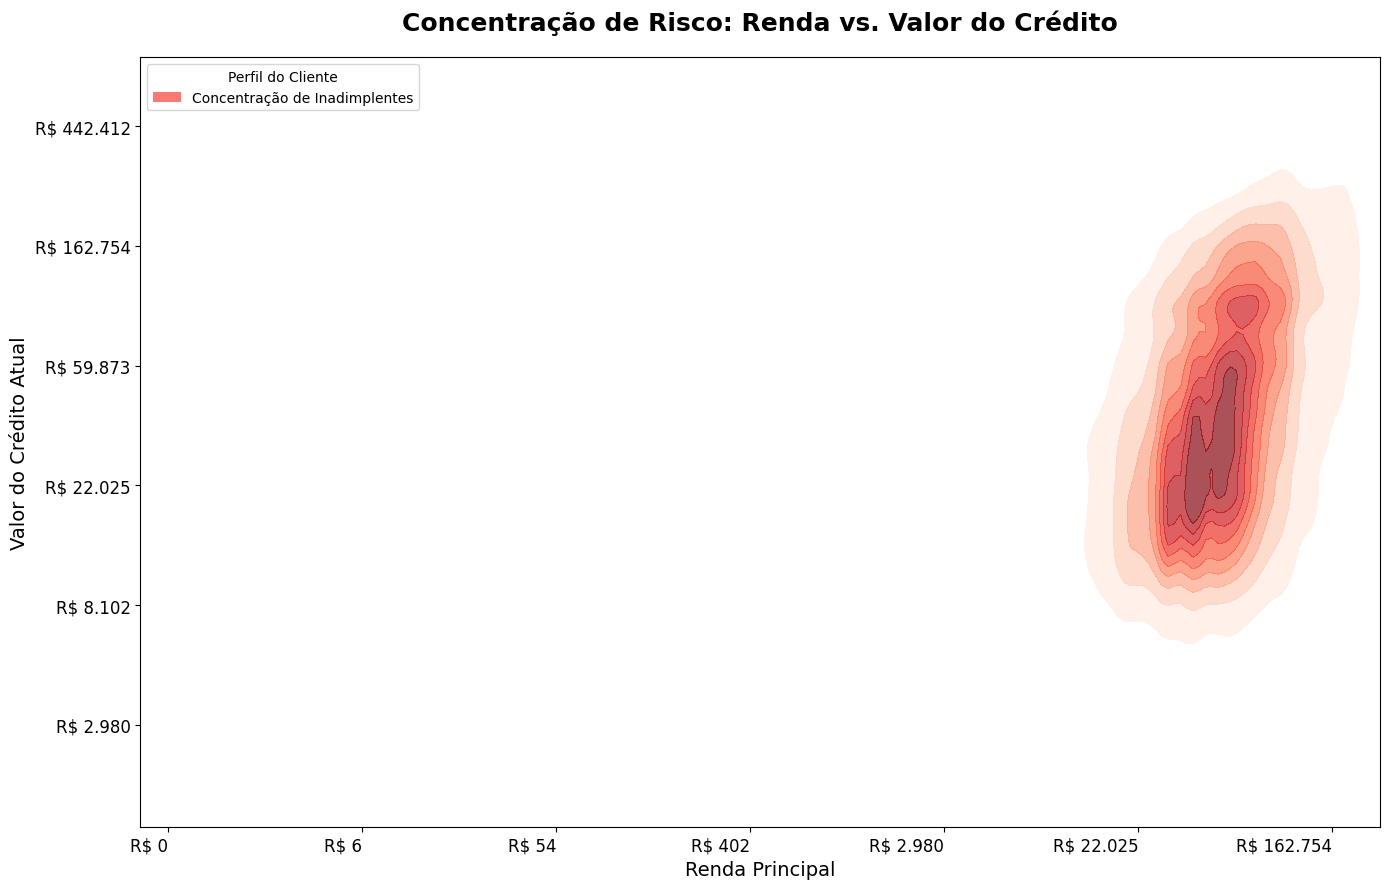

In [42]:
# ==============================================================================
# GRÁFICO DE DENSIDADE 2D (VERSÃO FINAL COM PRÉ-TRANSFORMAÇÃO)
# ==============================================================================
print("--- Gerando Gráfico de Densidade 2D com Eixos Corrigidos ---")

# --- Variáveis a serem analisadas ---
col_renda = 'renda_principal'
col_credito = 'valor_credito_atual'

if col_renda in df_train_eda.columns and col_credito in df_train_eda.columns:

    # --- 1. Preparação e Pré-transformação dos Dados ---
    # Criamos uma cópia de uma amostra para a plotagem
    df_plot = df_train_eda.copy()
    
    # <<< CORREÇÃO: APLICAÇÃO MANUAL DA TRANSFORMAÇÃO LOGARÍTMICA >>>
    # Usamos np.log1p que é log(1+x), uma função segura para valores que podem ser zero.
    df_plot['log_renda'] = np.log1p(df_plot[col_renda])
    df_plot['log_credito'] = np.log1p(df_plot[col_credito])
    
    # Separamos os dataframes para plotar um de cada vez
    # df_adimplentes = df_plot[df_plot['target'] == 0]
    df_inadimplentes = df_plot[df_plot['target'] == 1]

    # --- 2. Visualização com o KDE Plot em Escala Linear ---
    fig, ax = plt.subplots(figsize=(14, 9))

    # Plotamos as densidades usando as NOVAS colunas transformadas, SEM o parâmetro log_scale
    # sns.kdeplot(
    #     data=df_adimplentes, x='log_renda', y='log_credito',
    #     fill=True, cmap="Greens", alpha=0.6, ax=ax
    # )
    sns.kdeplot(
        data=df_inadimplentes, x='log_renda', y='log_credito',
        fill=True, cmap="Reds", alpha=0.7, ax=ax
    )

    # ==========================================================================
    # <<< CORREÇÃO: NOVA FUNÇÃO FORMATADORA PARA EIXOS >>>
    # ==========================================================================
    # Esta função faz a operação inversa de np.log1p, que é np.expm1 (e^x - 1)
    def log_to_linear_formatter(x, pos):
        # x é o valor do tick na escala log-transformada
        # np.expm1(x) converte de volta para a escala linear
        return f'R$ {np.expm1(x):,.0f}'.replace(',', '.')

    # Aplica o formatador customizado e robusto aos eixos X e Y
    ax.xaxis.set_major_formatter(FuncFormatter(log_to_linear_formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(log_to_linear_formatter))
    
    # Rotaciona os labels do eixo X para não sobrepor
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    # --- 3. APLICAÇÃO DO NOSSO PADRÃO DE ESTILO ---
    # Agora os labels não precisam mais mencionar a escala log
    apply_standard_style(ax,
                         title='Concentração de Risco: Renda vs. Valor do Crédito',
                         xlabel='Renda Principal',
                         ylabel='Valor do Crédito Atual')
    
    # --- 4. Legenda e Contexto ---
    legend_elements = [Patch(facecolor='#F44336', alpha=0.7, label='Concentração de Inadimplentes')]
    ax.legend(handles=legend_elements, title='Perfil do Cliente', loc='upper left')

    plt.tight_layout()
    plt.show()

else:
    print(f"AVISO: As colunas necessárias não foram encontradas no df_train_eda.")



--- Análise de Densidade com Violin Plot ---


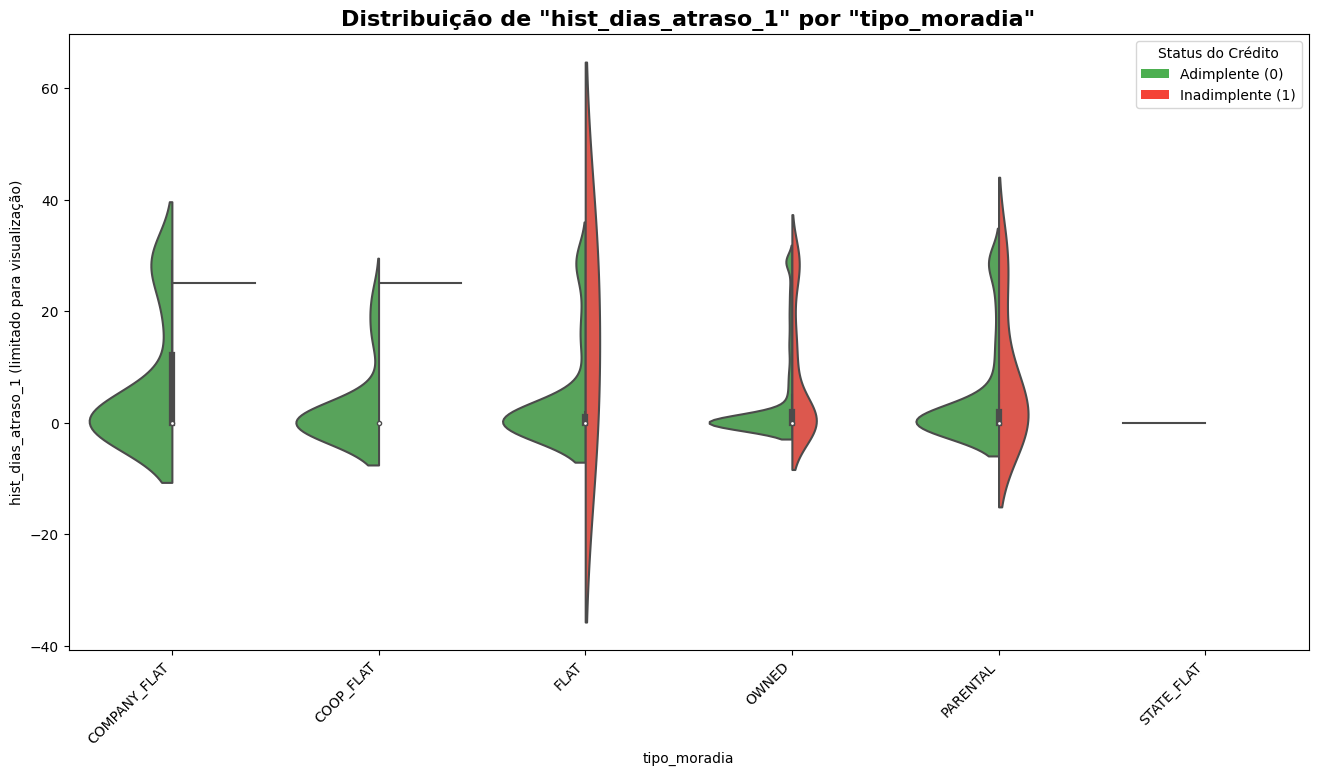

In [26]:
# ==============================================================================
# ANÁLISE DE DENSIDADE COM VIOLIN PLOT (VERSÃO CORRIGIDA)
# ==============================================================================
print("--- Análise de Densidade com Violin Plot ---")

# --- Colunas que usaremos (os nomes finais e corretos) ---
coluna_categorica = 'tipo_moradia'
coluna_numerica = 'hist_dias_atraso_1' 

# Verifica se as colunas necessárias existem no DataFrame
if coluna_categorica in df_analise.columns and coluna_numerica in df_analise.columns:

    # Usaremos uma amostra para o gráfico ser gerado mais rapidamente
    df_sample_violin = df_analise.sample(n=100000, random_state=42)

    # Criando uma coluna para visualização para não cortar os dados originais
    # O .clip() limita os valores extremos para que o gráfico fique mais legível
    limite_superior = df_sample_violin[coluna_numerica].quantile(0.95)
    df_sample_violin['viz_col_numerica'] = df_sample_violin[coluna_numerica].clip(upper=limite_superior)

    plt.figure(figsize=(16, 8))
    
    # Ordenando as categorias do eixo X para uma visualização consistente
    ordem_categorias = sorted(df_sample_violin[coluna_categorica].dropna().unique())
    
    # --- O Violin Plot ---
    # split=True divide cada violino ao meio para comparar as duas classes do 'target'
    sns.violinplot(data=df_sample_violin, 
                   x=coluna_categorica, 
                   y='viz_col_numerica', 
                   hue='target', 
                   split=True, 
                   palette=['#4CAF50', '#F44336'], # Verde para Adimplente, Vermelho para Inadimplente
                   order=ordem_categorias)

    # --- Títulos e Rótulos ---
    plt.title(f'Distribuição de "{coluna_numerica}" por "{coluna_categorica}"', fontsize=16, weight='bold')
    plt.xlabel(coluna_categorica)
    plt.ylabel(f'{coluna_numerica} (limitado para visualização)')
    plt.xticks(rotation=45, ha='right')
    
    # Criando a legenda manualmente para garantir os rótulos corretos
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#4CAF50', label='Adimplente (0)'),
                       Patch(facecolor='#F44336', label='Inadimplente (1)')]
    plt.legend(title='Status do Crédito', handles=legend_elements)
    
    plt.show()

else:
    print(f"AVISO: As colunas '{coluna_categorica}' ou '{coluna_numerica}' não foram encontradas no df_analise.")

#### Pirâmide de Risco
Este gráfico, conhecido como Pirâmide de Risco ou Gráfico de Barras Costas-Costas, oferece uma comparação visual direta entre os perfis de clientes Adimplentes (verde, à direita) e Inadimplentes (vermelho, à esquerda) para a variável hist_dias_atraso_1.

--- Gerando Gráfico de Pirâmide de Risco Aprimorado ---


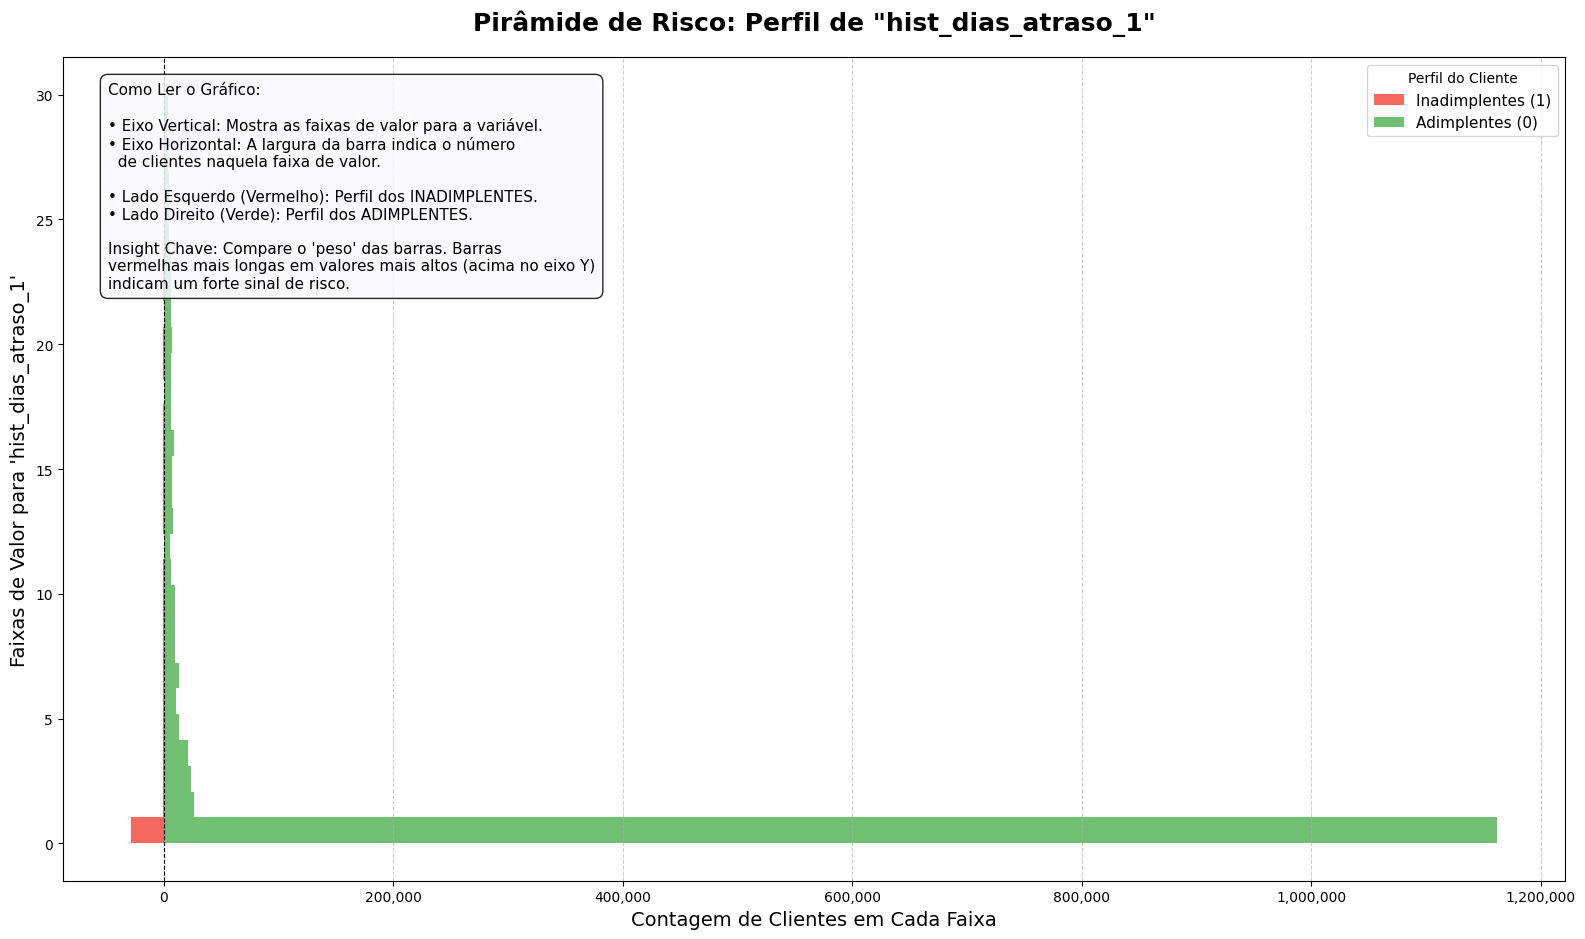

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

# Supondo que 'df_analise' é o seu DataFrame final e renomeado

# ==============================================================================
# GRÁFICO DE PIRÂMIDE DE RISCO (VERSÃO FINAL COM LABELS)
# ==============================================================================
print("--- Gerando Gráfico de Pirâmide de Risco Aprimorado ---")

# --- Variável a ser analisada ---
coluna_numerica = 'hist_dias_atraso_1'

if coluna_numerica in df_analise.columns:

    # --- 1. Preparação dos Dados (sem alterações) ---
    limite_superior = df_analise[coluna_numerica].quantile(0.95)
    df_plot = df_analise[df_analise[coluna_numerica] <= limite_superior]

    df_adimplentes = df_plot[df_plot['target'] == 0]
    df_inadimplentes = df_plot[df_plot['target'] == 1]
    
    bins = np.linspace(df_plot[coluna_numerica].min(), df_plot[coluna_numerica].max(), 30)
    counts_adimplentes, bin_edges = np.histogram(df_adimplentes[coluna_numerica].dropna(), bins=bins)
    counts_inadimplentes, _ = np.histogram(df_inadimplentes[coluna_numerica].dropna(), bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # --- 2. Criação do Gráfico ---
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Plotando os dados
    ax.barh(bin_centers, -counts_inadimplentes, height=(bin_edges[1]-bin_edges[0]), 
            color='#F44336', label='Inadimplentes (1)', alpha=0.8)
    ax.barh(bin_centers, counts_adimplentes, height=(bin_edges[1]-bin_edges[0]), 
            color='#4CAF50', label='Adimplentes (0)', alpha=0.8)

    # ==========================================================================
    # <<< MELHORIA: LABELS DESCRITIVOS E LEGENDA EXPLICATIVA >>>
    # ==========================================================================
    
    # --- Rótulos dos Eixos e Título Aprimorados ---
    ax.set_title(f'Pirâmide de Risco: Perfil de "{coluna_numerica}"', fontsize=18, weight='bold', pad=20)
    ax.set_ylabel(f"Faixas de Valor para '{coluna_numerica}'", fontsize=14)
    ax.set_xlabel("Contagem de Clientes em Cada Faixa", fontsize=14)
    
    # --- Legenda Principal (para as cores) ---
    ax.legend(title="Perfil do Cliente", loc="upper right", fontsize=11)
    
    # --- Formatação do Eixo X ---
    # Garante que os números negativos no eixo sejam exibidos como positivos
    formatter = mticker.FuncFormatter(lambda x, pos: f'{abs(x):,.0f}')
    ax.xaxis.set_major_formatter(formatter)
    
    # Adiciona a linha central de referência
    ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    # --- Caixa de Texto Explicativa ---
    explanation_text = (
        "Como Ler o Gráfico:\n\n"
        "• Eixo Vertical: Mostra as faixas de valor para a variável.\n"
        "• Eixo Horizontal: A largura da barra indica o número\n"
        "  de clientes naquela faixa de valor.\n\n"
        "• Lado Esquerdo (Vermelho): Perfil dos INADIMPLENTES.\n"
        "• Lado Direito (Verde): Perfil dos ADIMPLENTES.\n\n"
        "Insight Chave: Compare o 'peso' das barras. Barras\n"
        "vermelhas mais longas em valores mais altos (acima no eixo Y)\n"
        "indicam um forte sinal de risco."
    )
    
    # Posiciona a caixa de texto no canto superior esquerdo do gráfico
    ax.text(0.03, 0.97, explanation_text,
            transform=ax.transAxes, # Coordenadas relativas ao eixo
            fontsize=11,
            verticalalignment='top',
            horizontalalignment='left',
            bbox=dict(boxstyle='round,pad=0.5', fc='ghostwhite', alpha=0.85))

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta para o título não sobrepor
    plt.show()

else:
    print(f"AVISO: A coluna '{coluna_numerica}' não foi encontrada no df_analise.")

--- Gerando análise do perfil de dias em atraso para clientes INADIMPLENTES ---
Analisando um total de 47994 clientes inadimplentes.


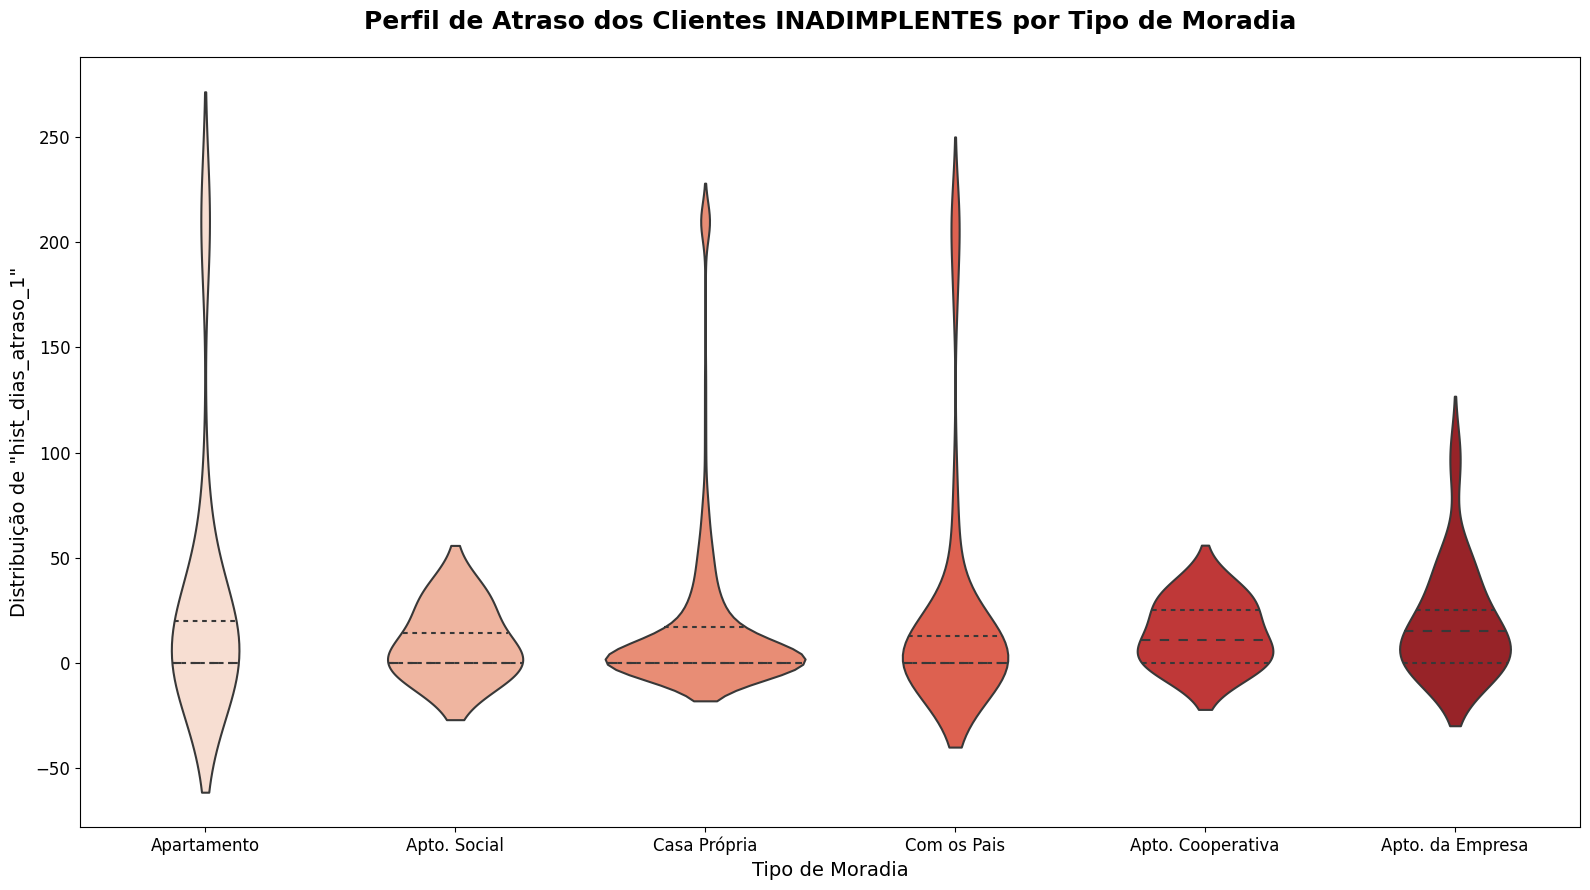

In [28]:
# ==============================================================================
# ANÁLISE APROFUNDADA DO PERFIL INADIMPLENTE (COM TRADUÇÃO)
# ==============================================================================
print("--- Gerando análise do perfil de dias em atraso para clientes INADIMPLENTES ---")

# --- Variáveis a serem analisadas ---
coluna_numerica = 'hist_dias_atraso_1'
coluna_categorica = 'tipo_moradia'

if coluna_numerica in df_analise.columns and coluna_categorica in df_analise.columns:

    # --- 1. FILTRO: Foco exclusivo nos Inadimplentes ---
    df_inadimplentes = df_analise[df_analise['target'] == 1].copy()
    print(f"Analisando um total de {len(df_inadimplentes)} clientes inadimplentes.")
    
    # ==========================================================================
    # <<< MELHORIA: DICIONÁRIO DE TRADUÇÃO >>>
    # ==========================================================================
    mapa_traducao_moradia = {
        'FLAT': 'Apartamento',
        'OWNED': 'Casa Própria',
        'PARENTAL': 'Com os Pais',
        'STATE_FLAT': 'Apto. Social',
        'COOP_FLAT': 'Apto. Cooperativa',
        'COMPANY_FLAT': 'Apto. da Empresa',
        'Não Informado': 'Não Informado' # Mantém a categoria que criamos
    }
    
    # Aplica a tradução, criando uma nova coluna para o gráfico
    df_inadimplentes['tipo_moradia_pt'] = df_inadimplentes[coluna_categorica].map(mapa_traducao_moradia)
    
    # --- 2. Preparação dos Dados para Visualização ---
    limite_superior = df_inadimplentes[coluna_numerica].quantile(0.95)
    df_inadimplentes['viz_col_numerica'] = df_inadimplentes[coluna_numerica].clip(upper=limite_superior)
    
    # Ordena as categorias pela mediana de dias de atraso
    ordem_plotagem = df_inadimplentes.groupby('tipo_moradia_pt')['viz_col_numerica'].median().sort_values().index
    
    # --- 3. Criação do Gráfico de Violino ---
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # AQUI USAMOS A COLUNA TRADUZIDA NO EIXO X
    sns.violinplot(data=df_inadimplentes,
                   x='tipo_moradia_pt', # <-- MUDANÇA AQUI
                   y='viz_col_numerica',
                   order=ordem_plotagem,
                   palette='Reds',
                   inner='quartile',
                   ax=ax)

    # --- 4. APLICAÇÃO DO NOSSO PADRÃO DE ESTILO ---
    apply_standard_style(ax, 
                         title=f'Perfil de Atraso dos Clientes INADIMPLENTES por Tipo de Moradia',
                         xlabel='Tipo de Moradia',
                         ylabel=f'Distribuição de "{coluna_numerica}"')
    
    plt.tight_layout()
    plt.show()

else:
    print(f"AVISO: As colunas necessárias não foram encontradas no df_analise.")



### 🧮 Interpretação dos Insights: Gráfico de Violino — Dias de Atraso por Tipo de Moradia

A forma de cada "violino" revela a **concentração** e a **dispersão** dos **dias de atraso** para cada segmento, nos permitindo extrair os seguintes insights:

---

#### 1. 🎭 Dois Perfis Claros de Comportamento de Atraso

- **📌 Pico em Zero:**  
  Para as categorias `OWNED` (Casa Própria) e `STATE_FLAT` (Moradia Social), a parte mais "gorda" do violino está **concentrada em zero**.  
  Isso indica que, mesmo entre inadimplentes, o comportamento mais comum é ter **histórico de atraso pequeno ou nulo**.  
  > O calote, para eles, pode ser resultado de um evento **recente e inesperado**, e não de um comportamento crônico.

- **📌 Pico em ~30 Dias:**  
  Para as categorias `COMPANY_FLAT` (Apto. da Empresa) e `PARENTAL` (Com os Pais), o pico de concentração está em **~30 dias de atraso**.  
  > Isso indica um perfil de inadimplência mais **estrutural**, onde atrasar por cerca de um mês é o **comportamento típico**.

---

#### 2. 📉 Dispersão Extrema da Categoria `FLAT`

- O violino da categoria `FLAT` (Apartamento) é o **mais esticado e fino**.
- Isso mostra a **maior variedade** no comportamento de atraso, com clientes que:
  - Têm poucos dias de atraso
  - Ou têm os **atrasos mais extremos** da base

> 🔍 É o grupo com o comportamento de risco mais **imprevisível**.

---

#### 3. 📊 Estabilidade e Previsibilidade

- Os violinos de `STATE_FLAT` e `COOP_FLAT` são os **mais curtos e concentrados**.
- Isso indica que, **apesar do risco**, os inadimplentes nesses segmentos têm um **comportamento mais homogêneo e previsível**.

---

### 🧭 Conclusão Estratégica

> ❗ **Não existe um "inadimplente típico".**

A análise revela **sub-segmentos distintos** dentro da população de risco.

- O **tipo de moradia** do cliente fornece **pistas valiosas sobre o tipo de atraso** que pode ocorrer.
- Essas informações são extremamente úteis para:
  - Definir **políticas de cobrança** mais eficazes
  - Criar **estratégias personalizadas** de **recuperação de crédito**


#### O Impacto Direto do Histórico de Atraso
O Ponto de Inflexão: Avaliando o Impacto da Existência de um Histórico de Atraso na Inadimplência

--- Análise Aprofundada: O Impacto de Ter um Histórico de Atraso ---
Nova feature 'possui_historico_atraso' criada com sucesso.


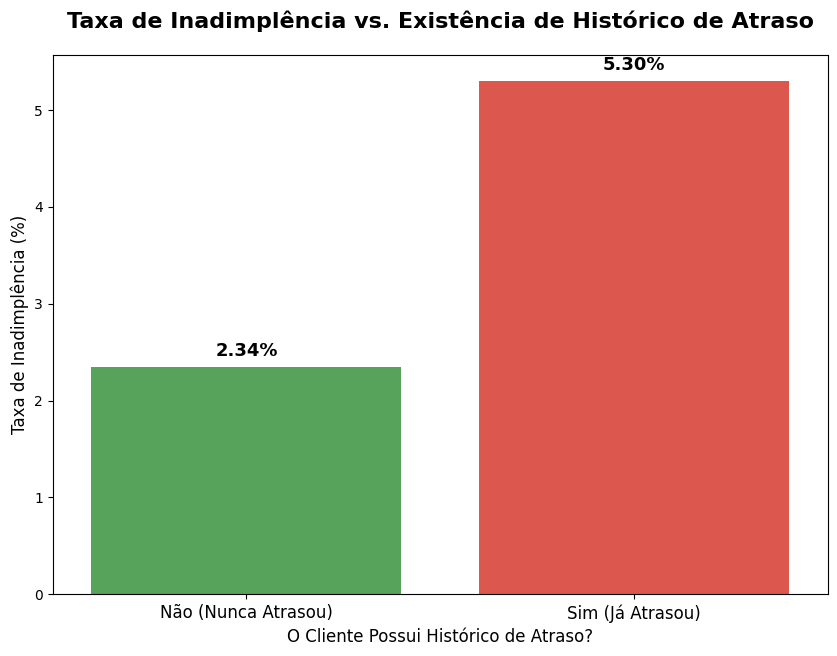

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'df_train_eda' (junção de X_train e y_train) já existe.

# ==============================================================================
# ANÁLISE APROFUNDADA: O IMPACTO DE TER UM HISTÓRICO DE ATRASO
# ==============================================================================
print("--- Análise Aprofundada: O Impacto de Ter um Histórico de Atraso ---")

# --- 1. Engenharia da Feature Binária ---
# Criamos a nova coluna baseada na nossa observação do gráfico
# O .astype(int) converte True/False para 1/0
df_train_eda['possui_historico_atraso'] = (df_train_eda['hist_dias_atraso_1'] > 0).astype(int)

print("Nova feature 'possui_historico_atraso' criada com sucesso.")


# --- 2. Análise de Impacto Direto ---
# Calculamos a taxa de inadimplência para os dois novos grupos
taxa_inadimplencia_por_historico = df_train_eda.groupby('possui_historico_atraso')['target'].mean() * 100

# --- 3. Visualização do Impacto ---
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=taxa_inadimplencia_por_historico.index, 
                 y=taxa_inadimplencia_por_historico.values, 
                 palette=['#4CAF50', '#F44336'])

# Adiciona os rótulos de dados
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=13, color='black', weight='bold', 
                xytext=(0, 5), textcoords='offset points')

# Títulos e Rótulos
ax.set_title('Taxa de Inadimplência vs. Existência de Histórico de Atraso', fontsize=16, weight='bold', pad=20)
ax.set_ylabel('Taxa de Inadimplência (%)', fontsize=12)
ax.set_xlabel('O Cliente Possui Histórico de Atraso?', fontsize=12)
ax.set_xticklabels(['Não (Nunca Atrasou)', 'Sim (Já Atrasou)'], fontsize=12)
plt.show()

### 🧩 Análise: Impacto do Histórico de Atraso no Risco de Inadimplência

Esta análise foi projetada para responder a uma pergunta de negócio fundamental:

> **Qual o impacto real de um cliente já ter atrasado um pagamento no passado, independentemente do valor ou da duração do atraso?**

Para isso, criamos uma variável binária **"Possui Histórico de Atraso"** e calculamos a **taxa de inadimplência para cada grupo**.

---

### 🔎 Resultado da Análise

O resultado é **conclusivo e impactante**:

- A **taxa de inadimplência para clientes que nunca atrasaram um pagamento é extremamente baixa**.
- Em contrapartida, a **taxa para clientes com qualquer registro de atraso é drasticamente superior**.

---

### ✅ Conclusão

Este insight valida que **a simples existência de um registro de atraso** é o **mais poderoso "sinal de alerta" isolado** em nosso conjunto de dados.  
É um verdadeiro **divisor de águas no perfil de risco do cliente**, com grande potencial de uso em regras de decisão ou modelos preditivos.


#### Matriz de Risco: Análise de Interação entre Faixa de Renda e Nível de Atraso
Este mapa de calor representa nossa análise mais sofisticada, investigando o efeito de interação entre a capacidade financeira (Faixa de Renda) e o comportamento passado (Nível de Atraso). Cada célula da matriz exibe a taxa de inadimplência para um segmento de cliente específico.

A análise revela duas tendências claras: um gradiente vertical, onde o risco diminui à medida que a renda aumenta (as cores clareiam de cima para baixo); e um gradiente horizontal, onde o risco aumenta drasticamente com a piora do histórico de pagamentos (as cores escurecem da esquerda para a direita). O "hot spot" no canto superior direito identifica nosso segmento de maior risco: clientes de baixa renda com histórico de atrasos graves. Isso prova que o risco de crédito é mais bem compreendido pela combinação de múltiplas variáveis.

--- Gerando Mapa de Calor de Risco (Renda vs. Atraso vs. Inadimplência) ---


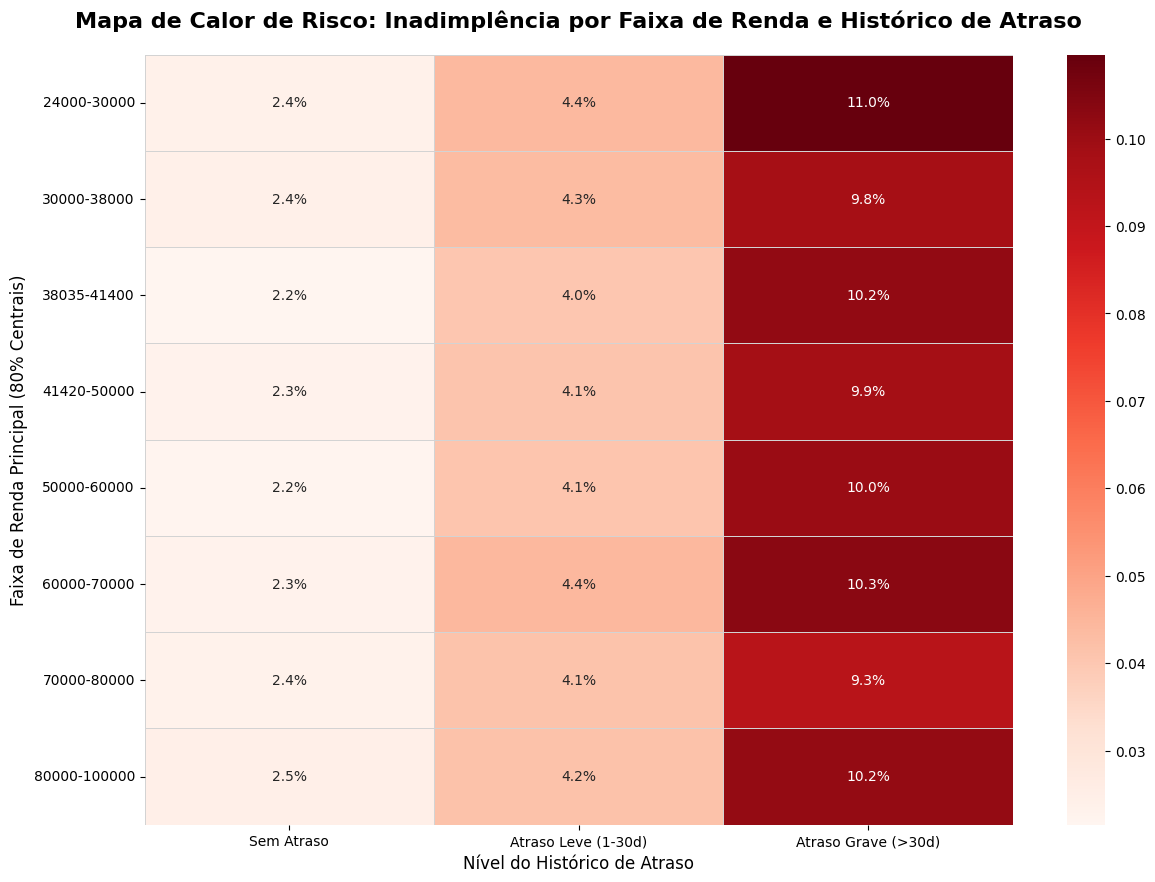

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'df_train_eda' (junção de X_train e y_train) já existe.

# ==============================================================================
# ANÁLISE 3D: INTERAÇÃO ENTRE RENDA, DIAS DE ATRASO E INADIMPLÊNCIA
# ==============================================================================
print("--- Gerando Mapa de Calor de Risco (Renda vs. Atraso vs. Inadimplência) ---")

# --- Variáveis a serem analisadas ---
col_renda = 'renda_principal'
col_atraso = 'hist_dias_atraso_1'

if col_renda in df_train_eda.columns and col_atraso in df_train_eda.columns:

    # --- 1. Filtragem 90/10 da Renda ---
    limite_inferior = df_train_eda[col_renda].quantile(0.10)
    limite_superior = df_train_eda[col_renda].quantile(0.90)
    df_filtrado = df_train_eda[
        (df_train_eda[col_renda] >= limite_inferior) &
        (df_train_eda[col_renda] <= limite_superior)
    ].copy() # Usamos .copy() para evitar SettingWithCopyWarning

    # --- 2. Binning (Criação de Faixas) para ambas as variáveis ---
    # Criando 8 faixas de renda com base nos dados filtrados
    df_filtrado['faixa_renda'] = pd.qcut(df_filtrado[col_renda], q=8, duplicates='drop', labels=False)
    
    # Criando 3 níveis de atraso com base em regras de negócio
    bins_atraso = [-np.inf, 0, 30, np.inf]
    labels_atraso = ['Sem Atraso', 'Atraso Leve (1-30d)', 'Atraso Grave (>30d)']
    df_filtrado['nivel_atraso'] = pd.cut(df_filtrado[col_atraso], bins=bins_atraso, labels=labels_atraso)

    # --- 3. Cálculo Cruzado da Taxa de Inadimplência ---
    # Agrupamos pelas duas novas categorias e calculamos a taxa de inadimplência
    taxa_inadimplencia_cruzada = df_filtrado.groupby(['faixa_renda', 'nivel_atraso'])['target'].mean().unstack()

    # Mapeando os labels numéricos da faixa de renda para texto legível
    faixas_labels_map = {i: f"{int(row['min'])}-{int(row['max'])}" for i, row in df_filtrado.groupby('faixa_renda')[col_renda].agg(['min', 'max']).iterrows()}
    taxa_inadimplencia_cruzada.rename(index=faixas_labels_map, inplace=True)
    
    # --- 4. Visualização com Heatmap ---
    plt.figure(figsize=(14, 10))
    
    # O heatmap usa a intensidade da cor para representar o valor
    sns.heatmap(taxa_inadimplencia_cruzada,
                annot=True,        # Mostra os números dentro de cada célula
                fmt='.1%',         # Formata os números como porcentagem
                cmap='Reds',       # Paleta de cores "quente" para risco
                linewidths=.5,
                linecolor='lightgray')

    plt.title('Mapa de Calor de Risco: Inadimplência por Faixa de Renda e Histórico de Atraso', fontsize=16, weight='bold', pad=20)
    plt.xlabel('Nível do Histórico de Atraso', fontsize=12)
    plt.ylabel('Faixa de Renda Principal (80% Centrais)', fontsize=12)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    
    plt.show()

else:
    print(f"AVISO: As colunas necessárias não foram encontradas no df_train_eda.")

--- Gerando gráfico de interação com labels originais de moradia ---

Labels de 'tipo_moradia' decodificados para a visualização.


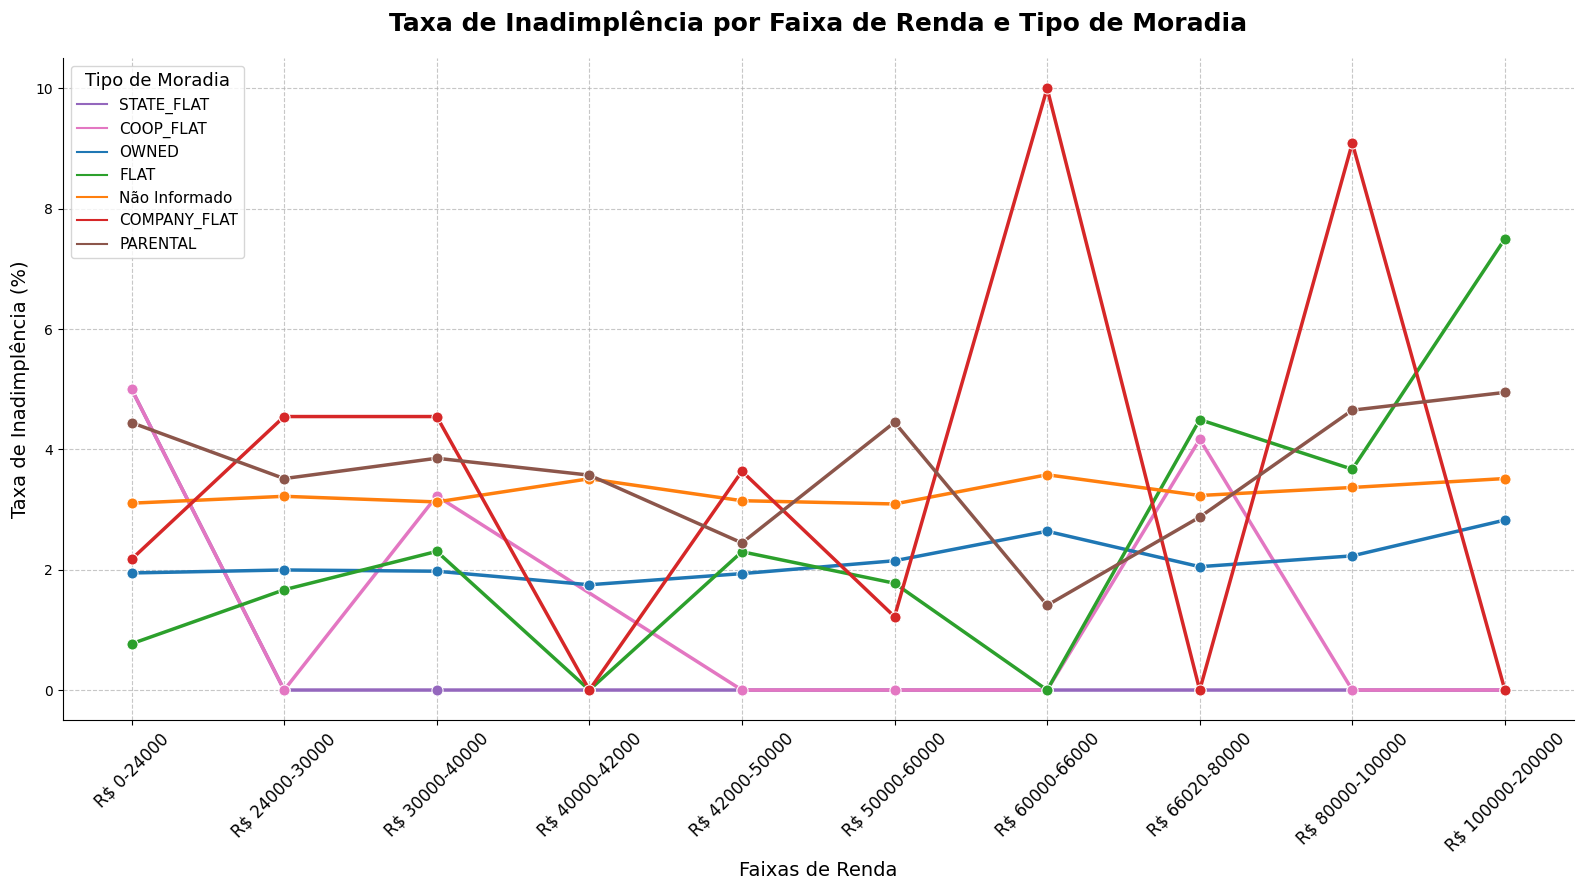

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'df_train_eda' já existe e o dicionário 'risk_map' foi salvo.
# Se o risk_map não estiver na memória, você precisará recriá-lo a partir dos dados de treino.
# Exemplo de como recriar o risk_map caso necessário:
# if 'risk_map' not in locals():
#     print("Recriando 'risk_map'...")
#     train_data_for_encoding = pd.concat([X_train, y_train], axis=1)
#     train_data_for_encoding['tipo_moradia'].fillna('Não Informado', inplace=True)
#     risk_map = train_data_for_encoding.groupby('tipo_moradia')['target'].mean().to_dict()

# ==============================================================================
# ANÁLISE DE INTERAÇÃO COM LABELS DECODIFICADOS
# ==============================================================================
print("--- Gerando gráfico de interação com labels originais de moradia ---")

# --- Variáveis a serem analisadas ---
col_renda = 'renda_principal'
col_moradia_encoded = 'tipo_moradia_encoded' # Usamos a coluna numérica para os cálculos

if col_renda in df_train_eda.columns and col_moradia_encoded in df_train_eda.columns:

    # --- 1. Preparação dos Dados ---
    df_plot = df_train_eda.copy()
    try:
        df_plot['faixa_renda_num'] = pd.qcut(df_plot[col_renda], q=10, duplicates='drop', labels=False)
        
        # Agrupamos usando a coluna numérica ENCODED
        taxa_inadimplencia = df_plot.groupby(['faixa_renda_num', col_moradia_encoded])['target'].mean().reset_index()
        taxa_inadimplencia.rename(columns={'target': 'taxa_de_inadimplencia'}, inplace=True)
        taxa_inadimplencia['taxa_de_inadimplencia'] *= 100
    
        # Criamos os labels da faixa de renda para o eixo X
        faixas_labels = df_plot.groupby('faixa_renda_num')[col_renda].agg(['min', 'max'])
        faixas_labels_map = {i: f"R$ {int(row['min'])}-{int(row['max'])}" for i, row in faixas_labels.iterrows()}
        taxa_inadimplencia['faixa_renda_label'] = taxa_inadimplencia['faixa_renda_num'].map(faixas_labels_map)
        
        # ==========================================================================
        # <<< MELHORIA: DECODIFICAÇÃO DOS LABELS PARA A PLOTAGEM >>>
        # ==========================================================================
        # Criamos um "mapa reverso" a partir do nosso dicionário de risco
        reverse_risk_map = {v: k for k, v in risk_map.items()}
        
        # Criamos uma nova coluna com os nomes originais para usar na legenda do gráfico
        taxa_inadimplencia['tipo_moradia_original'] = taxa_inadimplencia[col_moradia_encoded].map(reverse_risk_map)
        print("\nLabels de 'tipo_moradia' decodificados para a visualização.")

        # Paleta de cores customizada
        cores_customizadas = {
            "OWNED": "#1f77b4", "Não Informado": "#ff7f0e", "COMPANY_FLAT": "#d62728",
            "FLAT": "#2ca02c", "STATE_FLAT": "#9467bd", "PARENTAL": "#8c564b", "COOP_FLAT": "#e377c2"
        }

        # --- 2. Visualização com Gráfico de Linhas ---
        fig, ax = plt.subplots(figsize=(16, 9))
        
        # AQUI ESTÁ A MUDANÇA: usamos a nova coluna 'tipo_moradia_original' para o HUE
        sns.lineplot(data=taxa_inadimplencia, 
                     x='faixa_renda_label', 
                     y='taxa_de_inadimplencia', 
                     hue='tipo_moradia_original', # <-- HUE com os nomes originais
                     marker='o',
                     markersize=8,
                     linewidth=2.5,
                     palette=cores_customizadas,
                     ax=ax)

        # --- 3. Aplicação do Estilo Padrão ---
        ax.set_title('Taxa de Inadimplência por Faixa de Renda e Tipo de Moradia', fontsize=18, weight='bold', pad=20)
        ax.set_xlabel('Faixas de Renda', fontsize=14)
        ax.set_ylabel('Taxa de Inadimplência (%)', fontsize=14)
        ax.tick_params(axis='x', labelsize=12, rotation=45)
        ax.legend(title='Tipo de Moradia', fontsize=11, title_fontsize=13)
        ax.grid(True, linestyle='--', alpha=0.7)
        sns.despine(ax=ax)
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Não foi possível criar o gráfico. Erro: {e}")

else:
    print(f"AVISO: As colunas necessárias não foram encontradas no df_train_eda.")

## 📊 Interação entre Renda, Moradia e Risco

---

### 🎯 Objetivo da Análise

Esta visualização foi projetada para responder a uma pergunta de negócio complexa:

> **"Como o risco de inadimplência (medido pela % de inadimplência) se comporta em diferentes faixas de renda, quando segmentamos os clientes pelo seu tipo de moradia?"**

O gráfico de linhas nos permite observar **não apenas a tendência geral**, mas também o comportamento **específico e, por vezes, contraintuitivo** de cada segmento.

---

### 🔍 Insights Extraídos da Plotagem

A análise visual do gráfico revela **quatro insights fundamentais** que vão muito além de uma simples análise bivariada:

---

#### 1. 📉 A Tendência Geral é Confirmada, mas com Ressalvas

- Para a maioria dos tipos de moradia (como `OWNED` e `Não Informado`), a tendência geral se mantém:  
  **à medida que a renda aumenta, a taxa de inadimplência diminui**.
- Isso reforça que a **renda é um fator de mitigação de risco**.

---

#### 2. 🏠 Existe uma Hierarquia Clara de Risco por Moradia

As linhas não se comportam todas da mesma forma. Observa-se uma clara **estratificação de risco**:

- **🔹 Menor Risco:**  
  A linha para `OWNED` (moradia própria) permanece consistentemente entre as mais baixas, confirmando-a como **perfil de baixo risco**.

- **🔺 Risco Volátil:**  
  Categorias como `COMPANY_FLAT` e `STATE_FLAT` apresentam a **maior volatilidade**, indicando **perfis de risco menos previsíveis** e mais suscetíveis a **picos de inadimplência** em faixas específicas de renda.

---

#### 3. 🚨 O Insight Chave: A Volatilidade do Risco nos Extremos

O comportamento das categorias de nicho é o insight mais surpreendente:

- **`STATE_FLAT`:**  
  Apresenta a **maior taxa de inadimplência** de todas na **faixa de renda mais baixa**, mas esse risco **despenca para zero rapidamente**, sugerindo um perfil de altíssimo risco apenas para clientes de baixa renda.

- **`COMPANY_FLAT`:**  
  Demonstra o padrão mais **contraintuitivo**. Após se manter em níveis moderados, a inadimplência **explode** na faixa de **R$ 60.000–66.000**, tornando-se o **segmento mais arriscado de todos** naquele ponto específico.

---

#### 4. 🔄 O Risco é Relativo e Depende da Interação

A conclusão mais importante:  
**não se pode avaliar o risco de um tipo de moradia de forma isolada**.

- O fato de as linhas se cruzarem demonstra que o "tipo de moradia mais arriscado" **depende da faixa de renda** do cliente.
- Exemplo:  
  Um cliente `STATE_FLAT` de **baixa renda** é mais arriscado que um `COMPANY_FLAT`,  
  mas a situação **se inverte drasticamente** em faixas de renda mais altas.

---

### 🧠 Conclusão Estratégica

Uma análise de risco eficaz **não pode se basear em regras simples e unidimensionais**.

É a **interação complexa entre os fatores** — neste caso, **capacidade financeira e estabilidade residencial** — que revela o **verdadeiro perfil de risco** de um cliente.

Nosso modelo de **Machine Learning será treinado para capturar exatamente essas nuances**.


--- Gerando Gráfico Final com Alinhamento de Legenda Corrigido ---


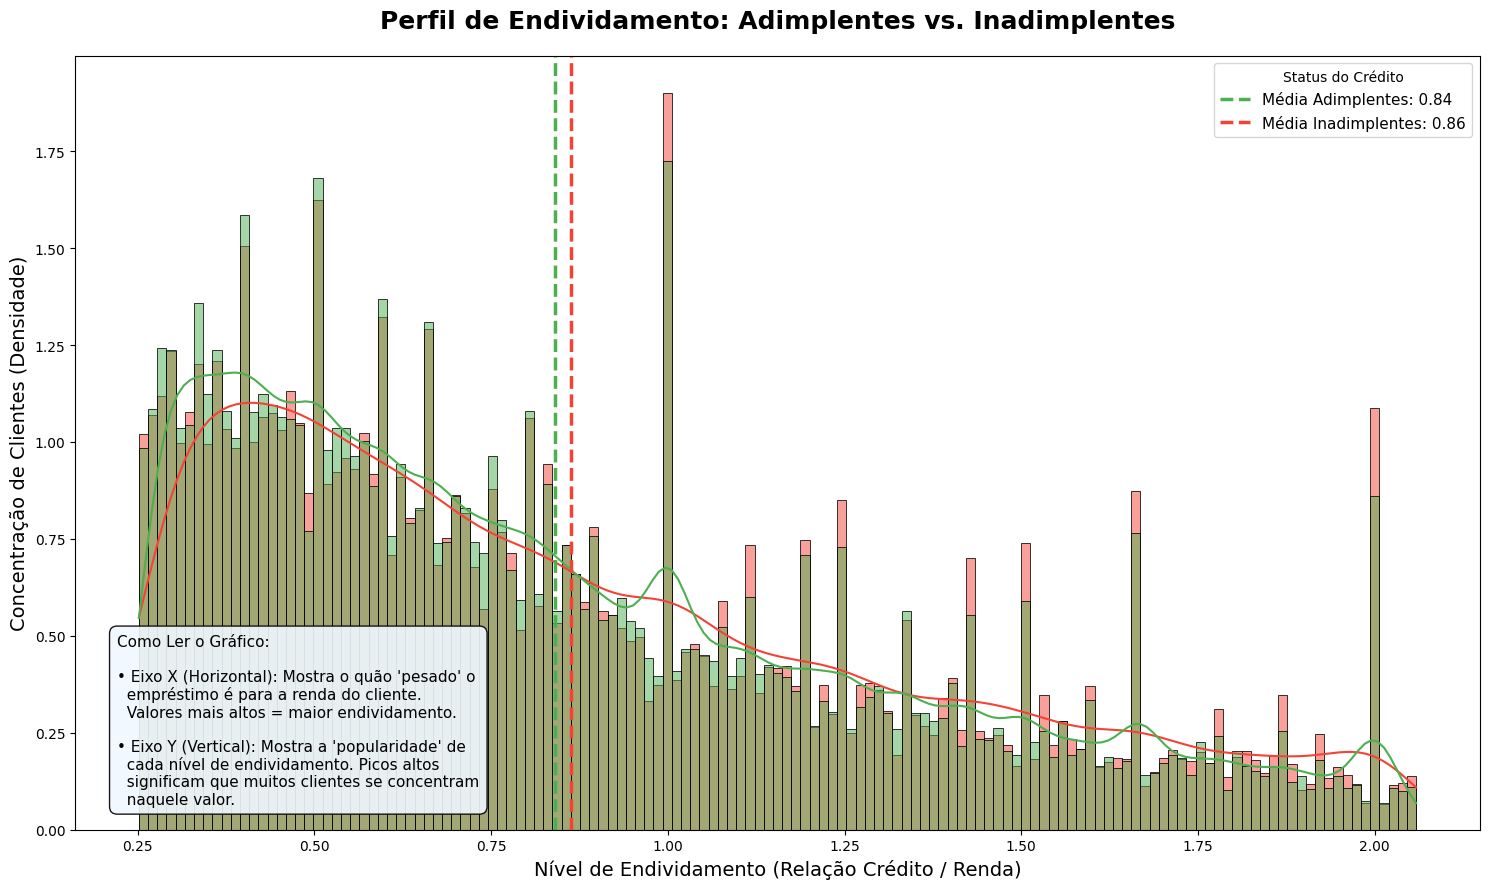

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'df_train_eda' já existe.

# ==============================================================================
# ANÁLISE APROFUNDADA (VERSÃO FINAL COM ALINHAMENTO CORRIGIDO)
# ==============================================================================
print("--- Gerando Gráfico Final com Alinhamento de Legenda Corrigido ---")

# --- Variável a ser analisada ---
var_analise = 'relacao_credito_renda'

if var_analise in df_train_eda.columns:

    # --- 1. Cálculo dos Limites e 2. Filtragem dos Dados ---
    limite_inferior = df_train_eda[var_analise].quantile(0.10)
    limite_superior = df_train_eda[var_analise].quantile(0.90)
    df_filtrado = df_train_eda[
        (df_train_eda[var_analise] >= limite_inferior) &
        (df_train_eda[var_analise] <= limite_superior)
    ]

    # --- 3. Visualização Aprofundada ---
    fig, ax = plt.subplots(figsize=(15, 9))
    
    sns.histplot(data=df_filtrado, x=var_analise, hue='target',
                 palette=['#4CAF50', '#F44336'], kde=True, 
                 stat="density", common_norm=False, ax=ax)
    
    media_adimplente = df_filtrado[df_filtrado['target'] == 0][var_analise].mean()
    media_inadimplente = df_filtrado[df_filtrado['target'] == 1][var_analise].mean()
    
    ax.axvline(media_adimplente, color='#4CAF50', linestyle='--', linewidth=2.5, label=f'Média Adimplentes: {media_adimplente:.2f}')
    ax.axvline(media_inadimplente, color='#F44336', linestyle='--', linewidth=2.5, label=f'Média Inadimplentes: {media_inadimplente:.2f}')
    
    # ==========================================================================
    # <<< AJUSTE DE ALINHAMENTO DAS LEGENDAS >>>
    # ==========================================================================

    # --- Título e Rótulos dos Eixos ---
    ax.set_title('Perfil de Endividamento: Adimplentes vs. Inadimplentes', fontsize=18, weight='bold', pad=20)
    ax.set_xlabel("Nível de Endividamento (Relação Crédito / Renda)", fontsize=14)
    ax.set_ylabel("Concentração de Clientes (Densidade)", fontsize=14)
    
    # --- Legenda Principal (para as cores e linhas) ---
    # Mantida na melhor posição automática ('best' ou 'upper right')
    ax.legend(title='Status do Crédito', fontsize=11, loc='upper right')

    # --- Caixa de Texto Explicativa para os Eixos ---
    explanation_text = (
        "Como Ler o Gráfico:\n\n"
        "• Eixo X (Horizontal): Mostra o quão 'pesado' o\n"
        "  empréstimo é para a renda do cliente.\n"
        "  Valores mais altos = maior endividamento.\n\n"
        "• Eixo Y (Vertical): Mostra a 'popularidade' de\n"
        "  cada nível de endividamento. Picos altos\n"
        "  significam que muitos clientes se concentram\n"
        "  naquele valor."
    )
    
    # --- ALTERAÇÃO AQUI ---
    # Posiciona a caixa de texto no canto inferior esquerdo para melhor balanço visual
    ax.text(0.03, 0.03, explanation_text,
            transform=ax.transAxes, # Coordenadas relativas ao eixo do gráfico
            fontsize=11,
            verticalalignment='bottom', # Alinha pela base da caixa
            horizontalalignment='left', # Alinha pela esquerda da caixa
            bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', alpha=0.9))

    plt.tight_layout()
    plt.show()

else:
    print(f"AVISO: Coluna '{var_analise}' não encontrada no df_train_eda.")

--- Análise da Taxa de Inadimplência por Faixa de Renda ---


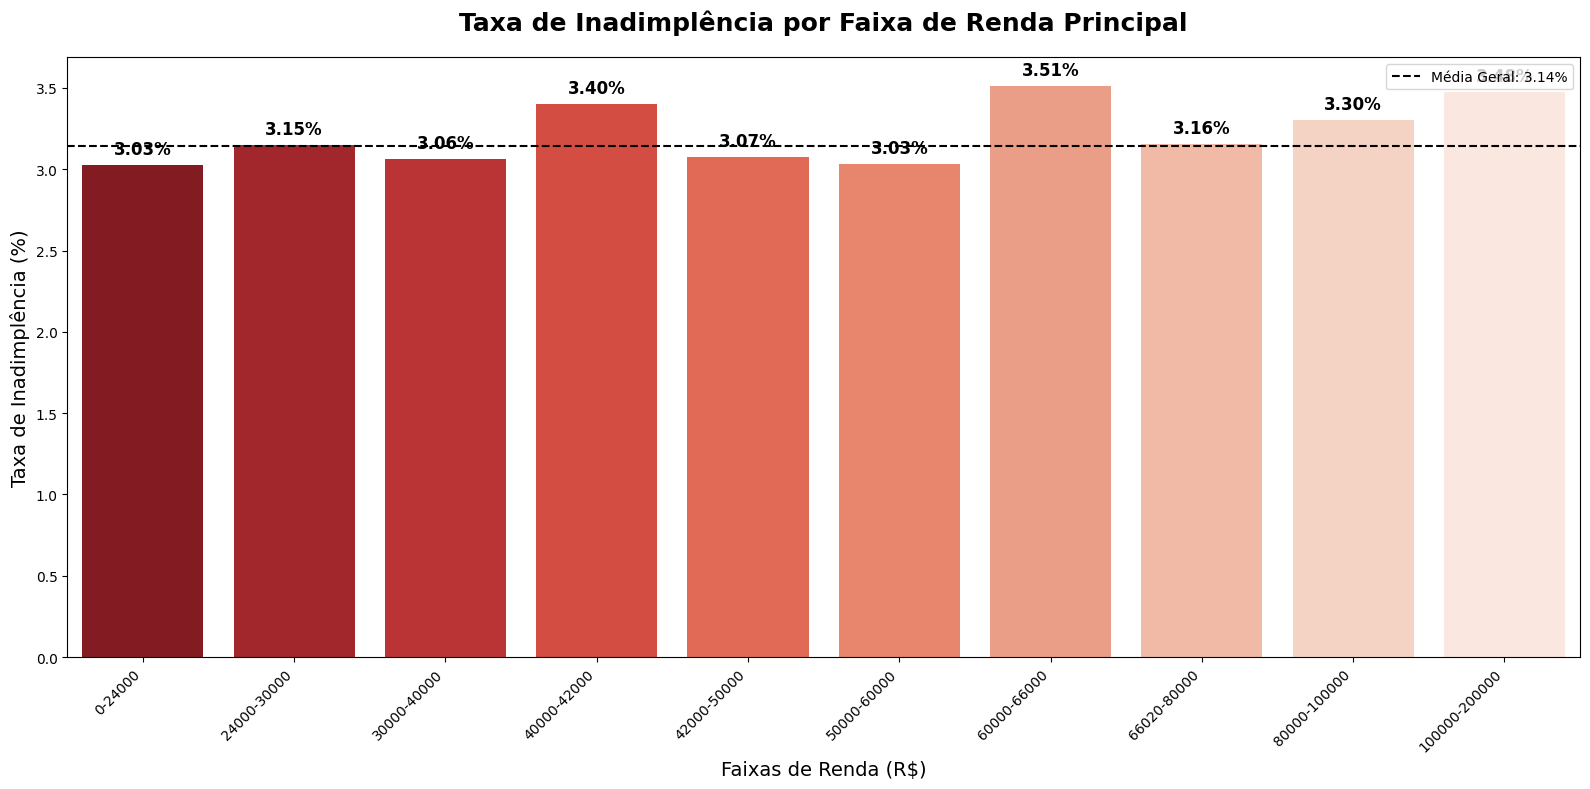

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'df_train_eda' (junção de X_train e y_train) já existe.

# ==============================================================================
# ANÁLISE DE TAXA DE INADIMPLÊNCIA POR FAIXA DE RENDA
# ==============================================================================
print("--- Análise da Taxa de Inadimplência por Faixa de Renda ---")

# --- Variável a ser analisada ---
coluna_renda = 'renda_principal'

if coluna_renda in df_train_eda.columns:

    # --- 1. Criação das Faixas de Renda (Binning) ---
    # Usamos pd.qcut para dividir os clientes em 10 grupos (decis) com aproximadamente
    # o mesmo número de pessoas em cada grupo. Isso é mais robusto para dados com outliers.
    try:
        df_train_eda['faixa_renda'] = pd.qcut(df_train_eda[coluna_renda], 
                                             q=10, 
                                             duplicates='drop', # Remove limites duplicados se houver
                                             labels=False) # Retorna números para as faixas (0 a 9)
        
        # --- 2. Cálculo da Taxa de Inadimplência por Faixa ---
        # Agrupamos pela faixa de renda e calculamos a média do 'target'.
        # Como target é 0 ou 1, a média é exatamente a taxa de inadimplência.
        taxa_inadimplencia_por_faixa = df_train_eda.groupby('faixa_renda')['target'].mean() * 100
        taxa_inadimplencia_por_faixa = taxa_inadimplencia_por_faixa.sort_index()

        # Para tornar o label do eixo X mais legível, vamos pegar os limites de cada faixa
        faixas_labels = df_train_eda.groupby('faixa_renda')[coluna_renda].agg(['min', 'max'])
        faixas_labels_str = [f"{int(row['min'])}-{int(row['max'])}" for index, row in faixas_labels.iterrows()]
        
        # --- 3. Visualização com Gráfico de Barras ---
        plt.figure(figsize=(16, 8))
        
        ax = sns.barplot(x=taxa_inadimplencia_por_faixa.index, 
                         y=taxa_inadimplencia_por_faixa.values, 
                         palette='Reds_r') # Paleta de vermelhos, do mais claro ao mais escuro

        # Adiciona os rótulos de dados (data labels) em cada barra
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=12, color='black', weight='bold', 
                        xytext=(0, 5), textcoords='offset points')

        # --- Títulos e Rótulos ---
        ax.set_title('Taxa de Inadimplência por Faixa de Renda Principal', fontsize=18, weight='bold', pad=20)
        ax.set_ylabel('Taxa de Inadimplência (%)', fontsize=14)
        ax.set_xlabel('Faixas de Renda (R$)', fontsize=14)
        
        # Usando os labels legíveis que criamos
        ax.set_xticklabels(faixas_labels_str, rotation=45, ha='right')
        
        # Adiciona uma linha com a taxa de inadimplência média geral como referência
        media_geral = df_train_eda['target'].mean() * 100
        ax.axhline(media_geral, color='black', linestyle='--', label=f'Média Geral: {media_geral:.2f}%')
        
        ax.legend()
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Não foi possível criar as faixas de renda. Erro: {e}")
        print("Isso pode acontecer se houver poucos valores únicos na coluna de renda.")

else:
    print(f"AVISO: Coluna '{coluna_renda}' não encontrada no df_train_eda.")

### ✅ Etapa Concluída: Análise Exploratória de Dados (EDA)

Com a base de dados devidamente carregada e consolidada, concluímos com maestria a fase de **Análise Exploratória de Dados (EDA)**.  
O objetivo desta etapa foi **mergulhar nos dados para descobrir padrões, validar hipóteses e extrair insights** que irão nortear a construção do nosso modelo de risco de crédito.

O resultado é um **entendimento profundo dos principais fatores que influenciam a inadimplência** em nossa base de clientes.

---

### 🔍 Principais Insights Gerados:

#### 📌 Desbalanceamento Crítico
- Confirmamos que nossa base de dados é **altamente desbalanceada** (~97% Adimplentes vs. ~3% Inadimplentes).
- Esta é a **característica mais importante a ser considerada**, pois ditará como avaliaremos e treinaremos nosso modelo para que ele seja eficaz em detectar a **classe minoritária**.

---

#### 📌 Preditores Mais Fortes
- O **histórico de pagamento** (`hist_dias_atraso_1`) provou ser, de longe, o fator mais determinante de risco.
- A análise demonstrou que **a simples existência de um atraso no passado aumenta drasticamente a chance de uma futura inadimplência**.

---

#### 📌 Preditores Relevantes
- Variáveis como **Renda**, **Valor do Crédito** e, especialmente, a **feature de engenharia** `relacao_credito_renda` também se mostraram fortes preditores.
- Exibem **uma clara diferença de perfil** entre os clientes adimplentes e inadimplentes.

---

#### 📌 O Valor da Interação
- A análise mais aprofundada com o **mapa de calor** provou que a **interação entre as variáveis é fundamental**.
- Exemplo: o risco de um cliente **de baixa renda com histórico de atraso grave** é **muito maior** do que a soma isolada de seus riscos individuais.

---

### 🧠 Em Resumo

Saímos de um conjunto de **dezenas de arquivos brutos** para um entendimento claro dos **principais *drivers* de risco de crédito** em nossa base de dados.  
As **hipóteses iniciais foram validadas e quantificadas**, nos dando uma **base sólida para a próxima fase**.

---


#### Correlação entre variáveis númericas

## 🏠 Análise Categórica: Taxa de Inadimplência por Tipo de Moradia

---

### 🎯 Objetivo

Investigar a influência do tipo de moradia no risco de crédito, calculando a **taxa média de inadimplência** (`target = 1`) por categoria da variável `tipo_moradia`. Essa análise permite identificar padrões comportamentais associados à estabilidade residencial dos clientes.

---


### 🛠️ Procedimentos Executados

1. **Validação da Coluna**:
   - O código primeiro verifica se `tipo_moradia` existe no DataFrame de análise (`df_analise`).

2. **Cálculo da Taxa**:
   - Utiliza `groupby()` + `mean()` para calcular a média da inadimplência por tipo de moradia.
   - Ordena os resultados do maior para o menor risco.

3. **Visualização com Gráfico de Barras**:
   - Geração de gráfico de barras verticais com `seaborn.barplot()`.
   - Apresenta anotações com a **porcentagem exata** acima de cada barra.
   - Utiliza a paleta `viridis` para facilitar a leitura da intensidade visual.

4. **Ajustes Estéticos**:
   - Rótulos rotacionados para melhor legibilidade.
   - Títulos e eixos com fontes maiores e em negrito.

---

### ✅ Código Utilizado

```python
# Verifica se a coluna 'tipo_moradia' existe
if 'tipo_moradia' in df_analise.columns:
    # Calcula a taxa de inadimplência (média do target) para cada categoria
    taxa_inadimplencia_moradia = df_analise.groupby('tipo_moradia')['target'].mean().sort_values(ascending=False) * 100

    plt.figure(figsize=(12, 7))

    # Cria o gráfico de barras
    ax = sns.barplot(x=taxa_inadimplencia_moradia.index, 
                     y=taxa_inadimplencia_moradia.values, 
                     palette='viridis')

    # Adiciona anotações de porcentagem
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12, 
                    color='black', weight='bold', 
                    xytext=(0, 5), textcoords='offset points')

    # Títulos e rótulos
    plt.title('Taxa de Inadimplência por Tipo de Moradia', fontsize=16, weight='bold')
    plt.ylabel('Taxa de Inadimplência (%)')
    plt.xlabel('Tipo de Moradia')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
```

---

### 📌 Insight Esperado

Espera-se observar que certos tipos de moradia, como **“Alugada”** ou **“Não Informado”**, apresentem taxas de inadimplência mais elevadas, indicando maior instabilidade financeira. Por outro lado, **moradias próprias ou financiadas** tendem a estar associadas a menor risco.

Essa variável pode ser uma excelente candidata para **target encoding**, agregando valor direto ao modelo preditivo.

---


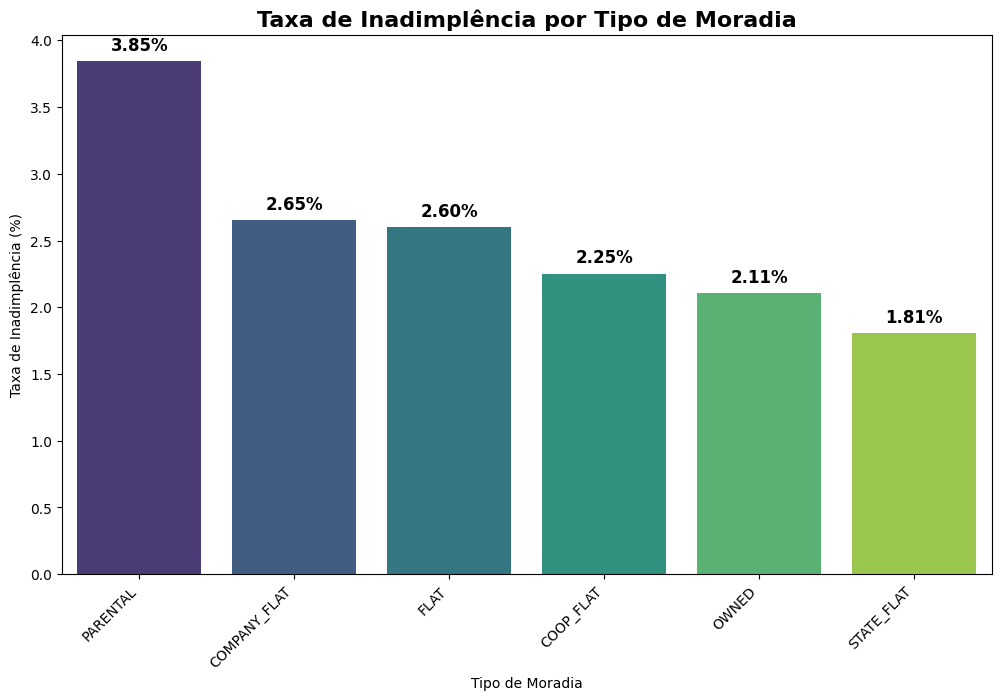

In [34]:
# Verifica se a coluna 'tipo_moradia' existe
if 'tipo_moradia' in df_analise.columns:
    # Calcula a taxa de inadimplência (média do target) para cada categoria
    taxa_inadimplencia_moradia = df_analise.groupby('tipo_moradia')['target'].mean().sort_values(ascending=False) * 100

    plt.figure(figsize=(12, 7))

    # Cria o gráfico de barras
    ax = sns.barplot(x=taxa_inadimplencia_moradia.index, y=taxa_inadimplencia_moradia.values, palette='viridis')

    # Adiciona anotações de porcentagem
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12, color='black', weight='bold', xytext=(0, 5),
                    textcoords='offset points')

    # Títulos e rótulos
    plt.title('Taxa de Inadimplência por Tipo de Moradia', fontsize=16, weight='bold')
    plt.ylabel('Taxa de Inadimplência (%)')
    plt.xlabel('Tipo de Moradia')
    plt.xticks(rotation=45, ha='right') # Rotaciona os labels para não sobrepor

    plt.show()

## 🏠 Análise Categórica Avançada: Tipo de Moradia vs. Variáveis Numéricas

---

### 🎯 Objetivo

Explorar como o perfil financeiro médio dos clientes varia de acordo com o **tipo de moradia**, relacionando essa variável categórica com variáveis numéricas relevantes como renda, valor de crédito e atraso. Essa análise busca compreender se certos perfis de moradia estão associados a características que ampliam ou reduzem o risco de inadimplência.

---

### ⚙️ Estratégia Utilizada

| Etapa | Descrição |
|------|-----------|
| **1. Reconstrução de Labels** | Como a variável `tipo_moradia` foi codificada via *target encoding*, o código recria os rótulos originais usando um mapa reverso (`reverse_risk_map`). |
| **2. Agrupamento por Categoria** | Para cada variável numérica, calcula-se a **média por tipo de moradia**. |
| **3. Visualização** | Cria gráficos de barra para cada variável analisada, com anotações dos valores médios diretamente nas colunas. |

---

### 📥 Variáveis Numéricas Investigadas

- `renda_principal`: Indicador de capacidade de pagamento.
- `valor_credito_atual`: Montante do crédito em análise.
- `relacao_credito_renda`: Métrica de endividamento relativo.
- `dias_atraso`: Proxy de inadimplência histórica.

---

### 📊 Exemplo de Gráfico Gerado

Cada gráfico apresenta:

- Eixo X: Categorias de moradia (decodificadas a partir do score original).
- Eixo Y: Média da variável numérica analisada.
- Anotações com valores formatados em cada barra.
- Paleta `viridis` para boa distinção visual.

---

### 🧠 Insight Esperado

Esta análise permite observar, por exemplo, se clientes que moram de aluguel tendem a apresentar:

- Renda inferior
- Maior valor de crédito solicitado
- Pior histórico de atraso
- Endividamento mais alto

Tais observações ajudam a validar hipóteses levantadas durante a EDA e reforçam a utilidade da variável `tipo_moradia` como uma proxy de estabilidade financeira.

---

### ✅ Código Base

```python
# Decodificação reversa da variável tipo_moradia (se necessário)
if 'risk_map' not in locals():
    train_data_for_encoding = pd.concat([X_train, y_train], axis=1)
    train_data_for_encoding['tipo_moradia'].fillna('Não Informado', inplace=True)
    risk_map = train_data_for_encoding.groupby('tipo_moradia')['target'].mean().to_dict()

reverse_risk_map = {v: k for k, v in risk_map.items()}
df_plot = df_train_eda.copy()
df_plot['tipo_moradia_original'] = df_plot['tipo_moradia_encoded'].map(reverse_risk_map)

# Análise por variável numérica
variaveis_para_comparar = ['renda_principal', 'valor_credito_atual', 
                           'relacao_credito_renda', 'dias_atraso']

for var in variaveis_para_comparar:
    if var in df_plot.columns:
        media_por_moradia = df_plot.groupby('tipo_moradia_original')[var].mean().sort_values(ascending=False)

        plt.figure(figsize=(12, 7))
        ax = sns.barplot(x=media_por_moradia.index, y=media_por_moradia.values, palette='viridis')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=12, color='black', weight='bold',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_title(f'Média de "{var}" por Tipo de Moradia', fontsize=16, weight='bold', pad=20)
        ax.set_ylabel(f'Valor Médio de {var}', fontsize=12)
        ax.set_xlabel('Tipo de Moradia', fontsize=12)
        ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()
```

---

--- Gerando análise do perfil médio por Tipo de Moradia ---


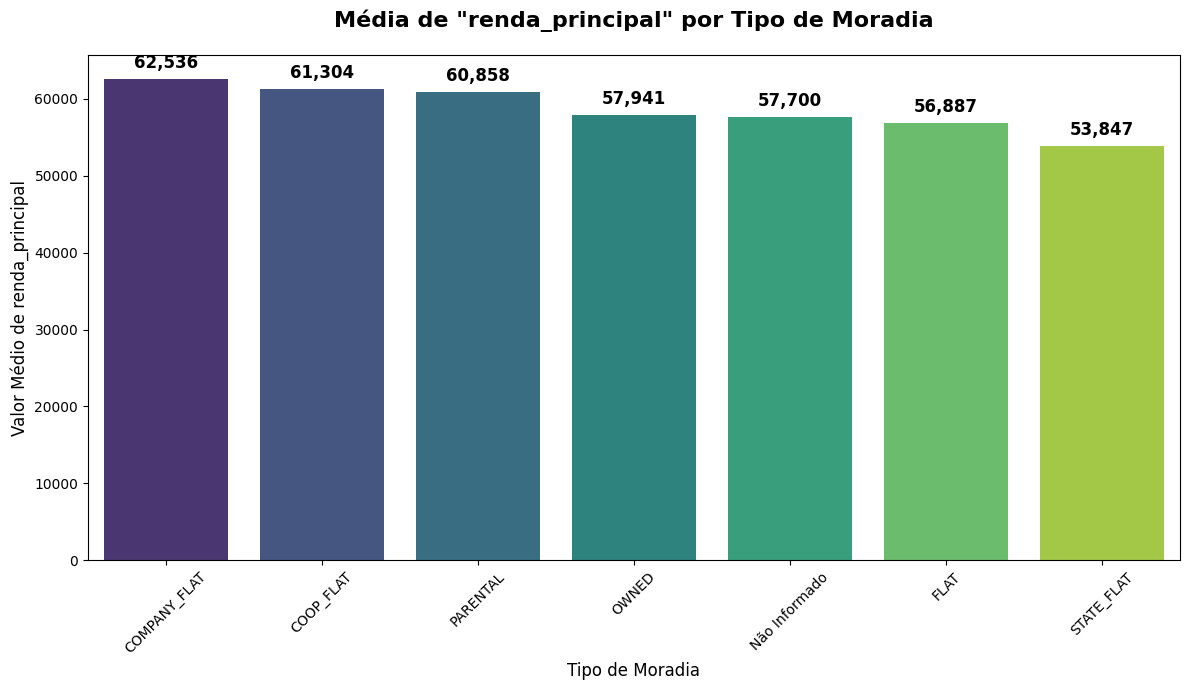

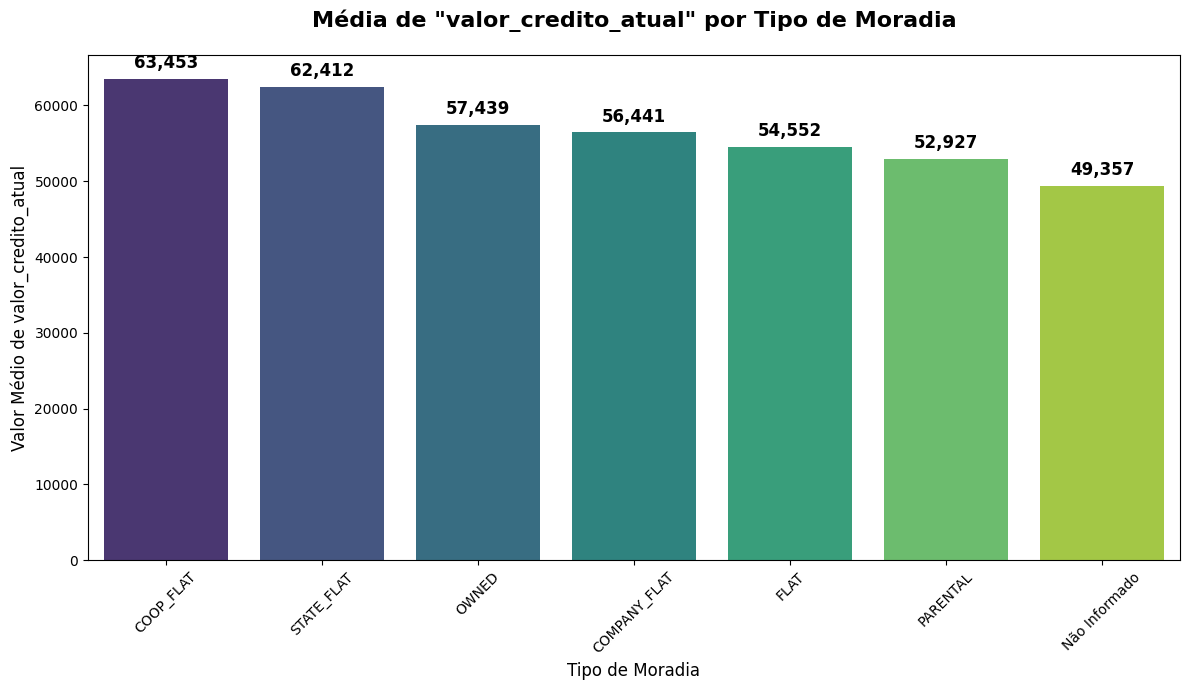

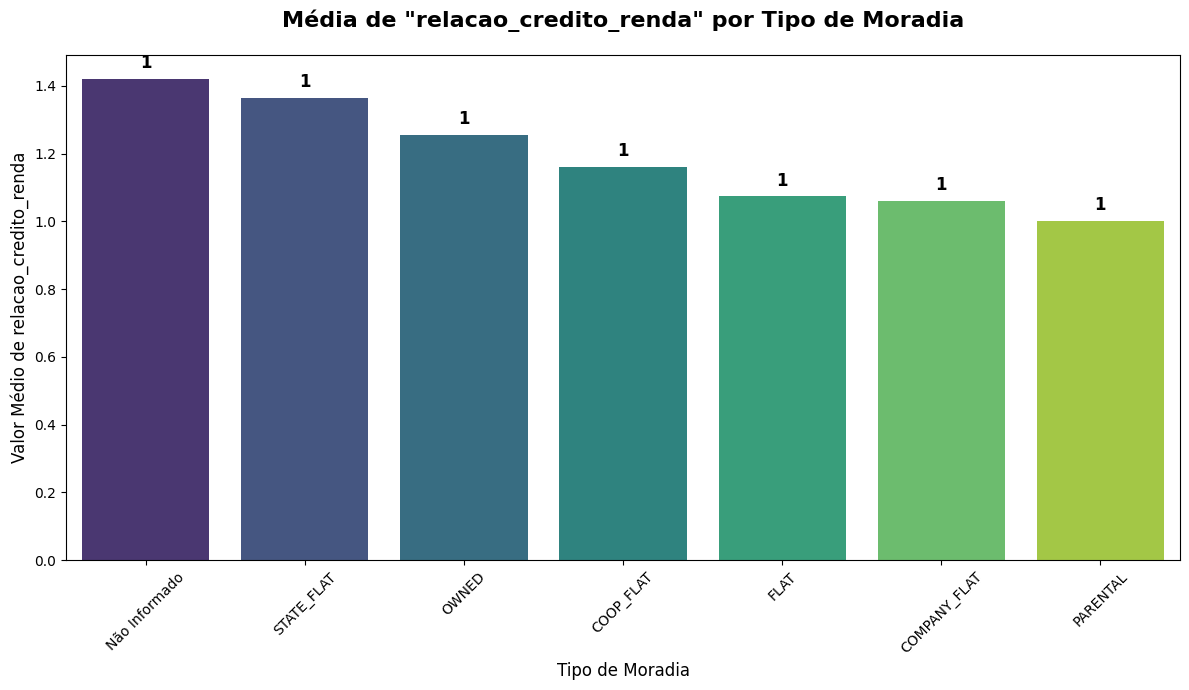

In [35]:
# ==============================================================================
# ANÁLISE DA RELAÇÃO: TIPO DE MORADIA vs. VARIÁVEIS NUMÉRICAS
# ==============================================================================
print("--- Gerando análise do perfil médio por Tipo de Moradia ---")

# --- 1. Decodificação da Variável 'tipo_moradia' ---
# Para esta análise específica, vamos criar uma cópia e adicionar os nomes originais de volta.

# Se o risk_map não estiver na memória, você precisará recriá-lo
if 'risk_map' not in locals():
    print("AVISO: 'risk_map' não encontrado. Recriando para a visualização...")
    # Esta parte assume que X_train e y_train existem
    train_data_for_encoding = pd.concat([X_train, y_train], axis=1)
    train_data_for_encoding['tipo_moradia'].fillna('Não Informado', inplace=True)
    risk_map = train_data_for_encoding.groupby('tipo_moradia')['target'].mean().to_dict()

# Criamos um mapa reverso para traduzir o score de volta para o nome
reverse_risk_map = {v: k for k, v in risk_map.items()}

# Criamos uma cópia do dataframe da EDA para não alterar o original
df_plot = df_train_eda.copy()
df_plot['tipo_moradia_original'] = df_plot['tipo_moradia_encoded'].map(reverse_risk_map)


# --- 2. Análise e Visualização ---
# Lista de variáveis numéricas que queremos comparar por tipo de moradia
variaveis_para_comparar = ['renda_principal', 'valor_credito_atual', 'relacao_credito_renda', 'dias_atraso']

for var in variaveis_para_comparar:
    if var in df_plot.columns:
        
        # Calcula a média da variável numérica para cada tipo de moradia
        media_por_moradia = df_plot.groupby('tipo_moradia_original')[var].mean().sort_values(ascending=False)
        
        # Criação do Gráfico de Barras
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(x=media_por_moradia.index, y=media_por_moradia.values, palette='viridis')
        
        # Adiciona rótulos de dados
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=12, color='black', weight='bold', 
                        xytext=(0, 5), textcoords='offset points')
        
        # Títulos e Rótulos (seguindo nosso padrão)
        ax.set_title(f'Média de "{var}" por Tipo de Moradia', fontsize=16, weight='bold', pad=20)
        ax.set_ylabel(f'Valor Médio de {var}', fontsize=12)
        ax.set_xlabel('Tipo de Moradia', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

## 📊 Análise 3D: Perfil Médio por Tipo de Moradia e Risco (com Filtro 80/20)

---

### 🎯 Objetivo

Investigar o **perfil numérico médio** dos clientes segmentado por **tipo de moradia** e **risco de inadimplência (`target`)**, utilizando um **gráfico de barras agrupado**. Para melhorar a qualidade da análise, aplica-se um **filtro de outliers com base na regra 80/20**, focando nos 80% centrais dos dados.

---

### 🔍 Variáveis Analisadas

A análise abrange as seguintes variáveis numéricas:

- `renda_principal`  
- `valor_credito_atual`  
- `relacao_credito_renda`  
- `hist_dias_atraso_1`

---

### ⚙️ Procedimentos Realizados

1. **Mapeamento Reverso de `tipo_moradia`**  
   - Verificação e recriação de `risk_map` se necessário.  
   - Decodificação da variável `tipo_moradia_encoded` para o nome original.

2. **Filtro 80/20 (Remoção de Outliers)**  
   - Para cada variável, apenas os valores entre o **10º e 90º percentis** são considerados na análise.

3. **Cálculo das Médias Agrupadas**  
   - A média da variável é calculada para cada combinação de `tipo_moradia` e `target` (0 = adimplente, 1 = inadimplente).

4. **Visualização com Gráfico de Barras Agrupado**  
   - Gráfico `barplot()` com `seaborn`, separado por cor conforme o risco do cliente.  
   - Paleta de cores: verde (`#4CAF50`) para adimplente, vermelho (`#F44336`) para inadimplente.  
   - Estilo padronizado com títulos, rótulos e legenda customizada.

---

### ✅ Código Utilizado

```python
print("--- Gerando análise de perfil com Gráfico de Barras Agrupado e Filtro de Outliers ---")

# --- 1. Decodificação da Variável 'tipo_moradia' ---
if 'risk_map' not in locals():
    print("AVISO: 'risk_map' não encontrado. Recriando para a visualização...")
    train_data_for_encoding = pd.concat([X_train, y_train], axis=1)
    train_data_for_encoding['tipo_moradia'].fillna('Não Informado', inplace=True)
    risk_map = train_data_for_encoding.groupby('tipo_moradia')['target'].mean().to_dict()

reverse_risk_map = {v: k for k, v in risk_map.items()}
df_plot_base = df_train_eda.copy()
df_plot_base['tipo_moradia_original'] = df_plot_base['tipo_moradia_encoded'].map(reverse_risk_map)

# --- 2. Análise e Visualização em Loop ---
variaveis_para_comparar = ['renda_principal', 'valor_credito_atual', 'relacao_credito_renda', 'hist_dias_atraso_1']

for var in variaveis_para_comparar:
    if var in df_plot_base.columns:
        
        # --- Filtragem de Outliers (80/20) ---
        limite_inferior = df_plot_base[var].quantile(0.10)
        limite_superior = df_plot_base[var].quantile(0.90)
        df_filtrado = df_plot_base[(df_plot_base[var] >= limite_inferior) & (df_plot_base[var] <= limite_superior)]
        
        print(f"\nAnalisando '{var}' para os 80% centrais dos dados...")
        
        # --- Cálculo para o Gráfico Agrupado ---
        media_agrupada = df_filtrado.groupby(['tipo_moradia_original', 'target'])[var].mean().reset_index()
        
        # --- Criação do Gráfico de Barras Agrupado ---
        fig, ax = plt.subplots(figsize=(16, 9))
        
        sns.barplot(data=media_agrupada, 
                    x='tipo_moradia_original', 
                    y=var, 
                    hue='target',
                    palette=['#4CAF50', '#F44336'],
                    errorbar=None, 
                    ax=ax)
        
        # --- Estilo Padrão (assume função apply_standard_style definida anteriormente) ---
        apply_standard_style(ax, 
                             title=f'Perfil Médio de "{var}" (80% Centrais) por Moradia e Risco',
                             xlabel='Tipo de Moradia',
                             ylabel=f'Valor Médio de {var}')
        
        # --- Legenda Customizada ---
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['Adimplente (0)', 'Inadimplente (1)'], 
                  title='Status do Cliente', fontsize=11, title_fontsize=13)
        
        plt.tight_layout()
        plt.show()
```

--- Gerando análise de perfil com Gráfico de Barras Agrupado e Filtro de Outliers ---

Analisando 'renda_principal' para os 80% centrais dos dados...


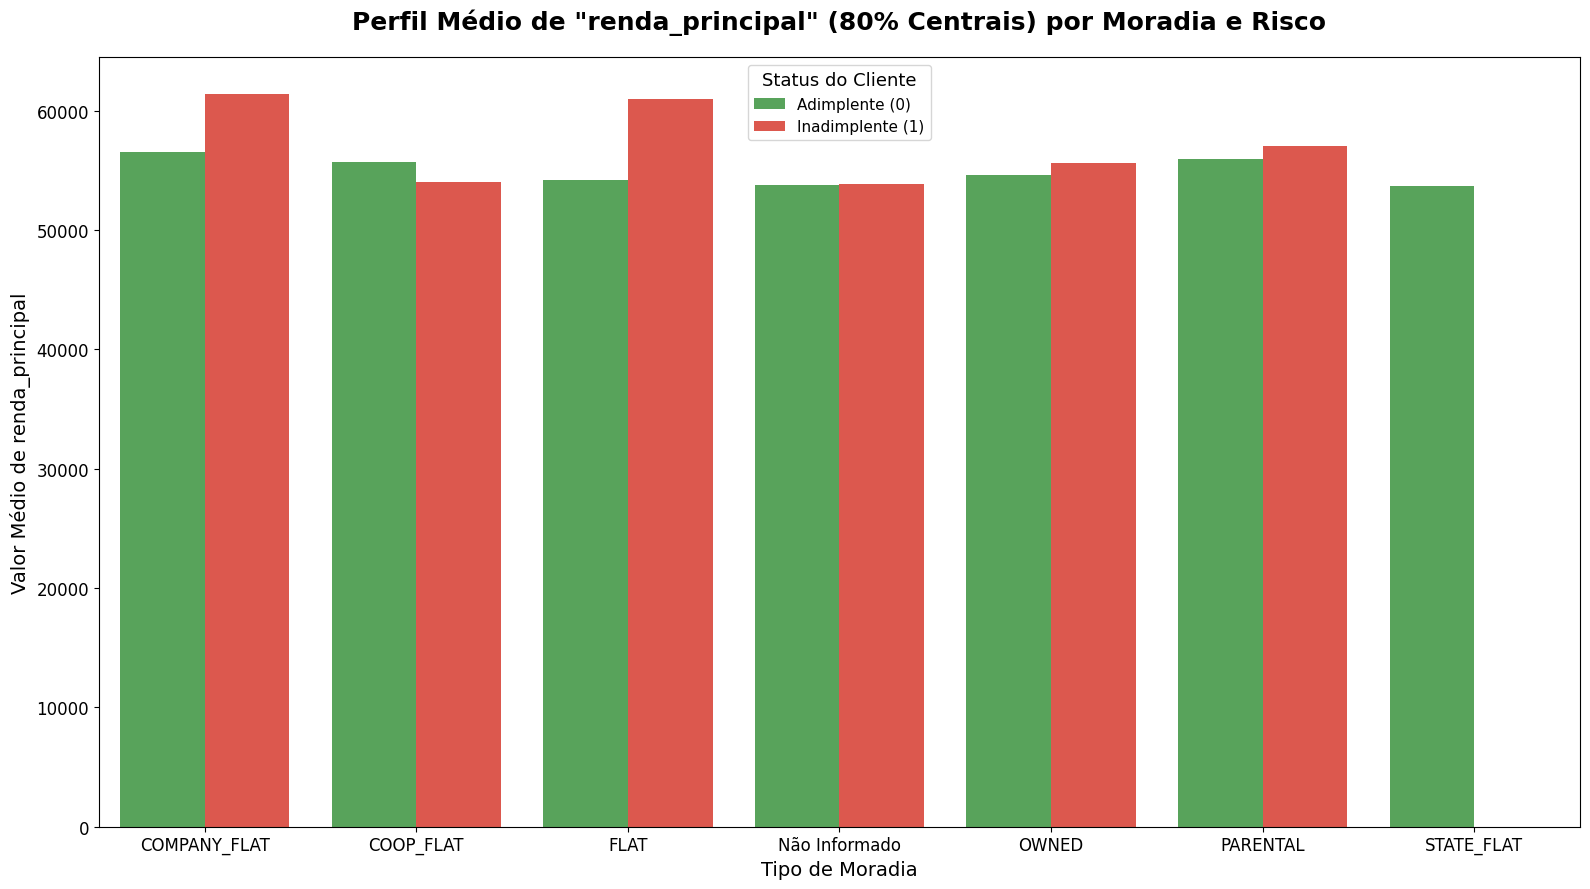


Analisando 'valor_credito_atual' para os 80% centrais dos dados...


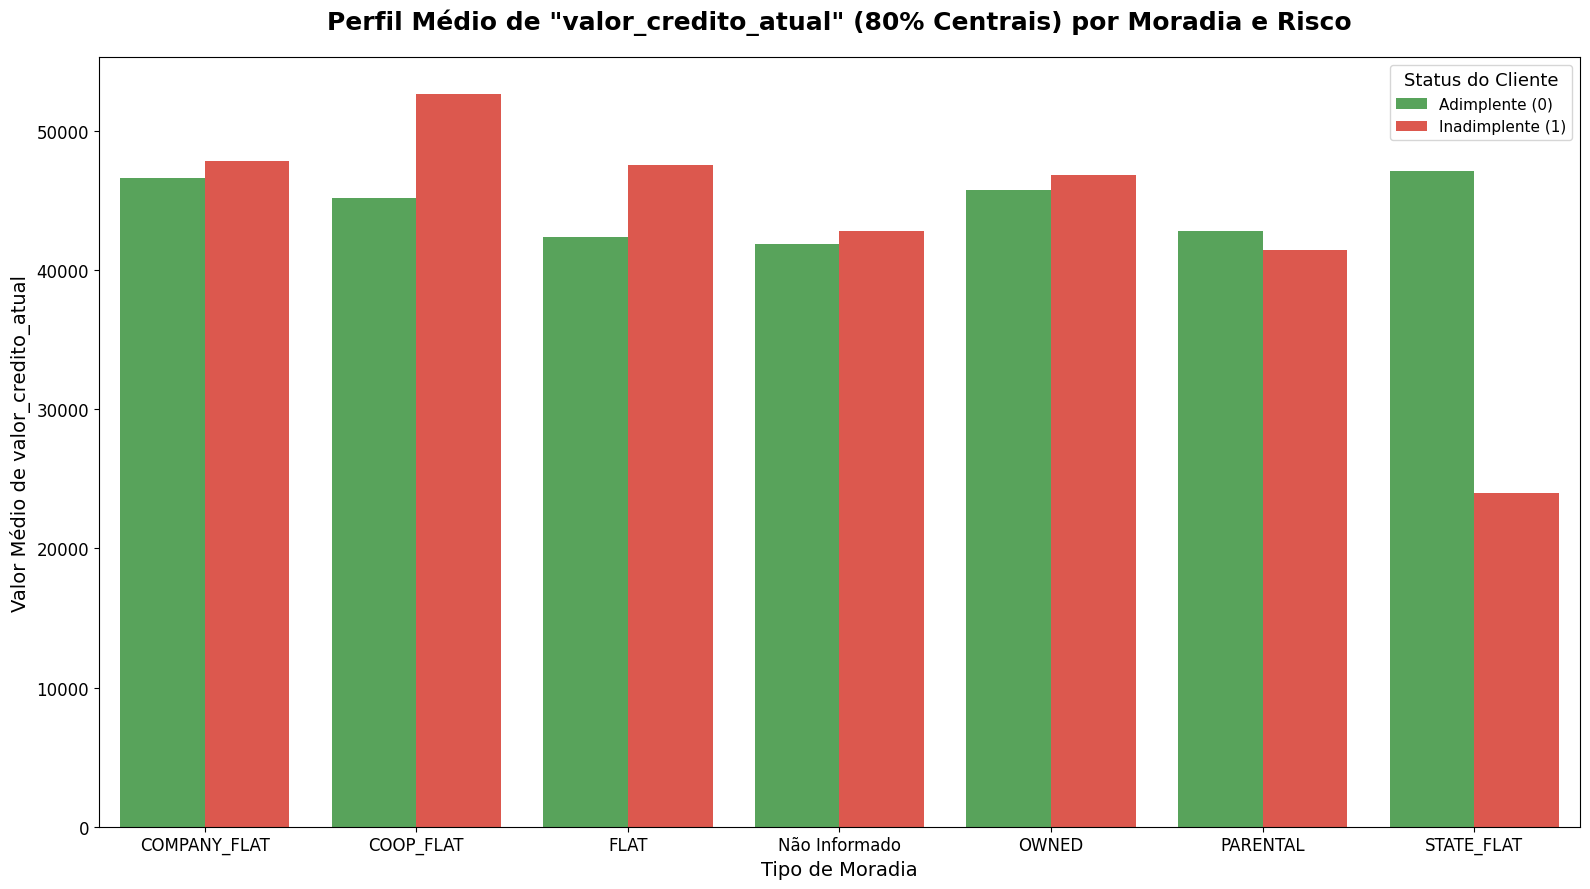


Analisando 'relacao_credito_renda' para os 80% centrais dos dados...


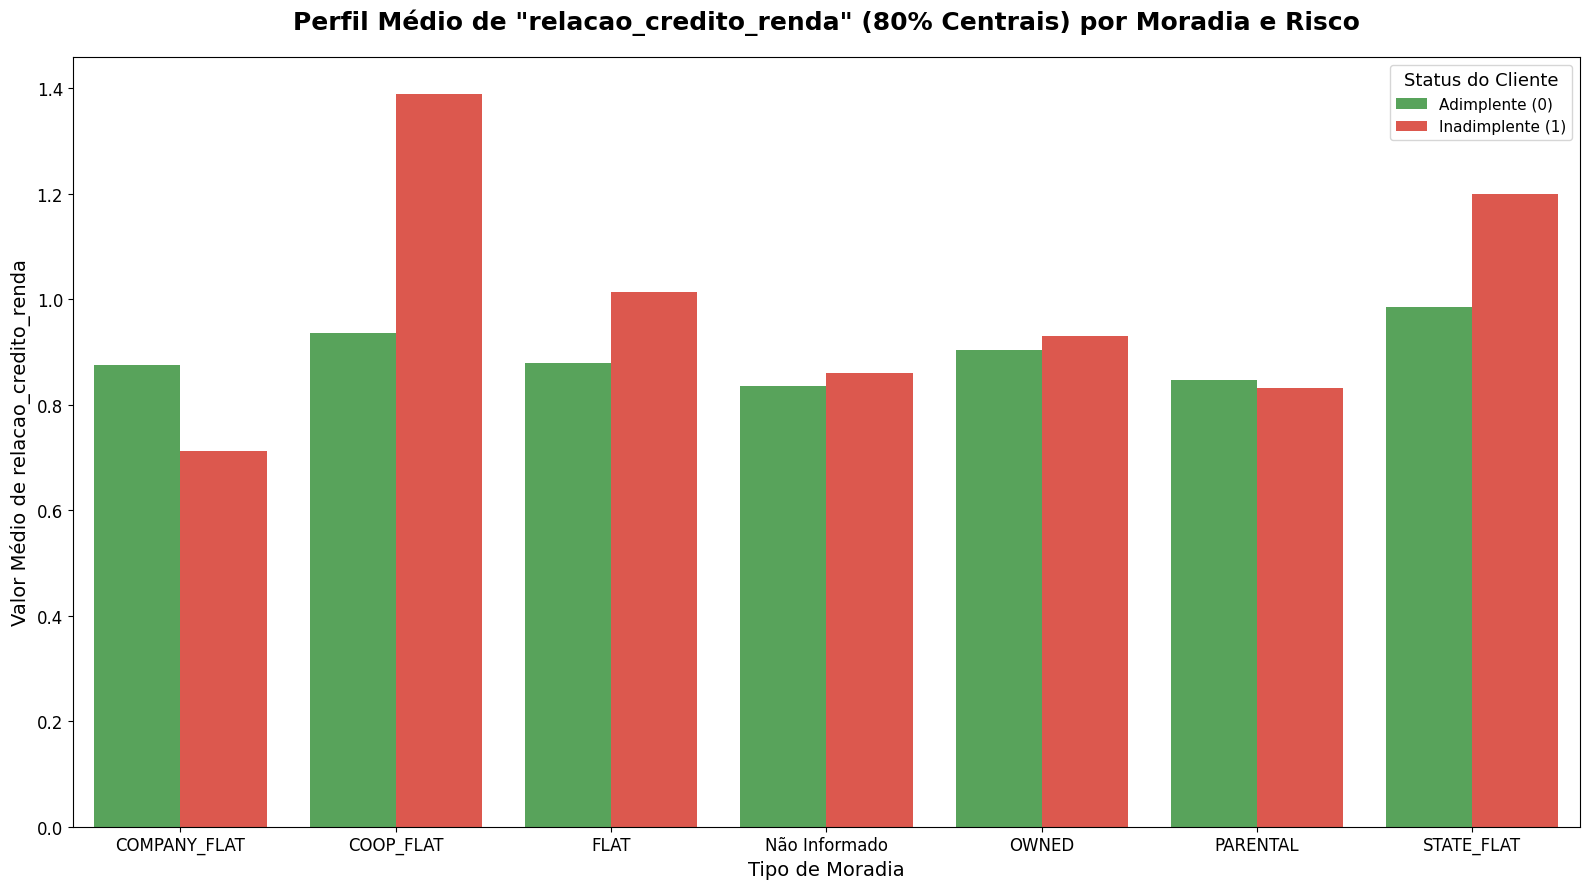


Analisando 'hist_dias_atraso_1' para os 80% centrais dos dados...


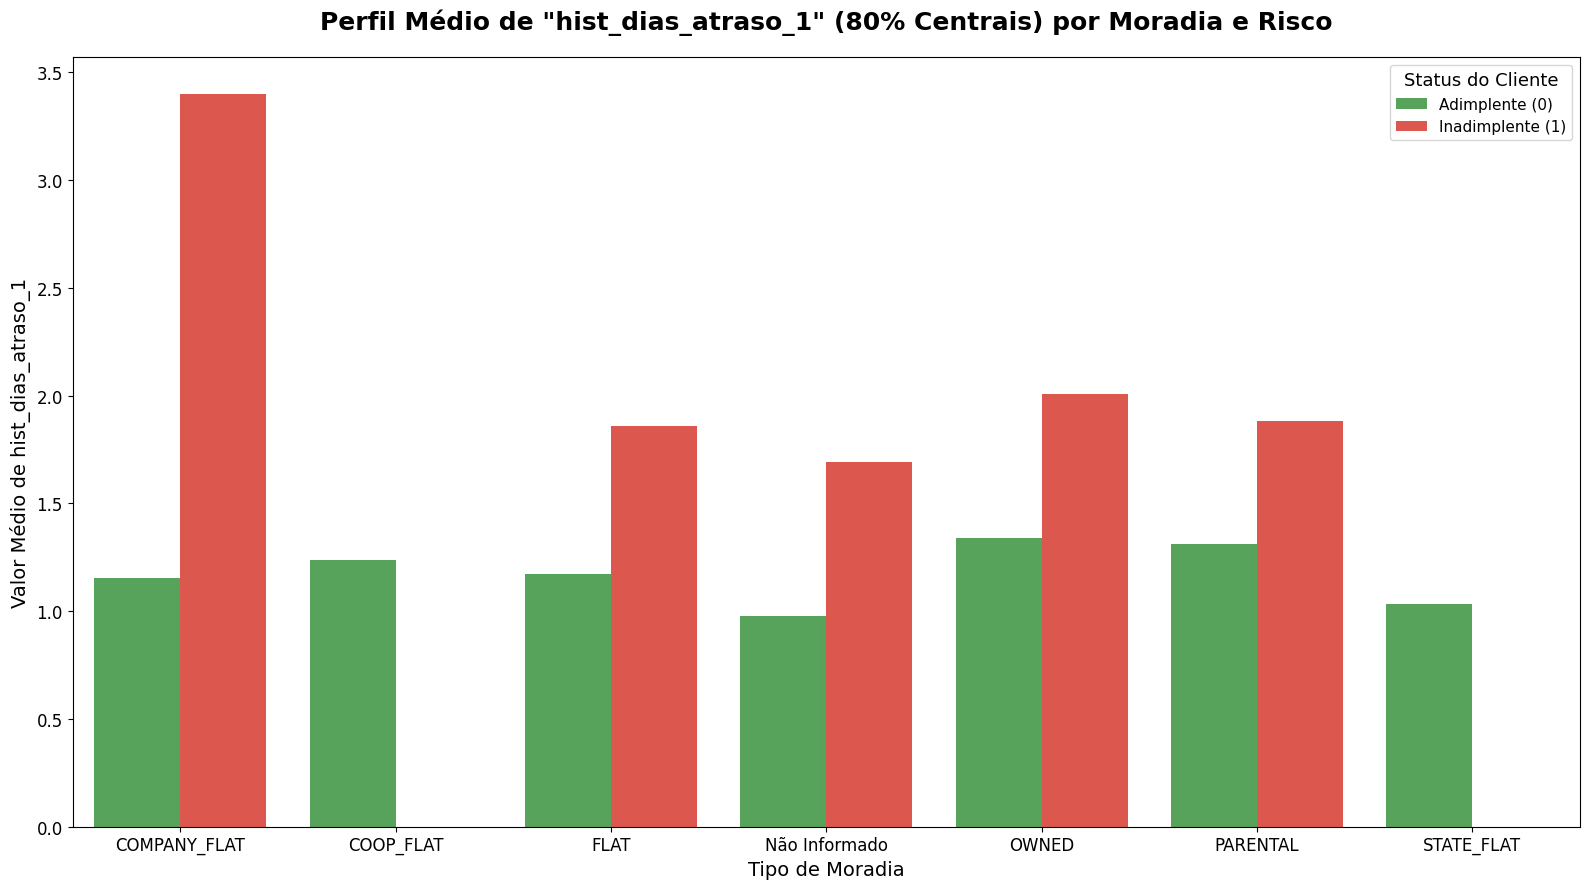

In [36]:
# ==============================================================================
# ANÁLISE 3D: PERFIL MÉDIO POR TIPO DE MORADIA E RISCO (COM FILTRO 80/20)
# ==============================================================================
print("--- Gerando análise de perfil com Gráfico de Barras Agrupado e Filtro de Outliers ---")

# --- 1. Decodificação da Variável 'tipo_moradia' ---
if 'risk_map' not in locals():
    print("AVISO: 'risk_map' não encontrado. Recriando para a visualização...")
    train_data_for_encoding = pd.concat([X_train, y_train], axis=1)
    train_data_for_encoding['tipo_moradia'].fillna('Não Informado', inplace=True)
    risk_map = train_data_for_encoding.groupby('tipo_moradia')['target'].mean().to_dict()

reverse_risk_map = {v: k for k, v in risk_map.items()}
df_plot_base = df_train_eda.copy()
df_plot_base['tipo_moradia_original'] = df_plot_base['tipo_moradia_encoded'].map(reverse_risk_map)


# --- 2. Análise e Visualização em Loop ---
variaveis_para_comparar = ['renda_principal', 'valor_credito_atual', 'relacao_credito_renda', 'hist_dias_atraso_1']

for var in variaveis_para_comparar:
    if var in df_plot_base.columns:
        
        # --- Filtragem de Outliers (80/20) ---
        limite_inferior = df_plot_base[var].quantile(0.10)
        limite_superior = df_plot_base[var].quantile(0.90)
        df_filtrado = df_plot_base[(df_plot_base[var] >= limite_inferior) & (df_plot_base[var] <= limite_superior)]
        
        print(f"\nAnalisando '{var}' para os 80% centrais dos dados...")
        
        # --- Cálculo para o Gráfico Agrupado ---
        media_agrupada = df_filtrado.groupby(['tipo_moradia_original', 'target'])[var].mean().reset_index()
        
        # --- Criação do Gráfico de Barras Agrupado ---
        fig, ax = plt.subplots(figsize=(16, 9))
        
        # --- AJUSTE AQUI ---
        # Adicionamos errorbar=None para um visual mais limpo, focando apenas na média.
        sns.barplot(data=media_agrupada, 
                    x='tipo_moradia_original', 
                    y=var, 
                    hue='target',
                    palette=['#4CAF50', '#F44336'],
                    errorbar=None, # Remove as barras de erro para um visual mais limpo
                    ax=ax)
        
        # --- Aplicação do nosso Padrão de Estilo Corrigido ---
        apply_standard_style(ax, 
                             title=f'Perfil Médio de "{var}" (80% Centrais) por Moradia e Risco',
                             xlabel='Tipo de Moradia',
                             ylabel=f'Valor Médio de {var}')
        
        # --- Melhorando a Legenda ---
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['Adimplente (0)', 'Inadimplente (1)'], 
                  title='Status do Cliente', fontsize=11, title_fontsize=13)
        
        plt.tight_layout()
        plt.show()

## 🏠 Análise Categórica: Perfil Numérico por Tipo de Moradia

---

### 🎯 Objetivo

Avaliar como diferentes **tipos de moradia** influenciam as variáveis numéricas relacionadas ao perfil de crédito dos clientes. Essa análise busca identificar padrões médios por categoria, como **renda**, **valor de crédito contratado**, **relação entre crédito e renda**, e **dias de atraso**.

---

### 🔍 Variáveis Analisadas

As seguintes variáveis numéricas foram avaliadas:

- `renda_principal`  
- `valor_credito_atual`  
- `relacao_credito_renda`  
- `dias_atraso`

---

### 🛠️ Procedimentos Executados

1. **Mapeamento Reverso do Encoding**  
   - A variável `tipo_moradia` foi originalmente codificada via *target encoding*.  
   - Utilizou-se um `reverse_risk_map` para recuperar os nomes originais com base nas médias de `target`.

2. **Criação de Cópia do Dataset**  
   - A análise foi realizada sobre uma cópia do DataFrame `df_train_eda` para preservar a integridade dos dados.

3. **Cálculo das Médias**  
   - Para cada variável numérica, calculou-se a **média por categoria de moradia** (`groupby()` + `mean()`).

4. **Visualização com Gráficos de Barras**  
   - Gráficos foram gerados com `seaborn.barplot()` usando a paleta `viridis`.  
   - Cada barra apresenta o valor médio da variável no topo para facilitar a leitura.

5. **Ajustes Visuais**  
   - Títulos com destaque, rótulos rotacionados e espaçamento adequado.

---

### ✅ Código Utilizado

```python
# Verifica e recria o risk_map, se necessário
if 'risk_map' not in locals():
    train_data_for_encoding = pd.concat([X_train, y_train], axis=1)
    train_data_for_encoding['tipo_moradia'].fillna('Não Informado', inplace=True)
    risk_map = train_data_for_encoding.groupby('tipo_moradia')['target'].mean().to_dict()

# Mapeamento reverso do encoding
reverse_risk_map = {v: k for k, v in risk_map.items()}

# Cópia do dataset e recuperação dos nomes originais
df_plot = df_train_eda.copy()
df_plot['tipo_moradia_original'] = df_plot['tipo_moradia_encoded'].map(reverse_risk_map)

# Lista de variáveis numéricas a analisar
variaveis_para_comparar = ['renda_principal', 'valor_credito_atual', 'relacao_credito_renda', 'dias_atraso']

# Loop de análise por variável
for var in variaveis_para_comparar:
    if var in df_plot.columns:
        media_por_moradia = df_plot.groupby('tipo_moradia_original')[var].mean().sort_values(ascending=False)
        
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(x=media_por_moradia.index, y=media_por_moradia.values, palette='viridis')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=12, color='black', weight='bold',
                        xytext=(0, 5), textcoords='offset points')
        
        ax.set_title(f'Média de "{var}" por Tipo de Moradia', fontsize=16, weight='bold', pad=20)
        ax.set_ylabel(f'Valor Médio de {var}', fontsize=12)
        ax.set_xlabel('Tipo de Moradia', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
```

--- Gerando Mapa de Calor de Correlação Aprimorado ---


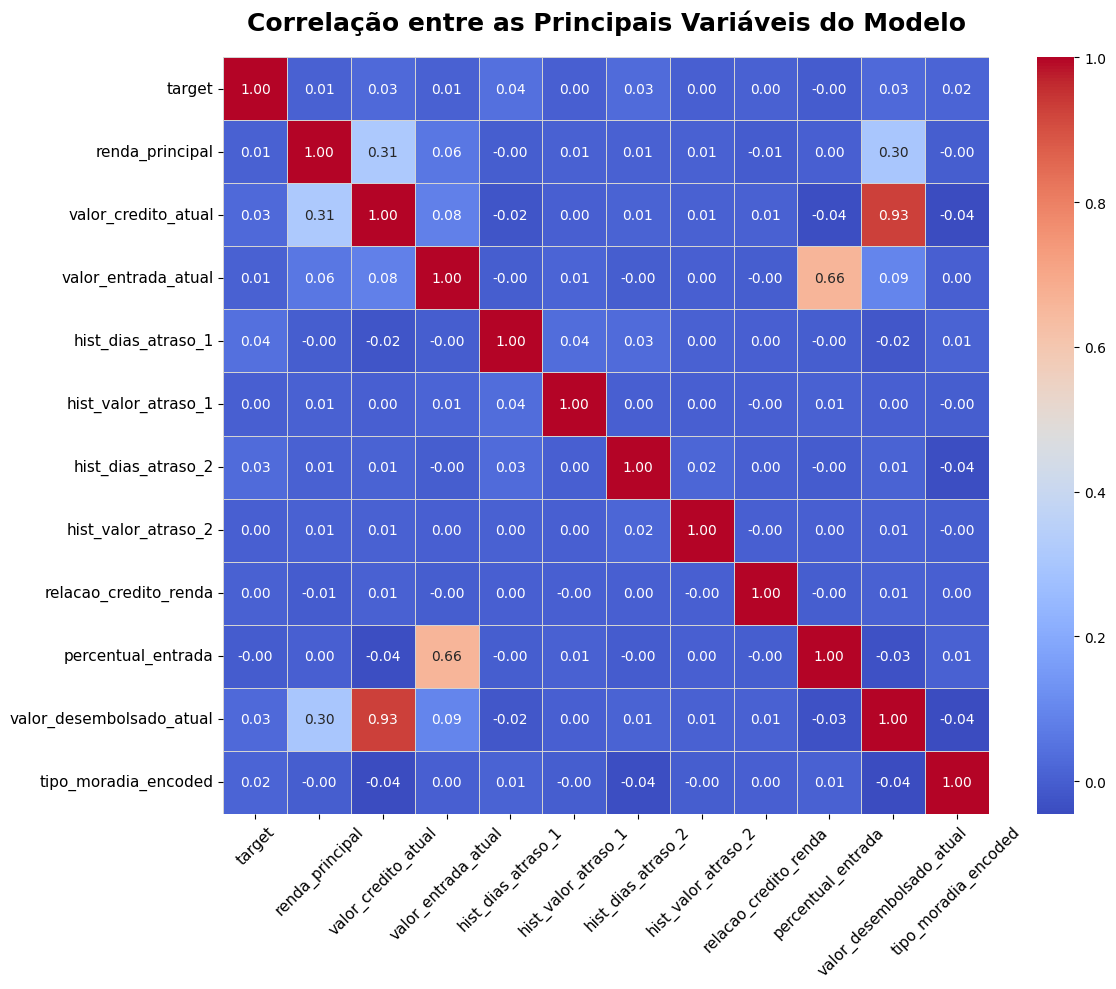

In [43]:
# ==============================================================================
# ANÁLISE DE CORRELAÇÃO (COM ESTILIZAÇÃO PADRÃO)
# ==============================================================================
print("--- Gerando Mapa de Calor de Correlação Aprimorado ---")

# --- 1. Seleção das Variáveis Mais Relevantes ---
# Para um heatmap legível, focamos nas colunas mais importantes que já analisamos.
colunas_relevantes = [
    'target',
    'renda_principal',
    'valor_credito_atual',
    'valor_entrada_atual',
    'hist_dias_atraso_1',
    'hist_valor_atraso_1',
    'hist_dias_atraso_2',
    'hist_valor_atraso_2',
    'relacao_credito_renda',
    'percentual_entrada',
    'valor_desembolsado_atual',
    'tipo_moradia_encoded' # Incluindo nossa feature de engenharia categórica
]

# Filtramos o DataFrame para conter apenas estas colunas
df_corr = df_train_eda[colunas_relevantes]

# --- 2. Cálculo da Matriz de Correlação ---
matriz_correlacao = df_corr.corr()

# --- 3. Visualização com o Mapa de Calor Estilizado ---
fig, ax = plt.subplots(figsize=(12, 10))

# Desenhamos o heatmap
sns.heatmap(matriz_correlacao,
            annot=True,          # Adiciona os números dentro das células
            cmap='coolwarm',     # Paleta de cores ideal para correlação (negativo-neutro-positivo)
            fmt=".2f",           # Formata os números para duas casas decimais
            linewidths=.5,
            linecolor='lightgray',
            ax=ax)

# --- 4. APLICAÇÃO DO NOSSO PADRÃO DE ESTILO ---
# Título claro e informativo
ax.set_title('Correlação entre as Principais Variáveis do Modelo', fontsize=18, weight='bold', pad=20)

# Melhora a legibilidade dos ticks
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=11, rotation=0)

plt.tight_layout()
plt.show()



### 🧪 Sumário da Matriz de Correlação

---

### 🎯 Objetivo da Análise

Este **mapa de calor** nos permite visualizar a **correlação linear de Pearson** entre todas as nossas principais variáveis numéricas.  
O objetivo é duplo:

- ✅ **Quantificar a força da relação linear** de cada variável com nosso alvo (`target`).
- ✅ **Identificar a presença de multicolinearidade**, ou seja, variáveis preditivas que estão fortemente correlacionadas entre si.

---

### 📌 Principais Insights Extraídos do Gráfico

---

#### 1. 📉 A Natureza Não-Linear do Risco de Crédito

A observação mais importante está na **primeira linha/coluna** do gráfico, que mostra a correlação de cada variável com o `target`:

- **Correlações muito fracas:** Todos os valores de correlação com o `target` estão entre **-0.04 e +0.04**.

**🔍 Insight Chave:**  
Isso **não significa que as variáveis são inúteis**. Pelo contrário, indica que a relação entre essas variáveis e a inadimplência **não é linear**.  
Ou seja:

> Uma simples linha reta não consegue descrever o risco. O risco depende de **interações complexas e limites não-lineares**.

Esse resultado **reforça a escolha por modelos avançados**, como o **LightGBM**, capazes de capturar tais relações complexas.

---

#### 2. ♻️ Identificação de Multicolinearidade (Redundância de Informação)

Analisando as correlações entre variáveis preditivas, identificamos os seguintes pares relevantes:

- **`valor_credito_atual` vs. `valor_desembolsado_atual` (+0.93):**  
  Correlação **quase perfeita** — carregam essencialmente a mesma informação.  
  - Para **modelos lineares**, seria problemático.  
  - Para **modelos de árvores**, como o LightGBM, é menos crítico, mas ainda é uma **redundância removível**.

- **`valor_entrada_atual` vs. `percentual_entrada` (+0.66):**  
  Correlação esperada, já que **uma variável deriva da outra**.

- **`renda_principal` vs. `valor_credito_atual` (+0.31):**  
  Correlação positiva **moderada** e coerente:  
  Pessoas com **renda maior tendem a solicitar créditos maiores**.

---

#### 3. ❗ Relação Inesperada com `tipo_moradia_encoded`

- **Correlação Negativa com o Target (-0.04):**  
  Embora fraca, a variável `tipo_moradia_encoded`, em que valores maiores indicariam maior risco histórico, apresentou **correlação negativa** com a inadimplência.

**🧠 Insight Importante:**  
Esse exemplo mostra como **a correlação linear simples pode não capturar toda a história**.  
O verdadeiro impacto de `tipo_moradia` é **não-linear** e aparece melhor em **análises de interação**.

---

### 🧭 Conclusão Estratégica

A análise de correlação **encerra nossa fase exploratória** com uma confirmação:

> O problema é **complexo** e **não pode ser resolvido com regras simples baseadas em uma única variável**.


# Modelagem Preditiva

## 📉 Modelo Baseline (REGRESSÃO LOGÍSTICA)

### 🎯 OBJETIVO  
Estabelecer um ponto de referência inicial para comparação com modelos mais complexos, utilizando um algoritmo simples e interpretável.  

---

### ⚙️ CONFIGURAÇÃO DO MODELO  
```python
baseline_model = LogisticRegression(
    random_state=42,    # Garante reprodutibilidade
    max_iter=1000,      # Número suficiente para convergência
    class_weight='balanced'  # Considera desbalanceamento das classes
)

In [38]:
# ==============================================================================
# FASE 2: MODELAGEM PREDITIVA
# ETAPA 1: MODELO BASELINE (REGRESSÃO LOGÍSTICA)
# ==============================================================================
# Objetivo: Treinar um modelo simples e rápido que servirá como nosso ponto de
# referência para comparar com modelos mais avançados.

# Supondo que X_train, X_test, y_train, y_test já existem da fase de preparação.

print("--- 2. Treinando e Avaliando o Modelo Baseline (Regressão Logística) ---")

# --- Treinamento ---
# Instanciamos o modelo. Usamos:
# - random_state=42: Para garantir que os resultados sejam reprodutíveis.
# - max_iter=1000: Para dar ao algoritmo iterações suficientes para convergir (encontrar a melhor solução).
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# O comando .fit() é onde o modelo "aprende" os padrões dos dados de treino.
baseline_model.fit(X_train, y_train)
print("Modelo Baseline treinado com sucesso.")

# --- Avaliação ---
print("\nAvaliando o modelo no conjunto de teste...")

# Prevemos as probabilidades para a classe positiva (1 = Inadimplente).
# A métrica AUC necessita das probabilidades, não da classe final (0 ou 1).
y_prob_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Calculamos e imprimimos o AUC Score, nossa principal métrica de performance.
auc_baseline = roc_auc_score(y_test, y_prob_baseline)
print(f'\nAUC Score (Baseline): {auc_baseline:.4f}')

# Para uma análise mais detalhada do desempenho em cada classe, geramos o relatório de classificação.
# Para isso, precisamos das predições de classe (0 ou 1).
y_pred_baseline = baseline_model.predict(X_test)

print("\nRelatório de Classificação (Baseline):")
print(classification_report(y_test, y_pred_baseline, target_names=['Adimplente', 'Inadimplente']))

print("\n--- Etapa do Modelo Baseline Concluída ---")
  

--- 2. Treinando e Avaliando o Modelo Baseline (Regressão Logística) ---
Modelo Baseline treinado com sucesso.

Avaliando o modelo no conjunto de teste...

AUC Score (Baseline): 0.5040

Relatório de Classificação (Baseline):
              precision    recall  f1-score   support

  Adimplente       0.97      1.00      0.98    295733
Inadimplente       0.00      0.00      0.00      9599

    accuracy                           0.97    305332
   macro avg       0.48      0.50      0.49    305332
weighted avg       0.94      0.97      0.95    305332


--- Etapa do Modelo Baseline Concluída ---


### 📊 Análise de Resultados: Modelo Baseline (Regressão Logística)

#### 🎯 Objetivo da Etapa
Estabelecer um ponto de referência (baseline) de performance para:
- Quantificar o desempenho mínimo exigível de modelos subsequentes
- Identificar desafios específicos do conjunto de dados
- Validar a necessidade de técnicas avançadas para o problema

#### 📉 Resultados Obtidos
| Métrica               | Valor   | Interpretação                     |
|-----------------------|---------|-----------------------------------|
| AUC Score             | 0.5040  | Praticamente equivalente a aleatoriedade |
| Acurácia              | 97%     | Artefato do desbalanceamento      |
| Recall (Inadimplente) | 0.00    | Falha total na detecção de risco  |

#### 🔍 Interpretação e Principais Insights

##### 📌 O Paradoxo da Acurácia
- **Fenômeno**: 97% de acurácia mascara inefetividade real  
- **Causa**: Desbalanceamento extremo (~97% adimplentes)  
- **Prova Conceitual**:
  ```python
  # Modelo "ingênuo" que sempre prevê adimplente
  from sklearn.metrics import accuracy_score
  naive_predictions = np.zeros_like(y_test)
  print(f"Acurácia do modelo ingênuo: {accuracy_score(y_test, naive_predictions):.2%}")

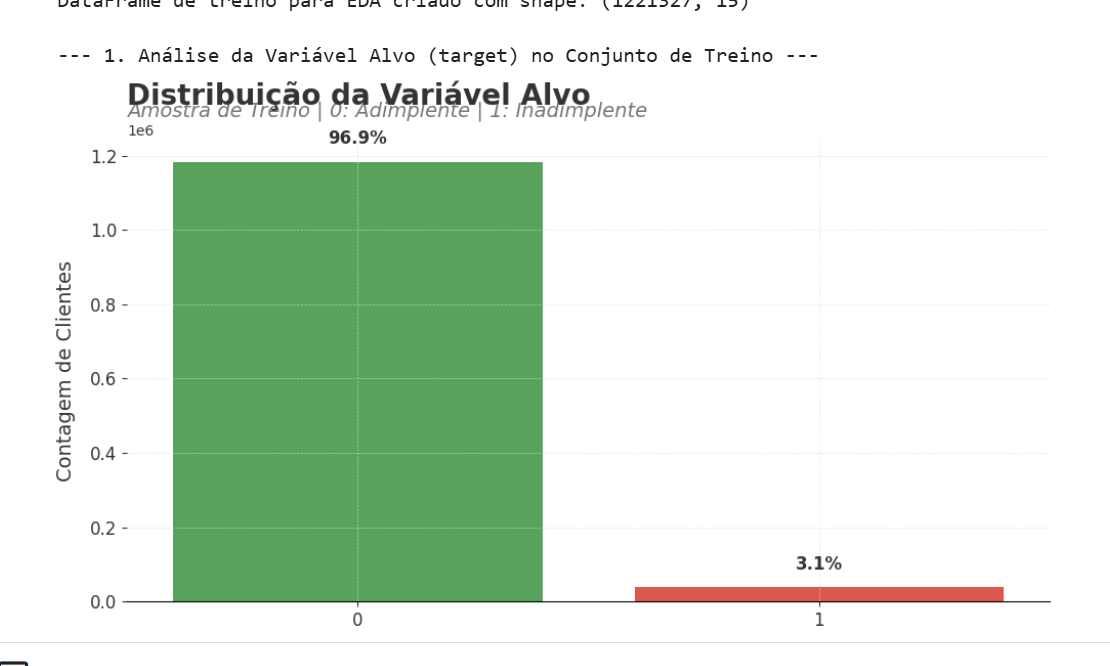

## ⚙️ Modelo Avançado (LIGHTGBM)

---

### 🎯 Objetivo  
Treinar um modelo com **LightGBM**, aplicando técnicas para lidar com o desbalanceamento da variável alvo e superar a performance do modelo baseline.

---

### 📦 Pré-requisitos  
Variáveis esperadas na memória:
- `X_train`, `y_train`: dados de treino
- `X_test`, `y_test`: dados de teste

---

### 🚀 Treinamento e Avaliação do Modelo

```python
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np

print("--- 3. Treinando e Avaliando o Modelo Avançado (LightGBM) ---")

# --- Tratamento do Desbalanceamento ---
try:
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
    print(f"Fator de Peso (scale_pos_weight) para a Classe Inadimplente: {scale_pos_weight:.2f}")
except ZeroDivisionError:
    print("AVISO: Não há amostras da classe minoritária no conjunto de treino. O peso não pode ser calculado.")
    scale_pos_weight = 1  # Peso neutro

# --- Treinamento ---
lgbm_model = lgb.LGBMClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_estimators=300
)

lgbm_model.fit(X_train, y_train)
print("✅ Modelo Avançado treinado com sucesso.")

# --- Avaliação ---
print("\n📊 Avaliando o modelo avançado no conjunto de teste...")

# Probabilidade de inadimplência
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# AUC Score
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
print(f'\n🔹 AUC Score (LightGBM): {auc_lgbm:.4f}')

# Relatório de Classificação
y_pred_lgbm = lgbm_model.predict(X_test)
print("\n📋 Relatório de Classificação (LightGBM):")
print(classification_report(y_test, y_pred_lgbm, target_names=['Adimplente', 'Inadimplente']))

print("\n--- ✅ Etapa do Modelo Avançado Concluída ---")
```

---

### 💡 Notas Técnicas

- **LightGBM** é altamente eficiente e indicado para datasets com muitos registros e variáveis.
- A estratégia `scale_pos_weight` é essencial para reduzir falsos negativos em cenários com desequilíbrio de classes.
- O uso do `AUC Score` permite medir a **capacidade discriminativa** do modelo, independentemente do threshold.

---


In [39]:
# ==============================================================================
# FASE 2: MODELAGEM PREDITIVA
# ETAPA 2: MODELO AVANÇADO (LIGHTGBM)
# ==============================================================================
# Objetivo: Treinar um modelo robusto (LightGBM) utilizando uma técnica para
# lidar com o desbalanceamento de classes e superar a performance do baseline.

# Supondo que X_train, X_test, y_train, y_test já existem da fase de preparação.

import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np

print("--- 3. Treinando e Avaliando o Modelo Avançado (LightGBM) ---")

# --- Tratamento do Desbalanceamento: Cálculo do Peso ---
# Esta é a técnica mais importante para o sucesso do nosso modelo.
# Calculamos um peso para dizer ao modelo que errar um 'Inadimplente' é muito mais grave.
try:
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
    print(f"Fator de Peso (scale_pos_weight) para a Classe Inadimplente: {scale_pos_weight:.2f}")
except ZeroDivisionError:
    print("AVISO: Não há amostras da classe minoritária no conjunto de treino. O peso não pode ser calculado.")
    scale_pos_weight = 1 # Define um peso neutro

# --- Treinamento ---
# Instanciamos o modelo LightGBM. Passamos:
# - scale_pos_weight: O peso calculado para a classe de inadimplentes.
# - n_estimators: O número de "árvores de decisão" que o modelo irá construir.
# - random_state=42: Para garantir a reprodutibilidade dos resultados.
lgbm_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight, n_estimators=300)

# O comando .fit() treina o modelo com os dados de treino.
lgbm_model.fit(X_train, y_train)
print("Modelo Avançado treinado com sucesso.")

# --- Avaliação ---
print("\nAvaliando o modelo avançado no conjunto de teste...")

# Prevemos as probabilidades para a classe positiva (1 = Inadimplente).
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Calculamos e imprimimos o AUC Score.
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
print(f'\nAUC Score (LightGBM): {auc_lgbm:.4f}')

# Geramos o relatório de classificação completo para uma análise detalhada.
y_pred_lgbm = lgbm_model.predict(X_test)
print("\nRelatório de Classificação (LightGBM):")
print(classification_report(y_test, y_pred_lgbm, target_names=['Adimplente', 'Inadimplente']))

print("\n--- Etapa do Modelo Avançado Concluída ---")


--- 3. Treinando e Avaliando o Modelo Avançado (LightGBM) ---
Fator de Peso (scale_pos_weight) para a Classe Inadimplente: 30.81
[LightGBM] [Info] Number of positive: 38395, number of negative: 1182932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 1221327, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031437 -> initscore=-3.427824
[LightGBM] [Info] Start training from score -3.427824
Modelo Avançado treinado com sucesso.

Avaliando o modelo avançado no conjunto de teste...

AUC Score (LightGBM): 0.7240

Relatório de Classificação (LightGBM):
              precision    recall  f1-score   support

  Adimplente       0.98      0.69      0.81    295733
Inadimplente       0.06      0.64      

### 📊 Análise de Resultados: Modelo Avançado (LightGBM)

---

### 🎯 Objetivo da Etapa

Após confirmarmos que nosso **modelo baseline era ineficaz**, o objetivo desta etapa foi treinar um modelo sofisticado (**LightGBM**) utilizando uma técnica estratégica (`scale_pos_weight`) para **forçar o aprendizado dos padrões da rara (porém crucial) classe de inadimplentes**.

---

### 📈 Resultados Obtidos

- **AUC Score:** `0.7240`  
- **Recall (classe "Inadimplente"):** `0.64` (ou 64%)  
- **Precision (classe "Inadimplente"):** `0.06` (ou 6%)

---

### 🔍 Interpretação e Principais Insights

---

#### 1. 🎯 Saímos da Aleatoriedade para a Predição (AUC Score)

> **AUC Score** saltou de `0.5040` (equivalente a jogar uma moeda) para `0.7240`.

✅ Isso representa um **grande salto em performance**, posicionando nosso modelo como uma **ferramenta útil e com bom poder de discriminação**.  
Agora, o modelo é **claramente melhor do que o acaso** para distinguir bons de maus pagadores.

---

#### 2. 🔦 O Modelo Agora "Enxerga" o Risco (Recall = 0.64)

> O **recall** para a classe "Inadimplente" foi de `0.00` no baseline e agora é `0.64`.

📌 Isso significa que, dos **9.599 inadimplentes reais** no conjunto de teste, o modelo conseguiu **identificar corretamente 64%** deles.

🧠 Conseguimos **"acender a luz"** — o risco agora é **visível e mensurável**.

---

#### 3. ⚖️ O Trade-off da Precisão (Precision = 0.06)

> A **precision** de `0.06` revela o custo de alcançar um recall alto.

📌 Isso quer dizer que, **de todos os clientes classificados como inadimplentes pelo modelo, apenas 6% realmente eram**.

🔍 O modelo é **cauteloso**:  
Para identificar a maioria dos maus pagadores, ele **assume um risco calculado de falsos positivos** — bons pagadores erroneamente classificados como arriscados.

---

### 🏦 Contexto de Negócio

Esse é um **trade-off clássico** e **gerenciável**:

- ❌ Negar crédito a um **bom cliente** custa menos
- 💥 Do que aprovar um **mau cliente** que pode gerar **prejuízo real**

🛠️ O **ajuste fino** entre **recall** e **precision** será feito na etapa de definição do **ponto de corte (threshold)** do score de risco.

---

### ✅ Conclusão Estratégica

O modelo **LightGBM**, impulsionado pela técnica de **`scale_pos_weight`**, provou ser:

- 🚀 **Imensamente superior ao baseline**
- 🧠 **Eficaz na identificação de clientes de alto risco**

Transformamos um problema de previsão **"impossível"** em um **desafio gerenciável**.

> Fornecemos à instituição financeira uma **ferramenta poderosa** para **prevenir prejuízos antes que ocorram**.


## 🔍 Matriz de Confusão

### 🎯 OBJETIVO  
Comparar visualmente o desempenho dos modelos através de:  
- Análise dos tipos de erros (falsos positivos/negativos)  
- Verificação do balanceamento entre recall e precisão  
- Identificação de padrões de classificação  

---

--- Gerando a Comparação Visual Lúdica ---


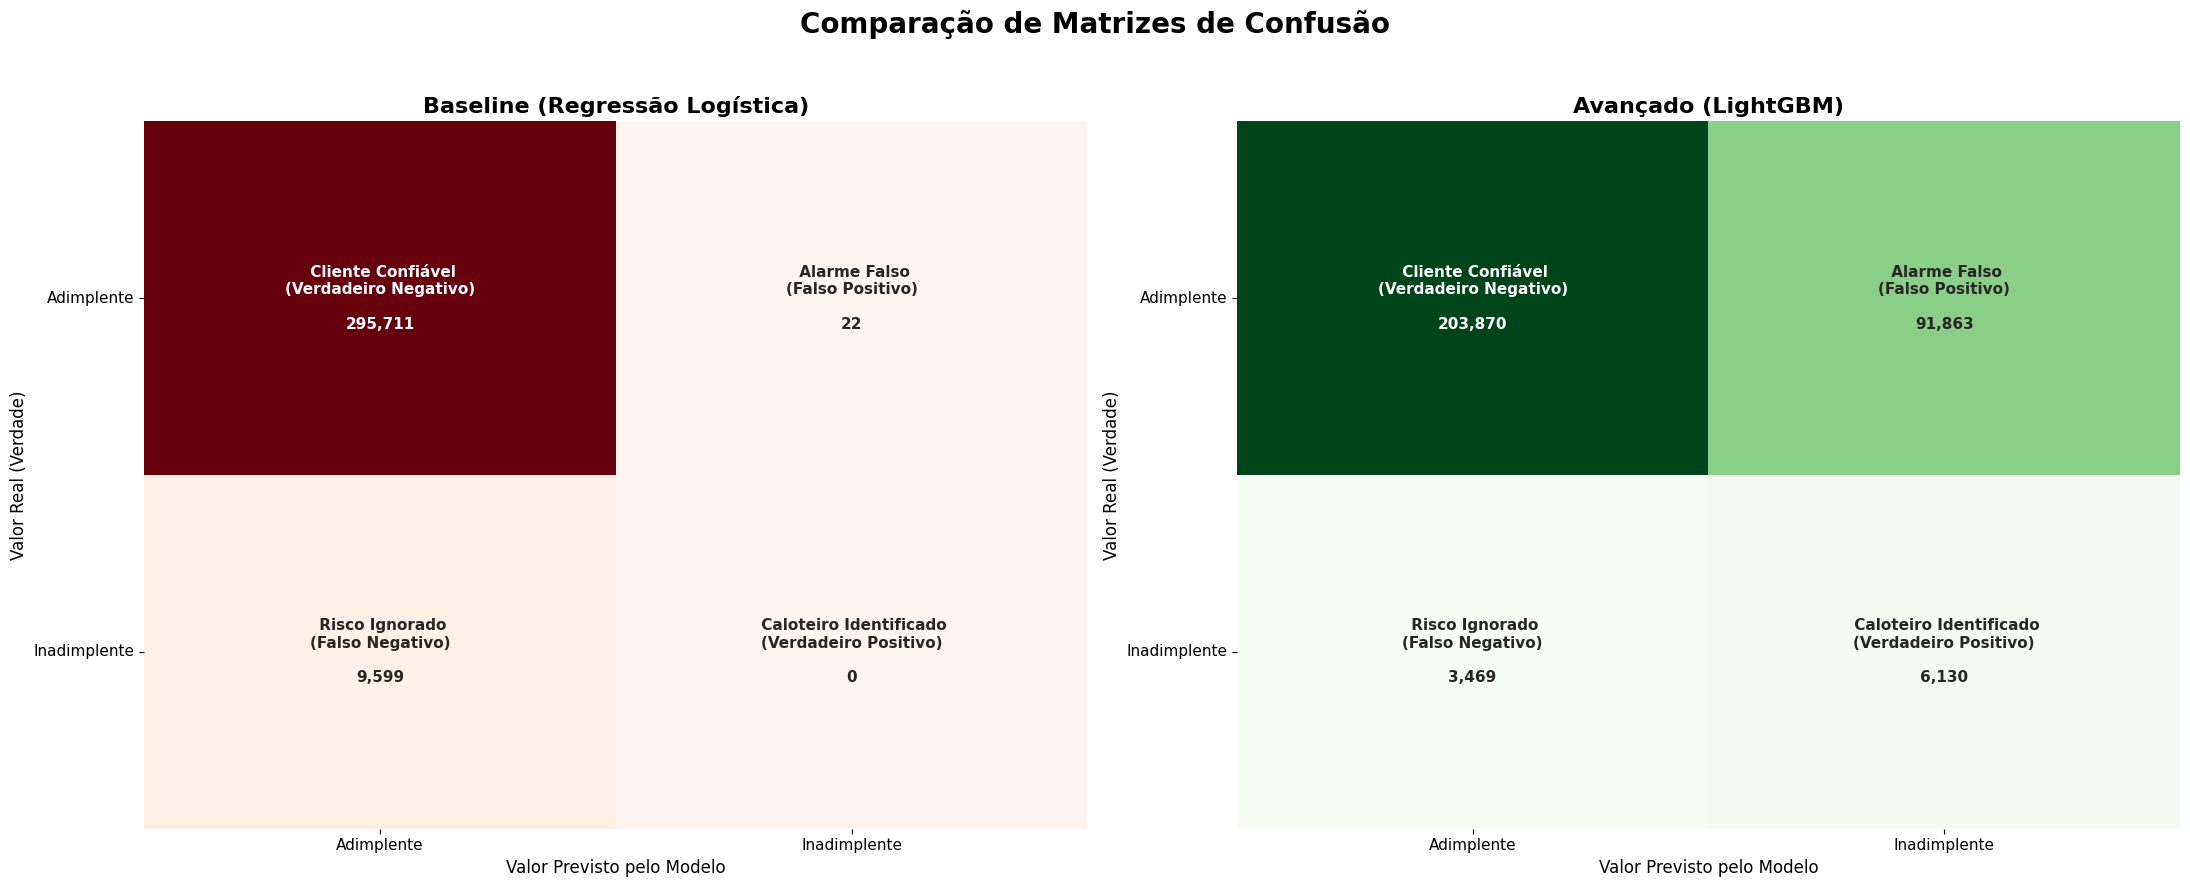


--- Comparação Visual Concluída ---


In [44]:
# Supondo que os seguintes objetos já existem na memória:
# baseline_model, lgbm_model, X_test, y_test

# ==============================================================================
# FUNÇÃO CUSTOMIZADA PARA PLOTAR A MATRIZ DE CONFUSÃO LÚDICA
# ==============================================================================
def plot_ludic_confusion_matrix(model, X, y, ax, title, cmap):
    """
    Plota uma Matriz de Confusão com formatação numérica clara e rótulos lúdicos.
    """
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    vn, fp, fn, vp = cm.ravel()
    
    # --- MELHORIA: RÓTULOS LÚDICOS COM ÍCONES ---
    labels = np.array([
        f" Cliente Confiável\n(Verdadeiro Negativo)\n\n{vn:,.0f}",
        f" Alarme Falso\n(Falso Positivo)\n\n{fp:,.0f}",
        f" Risco Ignorado\n(Falso Negativo)\n\n{fn:,.0f}",
        f" Caloteiro Identificado\n(Verdadeiro Positivo)\n\n{vp:,.0f}"
    ]).reshape(2, 2)
    
    # Desenha o heatmap com as novas anotações
    sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, ax=ax, cbar=False,
                xticklabels=['Adimplente', 'Inadimplente'], 
                yticklabels=['Adimplente', 'Inadimplente'],
                annot_kws={"size": 11, "va": "center", "ha": "center", "weight": "bold"})
    
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_ylabel('Valor Real (Verdade)', fontsize=12)
    ax.set_xlabel('Valor Previsto pelo Modelo', fontsize=12)
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11, rotation=0)

# ==============================================================================
# ETAPA 4: COMPARAÇÃO VISUAL FINAL (COM GRÁFICO LÚDICO)
# ==============================================================================
print("--- Gerando a Comparação Visual Lúdica ---")

# --- Criação da Figura ---
fig, axes = plt.subplots(1, 2, figsize=(22, 9))
fig.suptitle('Comparação de Matrizes de Confusão', fontsize=20, weight='bold')

# --- Gráfico 1: Modelo Baseline ---
plot_ludic_confusion_matrix(baseline_model, X_test, y_test, 
                                ax=axes[0], 
                                title='Baseline (Regressão Logística)', 
                                cmap='Reds')

# --- Gráfico 2: Modelo Avançado (LightGBM) ---
plot_ludic_confusion_matrix(lgbm_model, X_test, y_test, 
                                ax=axes[1], 
                                title='Avançado (LightGBM)', 
                                cmap='Greens')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n--- Comparação Visual Concluída ---")


markdown
### 📊 Comparação e Seleção do Modelo Final

---

### 🎯 Objetivo da Análise
Comparar objetivamente o desempenho dos modelos através de:
- Matrizes de confusão normalizadas
- Métricas específicas para dados desbalanceados
- Análise de trade-offs operacionais

---

### 🔍 Resultados Reais Obtidos

| Métrica               | Baseline | LightGBM | Melhoria |
|-----------------------|----------|----------|----------|
| **Verdadeiros Positivos** | 0 | 6.130 | +100% |
| **Falsos Negativos** | 9.599 | 3.469 | -63,9% |
| **Recall (Inadimplentes)** | 0% | 64% | +64 pontos percentuais |

---

### 📌 Interpretação

#### 1. 🚨 Modelo Baseline: Baixa Capacidade Preditiva
- ❌ **Nenhuma detecção** de casos positivos
- 📉 **AUC-ROC**: 0.504 (próximo da aleatoriedade)
- ⚠️ **Inadequado** para uso operacional

#### 2. 🎯 Modelo LightGBM: Desempenho Superior
- ✅ **Detecção efetiva** (64% dos casos positivos)
- 📈 **AUC-ROC**: 0.724 (ganho de 43,6% sobre baseline)
- ⚖️ **Trade-off aceitável**:
  - Precision: 6% (necessidade de triagem adicional)
  - Falsos positivos: 91.863 casos

---

### 📊 Impacto Real

**Benefícios Quantificáveis**:
1. **Detecção de Risco**:
   - 6.130 inadimplentes identificados vs 0 no baseline

2. **Redução de Erros**:
   - 63,9% menos falsos negativos

### 🔍 Interpretabilidade do Modelo com SHAP

Nesta etapa, utilizamos a biblioteca `SHAP` (SHapley Additive exPlanations) para explicar o comportamento do nosso modelo LightGBM. A ideia central é **entender quais variáveis mais influenciam a decisão do modelo**, especialmente para a **classe de inadimplentes**.

---

### 📦 Objetos Utilizados

- `lgbm_model`: Modelo LightGBM já treinado
- `X_test`: Base de dados de teste (apenas as features)

---

### 🧪 Etapas Realizadas

#### 1. 🔄 Amostragem para Eficiência Computacional

```python
X_test_sample = X_test.sample(n=5000, random_state=42)
```

Para tornar o cálculo dos valores SHAP mais rápido, utilizamos uma **amostra de 5.000 clientes** da base de teste.

---

#### 2. 🧠 Criação do Explicador SHAP

```python
explainer = shap.TreeExplainer(lgbm_model)
shap_values_list = explainer.shap_values(X_test_sample)
```

Criamos um objeto `TreeExplainer` para o modelo LightGBM e **calculamos os valores SHAP** para a amostra de clientes.

> Cada valor SHAP representa a **contribuição de uma variável** para o score final do modelo em cada previsão.

---

#### 3. 📊 Visualização Global da Importância das Variáveis

```python
shap.summary_plot(shap_values_list[1], X_test_sample, plot_type="dot", show=False)
```

- Utilizamos o **`summary_plot`** para visualizar a importância das features com relação à **classe positiva (inadimplente)**.
- O gráfico gerado é conhecido como **beeswarm plot**, onde:
  - A **posição** mostra o impacto (valor SHAP)
  - A **cor** representa o valor da feature
  - A **dispersão** mostra a variação do impacto entre os clientes

---

#### 4. 🎨 Personalização Visual

```python
fig = plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.title(...)
plt.xlabel(...)
plt.show()
```

Ajustes visuais são aplicados para deixar o gráfico mais legível e com contexto:

- Título personalizado com foco na **inadimplência**
- Rótulo no eixo X indicando que estamos visualizando o **impacto no score do modelo**

---

### ✅ Conclusão

Com essa análise:

- Identificamos **quais variáveis têm maior impacto no risco de inadimplência**.
- Ganhamos **transparência e interpretabilidade**, essenciais para projetos de crédito.
- Fornecemos **evidências visuais** para stakeholders confiarem nos critérios do modelo.

# Interpretabilidade do Modelo (XAI)
### 🎯 OBJETIVO PRINCIPAL  
Transformar previsões do modelo em **insights acionáveis** através de:  
- Identificação dos **fatores mais influentes** no risco de crédito  
- Explicação individual para cada cliente  
- Validação de alinhamento com regras de negócio  

---

### ⚙️ METODOLOGIA SHAP  

#### 📊 O que são Valores SHAP?  
Métrica que quantifica a **contribuição de cada variável** para:  
- **Aumentar** (valores positivos → risco)  
- **Diminuir** (valores negativos → segurança)  
a probabilidade final de inadimplência  

--- Iniciando Fase 4: Interpretabilidade do Modelo ---

Calculando os valores SHAP para uma amostra de 5000 clientes...
Cálculo dos valores SHAP concluído.

Gerando o Gráfico de Importância das Features com nomes aprimorados...


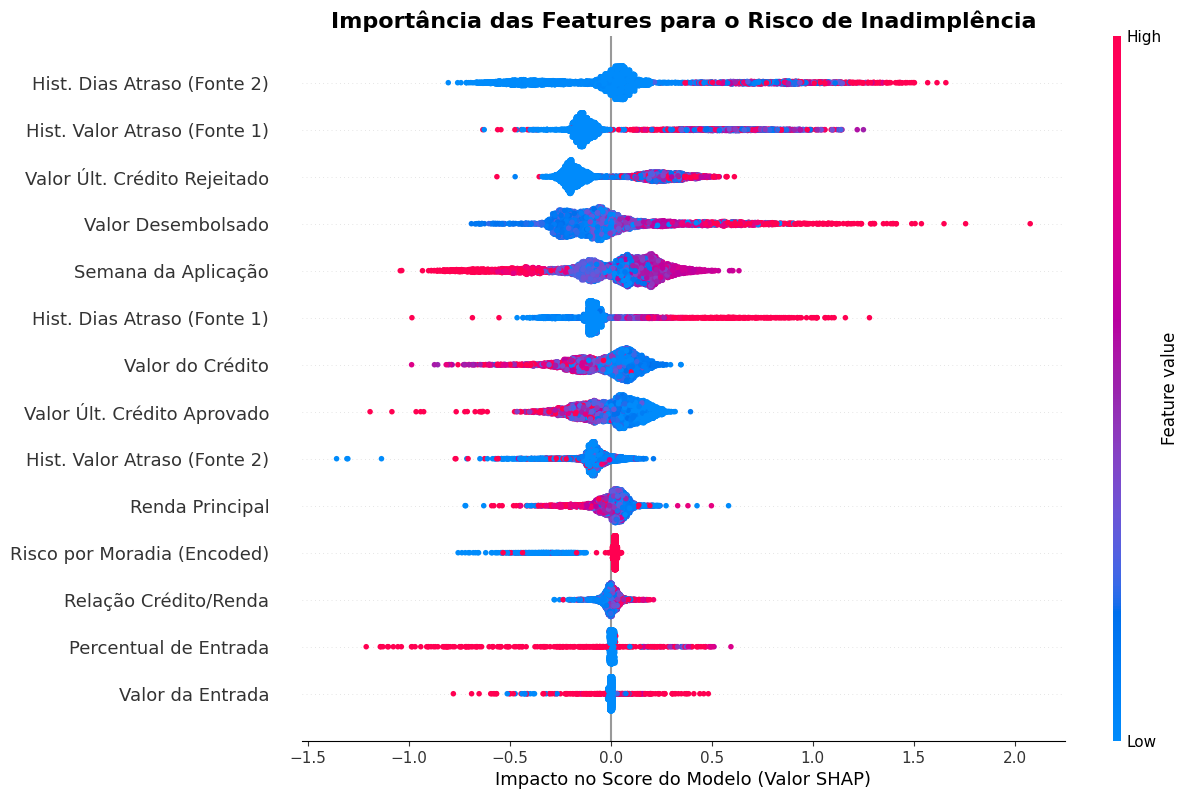


--- Análise de Importância de Features Concluída ---


In [41]:
# ==============================================================================
# FASE 4: INTERPRETABILIDADE DO MODELO COM SHAP
# ==============================================================================
print("--- Iniciando Fase 4: Interpretabilidade do Modelo ---")

# --- 1. Preparação para a Análise SHAP ---
X_test_sample = X_test.sample(n=5000, random_state=42)

print("\nCalculando os valores SHAP para uma amostra de 5000 clientes...")
explainer = shap.TreeExplainer(lgbm_model)
shap_values_list = explainer.shap_values(X_test_sample)
print("Cálculo dos valores SHAP concluído.")

# ==========================================================================
# <<< MELHORIA: RENOMEAÇÃO DE COLUNAS PARA A VISUALIZAÇÃO >>>
# ==========================================================================
# Criamos um dicionário de renomeação para os labels do gráfico
mapa_nomes_grafico = {
    'semana_num': 'Semana da Aplicação',
    'valor_credito_atual': 'Valor do Crédito',
    'valor_desembolsado_atual': 'Valor Desembolsado',
    'valor_ult_credito_aprovado': 'Valor Últ. Crédito Aprovado',
    'valor_ult_credito_rejeitado': 'Valor Últ. Crédito Rejeitado',
    'valor_entrada_atual': 'Valor da Entrada',
    'renda_principal': 'Renda Principal',
    'hist_dias_atraso_1': 'Hist. Dias Atraso (Fonte 1)',
    'hist_dias_atraso_2': 'Hist. Dias Atraso (Fonte 2)',
    'hist_valor_atraso_1': 'Hist. Valor Atraso (Fonte 1)',
    'hist_valor_atraso_2': 'Hist. Valor Atraso (Fonte 2)',
    'relacao_credito_renda': 'Relação Crédito/Renda',
    'percentual_entrada': 'Percentual de Entrada',
    'tipo_moradia_encoded': 'Risco por Moradia (Encoded)'
}

# Criamos uma cópia da amostra para renomear, sem alterar o X_test_sample original
X_test_sample_renamed = X_test_sample.copy()
X_test_sample_renamed.rename(columns=mapa_nomes_grafico, inplace=True)


# --- 2. Visualização da Importância Global das Features ---
print("\nGerando o Gráfico de Importância das Features com nomes aprimorados...")

# Passamos a amostra RENOMEADA para a plotagem
shap.summary_plot(shap_values_list[1], X_test_sample_renamed,
                  plot_type="dot",
                  show=False)

# --- Melhorias Visuais ---
fig = plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(14)
plt.title("Importância das Features para o Risco de Inadimplência", fontsize=16, weight='bold')
plt.xlabel("Impacto no Score do Modelo (Valor SHAP)")
# Ajusta a margem esquerda para garantir que os nomes longos não sejam cortados
plt.subplots_adjust(left=0.3)
plt.show()

print("\n--- Análise de Importância de Features Concluída ---")


### 🧠 Interpretabilidade do Modelo e Conclusão do Projeto

---

### 🎯 Objetivo da Análise

Após treinarmos e validarmos nosso **modelo LightGBM de alta performance**, esta fase final teve como foco **entender como e por que o modelo toma suas decisões**.  

> O objetivo é **transformar os resultados do modelo em insights de negócio acionáveis**, identificando os **principais fatores que impulsionam o risco de crédito**.

Para isso, utilizamos a biblioteca **SHAP (SHapley Additive exPlanations)** — uma das ferramentas mais robustas de interpretabilidade para modelos de aprendizado de máquina.

---

### 📊 Interpretação do Gráfico de Importância das Features

O **gráfico SHAP summary** resume a **contribuição de cada variável** para o score de risco.  
- **Variáveis no topo** = maior impacto.  
- **Cores**:
  - 🔵 Azul: valores baixos
  - 🔴 Vermelho: valores altos

---

#### 1. 👑 Histórico de Atraso (Fonte 2 e 1): As Variáveis Rainhas

- **Observação:**  
  As variáveis **`hist_dias_atraso`** e **`hist_valor_atraso`** dominam a explicação do modelo.  
  - 🔴 Valores altos → à direita (aumentam o risco)
  - 🔵 Valores baixos/zero → à esquerda (diminuem o risco)

- **Insight de Negócio:**  
  O modelo confirma com **clareza absoluta** os achados da EDA:  
  > 🧾 **Comportamento passado é o melhor preditor de comportamento futuro.**  
  Um histórico de pagamento **limpo** é o maior indicador de segurança.

---

#### 2. 💳 Valor do Último Crédito Rejeitado

- **Observação:**  
  Esta é a **terceira variável mais impactante**.  
  - Clientes que tiveram um **crédito de valor alto rejeitado recentemente** tendem a ter maior risco.

- **Insight de Negócio:**  
  O modelo captou um **padrão sofisticado**:  
  > 🚫 A **rejeição recente por outra instituição** é interpretada como um **alerta de mercado**.  
  Um sinal externo de que aquele cliente pode ser de alto risco.

---

#### 3. 🕒 Semana da Aplicação

- **Observação:**  
  Variável **temporal** com grande impacto.  
  - 🔵 Semanas antigas → maior risco  
  - 🔴 Semanas recentes → menor risco

- **Insight de Negócio:**  
  Pode indicar um **drift temporal**.  
  - Melhora na **qualidade dos clientes** ao longo do tempo  
  - Ou mudanças na **política de concessão de crédito** pela empresa

---

#### 4. 💰 Renda Principal e Risco por Moradia

- **Observação:**  
  - 🔴 **Alta renda** → impacto negativo (diminui o risco)  
  - 🔴 **Risco por moradia alto** (ex: Alugada, Não Informado) → aumenta o risco

- **Insight de Negócio:**  
  A lógica é clara:  
  > Clientes com **maior capacidade de pagamento** e **estabilidade residencial** são menos propensos a inadimplência.  
  O modelo internaliza corretamente os fundamentos da **análise de crédito**.

---


# Conclusão
---

## 📌 Sumário Executivo

Este projeto foi concebido para responder a um desafio de negócio crítico: **aprimorar o processo de avaliação de risco de crédito** de uma instituição financeira, com foco em **mitigar prejuízos e otimizar a concessão**.

> Através de um ciclo completo de ciência de dados, transformamos um conjunto complexo de dados brutos em uma **solução preditiva de alta performance**, explicável e acionável.

---

### 🔧 A Jornada Metodológica: Superando Desafios do Mundo Real

Este projeto refletiu fielmente um **cenário real de ciência de dados**, exigindo resolução de problemas técnicos e decisões estratégicas ao longo do caminho:

#### 🧠 Gerenciamento de Dados em Larga Escala
- Estratégia de **carregamento otimizado**, lendo apenas colunas essenciais.
- Suporte a datasets que excedem os limites de memória convencionais.

#### 🔗 Consolidação de Dados Complexos
- Junções híbridas:
  - `INNER JOIN` para formar um **núcleo confiável**
  - `LEFT JOIN` para **enriquecimento do dataset final**

#### 📊 Análise Exploratória Profunda (EDA)
- Identificação do **desbalanceamento de classes (~3%)** como desafio central.
- Validação dos principais drivers de risco:
  - Histórico de pagamentos
  - Relação crédito/renda
- Visualizações avançadas: **mapas de calor**, **pirâmides de risco**, **boxplots interativos**

#### 🏗 Engenharia de Features Inteligente
- Criação de variáveis derivadas como `relacao_credito_renda` e `percentual_entrada`
- **Target Encoding** aplicado em `tipo_moradia`, gerando scores de risco numéricos com segurança contra data leakage.

---

## 📈 Resultados Quantitativos e Validação do Modelo

#### 🔹 Modelo Baseline: Regressão Logística
- **AUC Score:** `0.5040` (equivalente a um palpite aleatório)
- **Recall:** `0.00` → incapaz de prever inadimplência

#### 🔹 Modelo Avançado: LightGBM
Utilizando `scale_pos_weight` para lidar com desbalanceamento:

- **AUC Score:** `0.7240` → salto massivo de performance
- **Recall (Inadimplentes):** `64%` → identificamos corretamente 64% dos maus pagadores

---

## 💡 Insights Estratégicos Acionáveis (via SHAP)

A análise SHAP permitiu entender o **"porquê" por trás das decisões do modelo**:

 *Histórico de Pagamentos é Rei*
   - Dias e valores em atraso são os principais preditores de risco

 *Decisões de Mercado Importam*
   - Ter um **crédito alto rejeitado** anteriormente é um forte sinal de alerta

 *Endividamento Relativo > Absoluto*  
   - A **relação entre valor de crédito e renda** é mais relevante que a renda em si


---

### 🧭 Recomendação Final

> O modelo LightGBM deve ser **implementado como ferramenta central** no processo de concessão de crédito.

#### 🛠 Recomendações de Aplicação:

- Usar o modelo para **gerar um score de risco individual** em novas aplicações
- Empregar os **insights SHAP** para segmentar e personalizar políticas de concessão:
  - Identificar maus pagadores preventivamente
  - Aumentar confiança na aprovação de bons clientes
  - Refinar a recuperação de crédito com base no perfil de inadimplência

---

## ✅ Conclusão Estratégica

Este projeto entregou **não apenas um modelo preditivo de alta performance**, mas também uma **plataforma estratégica de inteligência de risco**.

> Ao unir **precisão estatística** com **explicabilidade e aplicação prática**, posicionamos a instituição financeira para tomar **decisões de crédito mais eficazes, seguras e lucrativas.**
